Notebook initialization:

You need to run the next 3 cells!

In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math
import time
import os
current_path = os.getcwd()
path_to_files = current_path + '/../sz_auxiliary_files/'
import matplotlib.patches as mpatches

Esthetic definitions for the plots

In [2]:
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

Common settings for cosmological parameters and other CLASS parameters

In [29]:
common_settings = {
                   'output':'tCl,pCl,lCl',
                   # LambdaCDM parameters
                   'h':0.67556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   'A_s':2.215e-9,
                   'tau_reio':0.0925,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.246,
                   'mass function' : 'T08M200c',
}


p18_cosmo = {
    
     # P18 1st column table 1 of https://arxiv.org/pdf/1807.06209.pdf
    'omega_b': 0.022383,
    'omega_cdm': 0.12011,
    'h': 0.6732,
    'tau_reio': 0.0543,
    'ln10^{10}A_s': 3.0448,
    'n_s': 0.96605,
    'k_pivot': 0.05,
    'N_ncdm': 1,
    'N_ur': 2.0328,
    'm_ncdm': 0.06
}


gil_marin = {
    'h':0.7,
    'omega_b': 0.023,
    'omega_cdm': 0.1093,
    'n_s':0.95,
    'sigma8': 0.7913,
    'tau_reio': 0.0543,
}

simone = {}

lazanu = {
    'h':0.71,
    'omega_b': 0.0226,
    'omega_cdm': 0.11,
    'n_s':0.963,
    'A_s': 2.43e-9,
    'k_pivot': 0.002,
}

planck_2015 = {
    'omega_b' : 0.02226,
    'omega_cdm' : 0.1186,
    'A_s':  2.139e-9,
    'k_pivot': 0.05,
    'n_s': 0.9677,
    'h' : 0.6781
}

battaglia_16 = {
    'h':0.72,
    'Omega_b':0.043,
    'Omega_cdm':0.25-0.043,
    'n_s':0.96,
    'sigma8':0.8
    
}


z_for_pk_hm = 1.
M_min = 1e8
k_max_for_pk_class_sz = 1e2
z_max = 4.

pk_setup = {
'output': 'pk_at_z_1h,pk_at_z_2h,mPk,pk_gg_at_z_1h,pk_gg_at_z_2h',
'M_min' : M_min,
'm_min_counter_terms' : M_min,
'M_max' : 1e17,
'hm_consistency' : 1,
'z_min' : 1.e-6,
'z_max' : 4.,

"dlnk_for_pk_hm" : 0.01,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-4,
"k_max_for_pk_hm" : 2e1,
    
}

factor_sz = 1e-2

arcmin_to_radians = np.pi/(60.*180.)

In [75]:
ksz_params = {
#fiducial ksz params
'omega_b' : 0.022383,
'omega_cdm' : 0.12011,
'h' : 0.6732,
'tau_reio' : 0.0543,
'ln10^{10}A_s' : 3.0448,
'n_s' : 0.96605,
'k_pivot' : 0.05,
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'f_free' : 1.0,
'pressure profile' : 'B12',
'k_min_for_pk_class_sz' : 0.001,
'k_max_for_pk_class_sz' : 60.0,
'k_per_decade_class_sz' : 50,
'P_k_max_h/Mpc' : 100.0,
'non linear' : 'halofit',
'z_min' : 0.01,
'M_min' : 1e10,
'm_min_counter_terms' : 1e10,
'M_max' : 1e+17,
'mass function' : 'T10',
'galaxy_sample' : 'unwise',
'galaxy_sample_id' : 'green',
'concentration parameter' : 'D08',
'use_hod' : 'yes',
'use_analytical_truncated_nfw' : 'yes',
'x_out_truncated_nfw_profile_satellite_galaxies' : 1,
'M0 equal M_min (HOD)' : 'no',
'gas profile' : 'nfw',
'gas profile mode' : 'agn',
'sigma_log10M_HOD' : 0.76,
'alpha_s_HOD' : 2.08,
'M_min_HOD' : 10100000000000.0,
'M1_prime_HOD' : 118000000000000.0,
'M0_HOD' : 0.0,
'x_out_truncated_nfw_profile' : 1.0,
'pk_nonlinear_for_vrms2' : 1,
'hm_consistency' : 1,
'normalize_gas_density_profile': 1,
'sz_verbose' : 0, # for full output when not using python wrapper set to >100, this doesnt work with python wrapper
#'root' : 'sz_auxiliary_files/run_scripts/tmp/class-sz_tmp_',
#'write sz results to files' : 'yes',
'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.001,
'redshift_epsabs' : 1e-50,
'redshift_epsrel' : 0.001,
'mass_epsabs' : 1e-30,
'mass_epsrel' : 0.01,
'dell' : 300,
'ell_max' : 5000.0,
'ell_min' : 100.0,

'non linear' : 'halofit',
'nonlinear_verbose' : 0,
'ndim_masses' : 80,
'ndim_redshifts' : 80,
#'l_max_scalars' : 5000,
'output' : 'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',#,kSZ_kSZ_gal_hf',
# 'output' : 'kSZ_kSZ_gal_1h,kSZ_kSZ_gal_2h,kSZ_kSZ_gal_3h',
'z_max' : 4.0,
#'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',

'n_ell_density_profile' : 50,
'n_m_density_profile' : 50,
'n_z_density_profile' : 50,
'k_per_decade_for_pk' : 50,
'z_max_pk' : 4.0,
    

# slow:
# 'n_z_psi_b1g' : 100,
# 'n_l_psi_b1g' : 400,

# 'n_z_psi_b2g' : 100,
# 'n_l_psi_b2g' : 400,

# 'n_z_psi_b2t' : 100,
# 'n_l_psi_b2t' : 400,

# 'n_z_psi_b1t' : 100,
# 'n_l_psi_b1t' : 100,

# 'n_z_psi_b1gt' : 100,
# 'n_l_psi_b1gt' : 100,
    
    
# fast:
'n_z_psi_b1g' : 50,
'n_l_psi_b1g' : 50,

'n_z_psi_b2g' : 50,
'n_l_psi_b2g' : 50,

'n_z_psi_b2t' : 50,
'n_l_psi_b2t' : 50,

'n_z_psi_b1t' : 50,
'n_l_psi_b1t' : 50,

'n_z_psi_b1gt' : 50,
'n_l_psi_b1gt' : 50,

'N_samp_fftw' : 800, # fast: 800 ;  slow: 2000
'l_min_samp_fftw' : 1e-9,
'l_max_samp_fftw' : 1e9,
    
'N_kSZ2_gal_multipole_grid' :  70,
'N_kSZ2_gal_theta_grid' :  70,
'ell_min_kSZ2_gal_multipole_grid' : 2.,
'ell_max_kSZ2_gal_multipole_grid' : 2e5,
}

In [77]:
M = Class()
M.set(ksz_params)
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 17.8393 seconds


# Lensing contribution

In [78]:
M = Class()
M.set(ksz_params)
M.set({'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 15000.0,
'ell_min' : 100.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 0,
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn_advact = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 80.8356 seconds


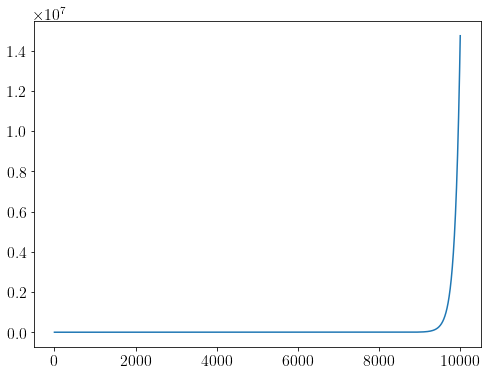

In [79]:
l_arr = np.arange(2,10000)
DeltaT = 47.*arcmin_to_radians
ThetaFWHM = 5.*arcmin_to_radians
Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))*(M.T_cmb()*1e6)**-2.
plt.plot(l_arr,l_arr*(l_arr+1.)*Nl/2./np.pi,label='Nl planck')



In [80]:
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',
          np.c_[l_arr,1e0*DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))])

In [81]:
M = Class()
M.set(ksz_params)
M.set({'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
#        'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 15000.0,
'ell_min' : 100.0,
'f_sky':0.7, # 0.3 for advACT, 0.4 for SO and S4, 0.7 for planck
'gas profile' : 'B16',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 0,
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn_planck = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 86.0071 seconds


/var/folders/_q/j04c9lw93j75_c_z2jdfbtwm0000gn/T/ipykernel_2919/3734622920.py:38: RuntimeWarning: invalid value encountered in sqrt
  fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat']))/2.,
/var/folders/_q/j04c9lw93j75_c_z2jdfbtwm0000gn/T/ipykernel_2919/3734622920.py:39: RuntimeWarning: invalid value encountered in sqrt
  fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat']))/2.,


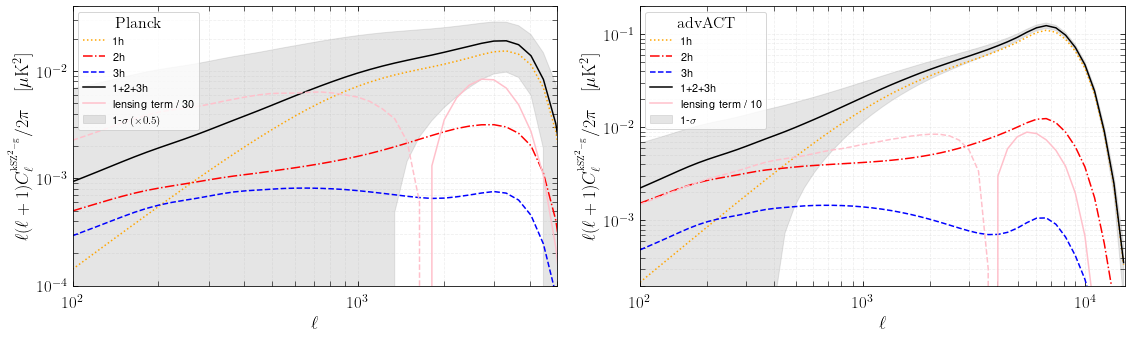

In [97]:

label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,5))





ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')






cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_planck.copy()

fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = '1h',c='orange',ls=':',marker = 'None')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = '2h',c='r',ls='-.',marker = 'None')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = '3h',c='b',ls='--',marker = 'None')

ax.plot(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         label = '1+2+3h',
             c='k',ls='-',marker = 'None')
ax.fill_between(cl_kSZ_kSZ_g['ell'],
                fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat']))/2.,
                fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat']))/2.,
                color='grey',alpha=0.2,label=r'1-$\sigma \,(\times 0.5)$')

# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'cl (hf)',c='orange',ls='--',marker = 'o')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/30.,label = 'lensing term / 30',c='pink',ls='-',marker = 'None')
ax.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/30.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')




# l_arr = np.asarray(cl_kSZ_kSZ_g['ell'])#np.geomspace(1e2,1e4,100)
# arcmin_to_radians = np.pi/(60.*180.)
# DeltaT = 10.*arcmin_to_radians
# ThetaFWHM = 1.4*arcmin_to_radians
# Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))
# plt.loglog(l_arr,Nl)


ax.loglog()
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(fontsize=11,loc=2,title=r'$\mathrm{Planck}$')
ax.set_ylim(1e-4,4e-2)
ax.set_xlim(100,5e3)
# ax.set_title('Planck')


ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')






cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_advact.copy()

fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = '1h',c='orange',ls=':',marker = 'None')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = '2h',c='r',ls='-.',marker = 'None')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = '3h',c='b',ls='--',marker = 'None')

ax.plot(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         label = '1+2+3h',
             c='k',ls='-',marker = 'None')
ax.fill_between(cl_kSZ_kSZ_g['ell'],
                fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
                fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
                color='grey',alpha=0.2,label=r'1-$\sigma$')

# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'cl (hf)',c='orange',ls='--',marker = 'o')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'None')
ax.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')




# l_arr = np.asarray(cl_kSZ_kSZ_g['ell'])#np.geomspace(1e2,1e4,100)
# arcmin_to_radians = np.pi/(60.*180.)
# DeltaT = 10.*arcmin_to_radians
# ThetaFWHM = 1.4*arcmin_to_radians
# Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))
# plt.loglog(l_arr,Nl)


ax.loglog()
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
ax.legend(fontsize=11,title=r'$\mathrm{advACT}$')
ax.set_ylim(2e-4,2e-1)
ax.set_xlim(1e2,1.5e4)
# ax.set_title('advACT')

fig.tight_layout()
plt.savefig('cl_comparison_lens_cov.pdf')

In [84]:
# signal-to-noise calculation:

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_advact.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])
snrl = cl_tot/np.sqrt(covll)
                   
np.sum(snrl)

244.3666199685344

In [92]:
# signal-to-noise calculation:

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])
ells  = np.asarray(cl_kSZ_kSZ_g['ell'])
snrl = cl_tot[ells<5000]/np.sqrt(covll[ells<5000])
                   
np.sum(snrl)

15.901995678293593

# kSZ gal configurations

In [12]:
# fiducial model:
M = Class()
M.set(ksz_params)
M.set({'output':'kSZ_kSZ_gal fft (1h), kSZ_kSZ_gal_1h',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 15000.0,
'ell_min' : 100.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'agn',
'bispec_conf_id' : 2
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 196.6891 seconds


In [13]:
# fiducial model:
M = Class()
M.set(ksz_params)
M.set({'output':'kSZ_kSZ_gal_1h',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 15000.0,
'ell_min' : 100.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'agn',
'bispec_conf_id' : 3
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn_anti_squeezed = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 347.6708 seconds


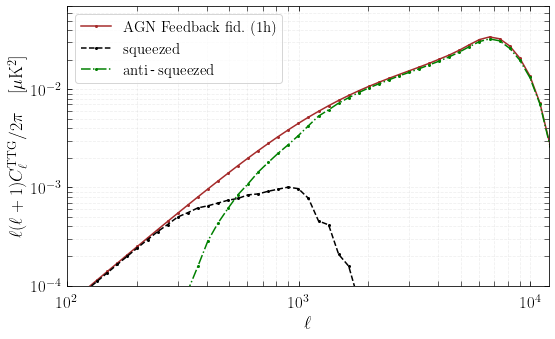

In [24]:
# matplotlib.rcParams['axes.unicode_minus'] = False

label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, ax2 = plt.subplots(1,1,figsize=(8,5))







ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')




cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         #label = 'SHOCK',
         label = r'$\mathrm{AGN}\,\,\mathrm{Feedback}\,\,\mathrm{fid.}\,\,\mathrm{(1h)}$',
         c='brown',ls='-',marker = 'o',markersize=2)

fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h (slow)'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         #label = 'SHOCK',
         label = r'$\mathrm{squeezed}$',
         c='black',ls='--',marker = 'o',markersize=2)



cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_anti_squeezed.copy()
# fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
# ax.plot(cl_kSZ_kSZ_g['ell'],
#          fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
#          #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#          #label = 'SHOCK',
#          label = r'$\mathrm{anti}-\mathrm{squeezed}$',
#          c='green',ls='-',marker = 'o',markersize=2)

fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h (slow)'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         #label = 'SHOCK',
         #label = r'$\mathrm{AGN}\,\,\mathrm{Feedback}\,\,\mathrm{fid.}$',
        label = r'$\mathrm{anti}$\,-\,$\mathrm{squeezed}$',
         c='green',ls='-.',marker = 'o',markersize=2)









ax.set_yscale('log')
ax.set_xscale('log')
# ax.xlabel(r"$\ell$")
# plt.ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$")
ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{TTG}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)
# plt.grid(which='both',alpha=0.3)
plt.ylim(1e-4,7e-2)
plt.xlim(1e2,1.2e4)

plt.legend(loc=2,fontsize=15)

fig.tight_layout()
plt.savefig('ksz_vary_conf.pdf')

# hod m_min

In [210]:
sigma_log10M_HOD_fid =  0.76
alpha_s_HOD_fid =  2.08
M_min_HOD_fid = 10100000000000.0
M1_prime_HOD_fid =  118000000000000.0

dqq = 0.4
dqq_alphas = 0.5

In [211]:
# fiducial model:

M = Class()
M.set(ksz_params)
M.set({'output':'gal_gal_1h,gal_gal_2h',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 9000.0,
'ell_min' : 100.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'agn',
'sigma_log10M_HOD' : sigma_log10M_HOD_fid,#+dqq*sigma_log10M_HOD_fid,
'alpha_s_HOD' : alpha_s_HOD_fid,
'M_min_HOD' : M_min_HOD_fid,#+dqq*M_min_HOD_fid,
'M1_prime_HOD' : M1_prime_HOD_fid,
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_gg = M.cl_gg()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()


M = Class()
M.set(ksz_params)
M.set({'output':'gal_gal_1h,gal_gal_2h',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 9000.0,
'ell_min' : 100.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'agn',
'sigma_log10M_HOD' : sigma_log10M_HOD_fid,#+dqq*sigma_log10M_HOD_fid,
'alpha_s_HOD' : alpha_s_HOD_fid,
'M_min_HOD' : M_min_HOD_fid+dqq*M_min_HOD_fid,
'M1_prime_HOD' : M1_prime_HOD_fid,
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_gg_dq = M.cl_gg()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 5.5535 seconds
computed in 5.7880 seconds


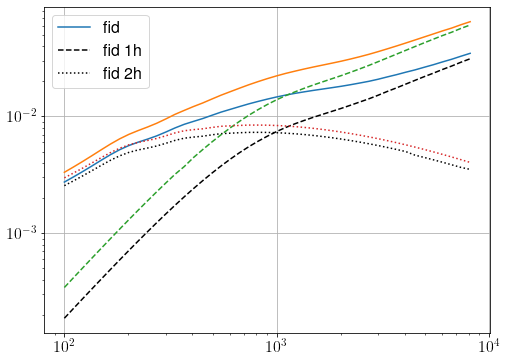

In [216]:
plt.plot(cl_gg['ell'],np.asarray(cl_gg['1h'])+np.asarray(cl_gg['2h']),label='fid')
plt.plot(cl_gg['ell'],np.asarray(cl_gg['1h']),label='fid 1h',ls='--',c='k')
plt.plot(cl_gg['ell'],np.asarray(cl_gg['2h']),label='fid 2h',ls=':',c='k')
plt.plot(cl_gg_dq['ell'],np.asarray(cl_gg_dq['1h'])+np.asarray(cl_gg_dq['2h']),ls='-')
plt.plot(cl_gg_dq['ell'],np.asarray(cl_gg_dq['1h']),ls='--')
plt.plot(cl_gg_dq['ell'],np.asarray(cl_gg_dq['2h']),ls=':')
plt.loglog()
plt.legend()
plt.grid()

m_min hod, controls the galaxy density. Comparing two different m_min hod is tricky because it's a comparison of samples with different density.... this changes the normalization and the covariance.

# varying max mass

In [5]:
# fiducial model:
M = Class()
M.set(ksz_params)
M.set({'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 15000.0,
'ell_min' : 100.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'agn',
'M_max for ng_bar': 1e+17
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 77.1614 seconds


In [6]:
M = Class()
M.set(ksz_params)
M.set({'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',#',kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
       #'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 10000.0,
'ell_min' : 100.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'agn',
'M_max': 3e13,
'M_max for ng_bar': 1e+17
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn_3e13 = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 34.9330 seconds


In [7]:
M = Class()
M.set(ksz_params)
M.set({'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',#',kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
       #'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 10000.0,
'ell_min' : 100.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'agn',
'M_max': 7e13,
'M_max for ng_bar': 1e+17
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn_7e13 = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 29.9650 seconds


In [8]:
M = Class()
M.set(ksz_params)
M.set({'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',#',kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
       #'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 10000.0,
'ell_min' : 100.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'agn',
'M_max': 3e14,
'M_max for ng_bar': 1e+17
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn_3e14 = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 33.7243 seconds


In [9]:
M = Class()
M.set(ksz_params)
M.set({'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',#',kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
       #'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 10000.0,
'ell_min' : 100.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'agn',
'M_max': 7e14,
'M_max for ng_bar': 1e+17
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn_7e14 = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 35.6139 seconds


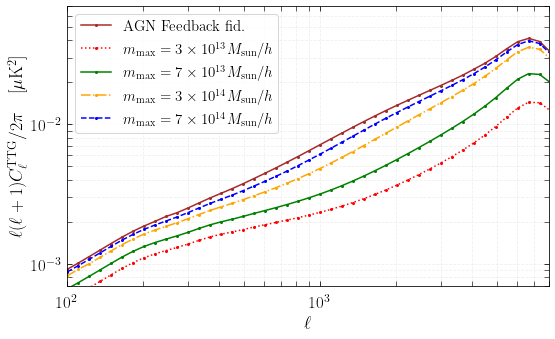

In [10]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, ax2 = plt.subplots(1,1,figsize=(8,5))






ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')




cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         #label = 'SHOCK',
         label = r'$\mathrm{AGN}\,\,\mathrm{Feedback}\,\,\mathrm{fid.}$',
         c='brown',ls='-',marker = 'o',markersize=2)



cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_3e13.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         #label = 'AGN',
#          label = r'$\Delta \sigma_{\log_{10}M}/\sigma_{\log_{10}M} = 0.2$',
        label=r'$m_\mathrm{max}=3\times 10^{13} M_\mathrm{sun}/h$',
             c='red',ls=':',marker = 'o',markersize=2)

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_7e13.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         #label = 'AGN',
#          label = r'$\Delta \sigma_{\log_{10}M}/\sigma_{\log_{10}M} = 0.2$',
        label=r'$m_\mathrm{max}=7\times 10^{13} M_\mathrm{sun}/h$',
             c='green',ls='-',marker = 'o',markersize=2)




cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_3e14.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         #label = 'AGN',
#          label = r'$\Delta \sigma_{\log_{10}M}/\sigma_{\log_{10}M} = 0.2$',
        label=r'$m_\mathrm{max}=3\times 10^{14} M_\mathrm{sun}/h$',
             c='orange',ls='-.',marker = 'o',markersize=2)


cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_7e14.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         #label = 'AGN',
        label=r'$m_\mathrm{max}=7\times 10^{14} M_\mathrm{sun}/h$',
#          label = r'$\Delta \sigma_{\log_{10}M}/\sigma_{\log_{10}M} = 0.2$',
             c='blue',ls='--',marker = 'o',markersize=2)






ax.set_yscale('log')
ax.set_xscale('log')
# ax.xlabel(r"$\ell$")
# plt.ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$")
ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{TTG}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)
# plt.grid(which='both',alpha=0.3)
plt.ylim(7e-4,7e-2)
plt.xlim(1e2,8e3)

plt.legend(loc=2,fontsize=15)

fig.tight_layout()
plt.savefig('ksz_vary_m_max.pdf')

In [137]:
'%.8e'%10100000000000.0

'1.01000000e+13'

# ksz2g three different profiles

In [87]:
M = Class()
M.set(ksz_params)
M.set({'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.,
'dell': 300.,
'ell_max' : 15000.0,
'ell_min' : 100.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'agn',
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 77.2240 seconds


In [88]:
M = Class()
M.set(ksz_params)
M.set({'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.,
'dell': 300.,
'ell_max' : 15000.0,
'ell_min' : 100.0,
'f_sky':0.3, # 0.3 for ACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'shock',
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_shock = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()



M = Class()
M.set(ksz_params)
M.set({'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.,
'dell': 300.,
'ell_max' : 15000.0,
'ell_min' : 100.0,
'f_sky':0.3, # 0.3 for ACT, 0.4 for SO and S4
'gas profile' : 'nfw',
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_nfw = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 71.4636 seconds
computed in 69.7602 seconds


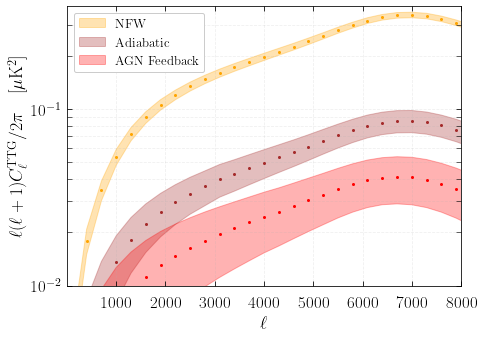

In [92]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_nfw.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
plt.errorbar(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         label = 'NFW',
             c='orange',ls='None',marker = 'o',markersize=2)

plt.fill_between(cl_kSZ_kSZ_g['ell'],
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               color='orange',
                 label = r'$\mathrm{NFW}$',
               alpha=0.3)

# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = 'cl (1h)',c='k',ls='-',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = 'cl (2h)',c='r',ls='-.',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = 'cl (3h)',c='b',ls='--',marker = 'o')

# # plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'cl (hf)',c='orange',ls='--',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')



cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_shock.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
plt.plot(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         #label = 'SHOCK',
             c='brown',ls='None',marker = 'o',markersize=2)

plt.fill_between(cl_kSZ_kSZ_g['ell'],
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               color='brown',
                 label = r'$\mathrm{Adiabatic}$',
               alpha=0.3)



cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
plt.errorbar(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         #label = 'AGN',
             c='red',ls='None',marker = 'o',markersize=2)

plt.fill_between(cl_kSZ_kSZ_g['ell'],
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               color='red',
                 label = r'$\mathrm{AGN}\,\,\mathrm{Feedback}$',
               alpha=0.3)





plt.yscale('log')
plt.xscale('linear')
plt.xlabel(r"$\ell$")
# plt.ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$")
ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{TTG}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)
# plt.grid(which='both',alpha=0.3)
plt.ylim(1e-2,0.38)
plt.xlim(2.,8e3)
# plt.legend(loc=2)
# ax.axvspan(8e3, 18e3, alpha=0.1, color='grey',hatch="//")
# ax.axvspan(8e3, 18e3, alpha=0.1, color='None',edgecolor='grey',hatch="//")
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2]
# plt.text(0.63,0.65,s='Noise dominated',rotation=90, transform=ax.transAxes,fontsize=14,c='k',alpha=0.7)
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc=2,framealpha=1,fontsize=13)
# plt.title('nfw')
fig.tight_layout()
# plt.savefig('/Users/boris/Desktop/ksz_sum_8e3.pdf')
plt.savefig('ksz_vary_prof.pdf')

# varying HOD params

In [180]:
sigma_log10M_HOD_fid =  0.76
alpha_s_HOD_fid =  2.08
M_min_HOD_fid = 10100000000000.0
M1_prime_HOD_fid =  118000000000000.0

dqq = 0.2
dqq_alphas = 0.5

In [95]:
M = Class()
M.set(ksz_params)
M.set({'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.,
'dell': 300.,
'ell_max' : 15000.0,
'ell_min' : 100.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'agn',
# varying HODS
'sigma_log10M_HOD' : sigma_log10M_HOD_fid+dqq*sigma_log10M_HOD_fid,
'alpha_s_HOD' : alpha_s_HOD_fid,
'M_min_HOD' : M_min_HOD_fid,
'M1_prime_HOD' : M1_prime_HOD_fid,
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn_sigma_log10M_HOD = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 72.4541 seconds


In [96]:
M = Class()
M.set(ksz_params)
M.set({'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.,
'dell': 300.,
'ell_max' : 15000.0,
'ell_min' : 100.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'agn',
# varying HODS
'sigma_log10M_HOD' : sigma_log10M_HOD_fid,#+dqq*sigma_log10M_HOD_fid,
'alpha_s_HOD' : alpha_s_HOD_fid+dqq_alphas*alpha_s_HOD_fid,
'M_min_HOD' : M_min_HOD_fid,
'M1_prime_HOD' : M1_prime_HOD_fid,
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn_alphas = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 80.3701 seconds


In [97]:
M = Class()
M.set(ksz_params)
M.set({'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.,
'dell': 300.,
'ell_max' : 15000.0,
'ell_min' : 100.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'agn',
# varying HODS
'sigma_log10M_HOD' : sigma_log10M_HOD_fid,#+dqq*sigma_log10M_HOD_fid,
'alpha_s_HOD' : alpha_s_HOD_fid,
'M_min_HOD' : M_min_HOD_fid+dqq*M_min_HOD_fid,
'M1_prime_HOD' : M1_prime_HOD_fid,
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn_mmin = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 75.2246 seconds


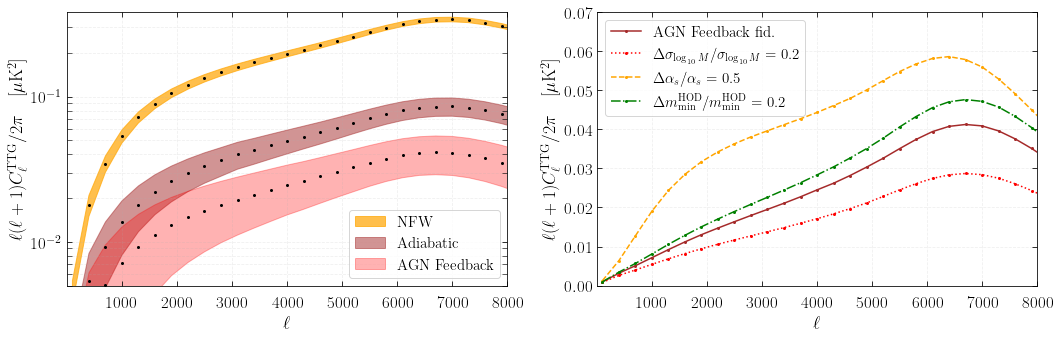

In [133]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))



# label_size = 17
# title_size = 18
# legend_size = 13
# handle_length = 1.5
# fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_nfw.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.errorbar(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         #label = 'NFW',
             c='k',ls='None',marker = 'o',markersize=2)

ax.fill_between(cl_kSZ_kSZ_g['ell'],
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               color='orange',
                 label = r'$\mathrm{NFW}$',
               alpha=0.7)

# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = 'cl (1h)',c='k',ls='-',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = 'cl (2h)',c='r',ls='-.',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = 'cl (3h)',c='b',ls='--',marker = 'o')

# # plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'cl (hf)',c='orange',ls='--',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')



cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_shock.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         #label = 'SHOCK',
             c='k',ls='None',marker = 'o',markersize=2)

ax.fill_between(cl_kSZ_kSZ_g['ell'],
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               color='brown',
                 label = r'$\mathrm{Adiabatic}$',
               alpha=0.5)



cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.errorbar(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         #label = 'AGN',
             c='k',ls='None',marker = 'o',markersize=2)

ax.fill_between(cl_kSZ_kSZ_g['ell'],
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               color='red',
                 label = r'$\mathrm{AGN}\,\,\mathrm{Feedback}$',
               alpha=0.3)





ax.set_yscale('log')
ax.set_xscale('linear')
# ax.xlabel(r"$\ell$")
# plt.ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$")
ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{TTG}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)
# plt.grid(which='both',alpha=0.3)
ax.set_ylim(5e-3,0.38)
ax.set_xlim(2.,8e3)
# plt.legend(loc=2)
# ax.axvspan(8e3, 18e3, alpha=0.1, color='grey',hatch="//")
# ax.axvspan(8e3, 18e3, alpha=0.1, color='None',edgecolor='grey',hatch="//")

# handles, labels = plt.gca().get_legend_handles_labels()
# order = [0,1,2]
# plt.text(0.63,0.65,s='Noise dominated',rotation=90, transform=ax.transAxes,fontsize=14,c='k',alpha=0.7)
# ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc=2,framealpha=1,fontsize=13)
ax.legend(loc=4,fontsize=15)
# plt.title('nfw')
fig.tight_layout()



ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_nfw.copy()
# fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
# plt.errorbar(cl_kSZ_kSZ_g['ell'],
#          fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
#          #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#          label = 'NFW',
#              c='orange',ls='None',marker = 'o',markersize=2)

# plt.fill_between(cl_kSZ_kSZ_g['ell'],
#                fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#                fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#                color='orange',
#                  label = 'NFW',
#                alpha=0.3)

# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = 'cl (1h)',c='k',ls='-',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = 'cl (2h)',c='r',ls='-.',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = 'cl (3h)',c='b',ls='--',marker = 'o')

# # plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'cl (hf)',c='orange',ls='--',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')



cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         #label = 'SHOCK',
         label = r'$\mathrm{AGN}\,\,\mathrm{Feedback}\,\,\mathrm{fid.}$',
         c='brown',ls='-',marker = 'o',markersize=2)

# plt.fill_between(cl_kSZ_kSZ_g['ell'],
#                fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#                fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#                color='brown',
#                  label = r'$\mathrm{AGN}\,\,\mathrm{Feedback}\,\,\mathrm{fid.}$',
#                alpha=0.3)



cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_sigma_log10M_HOD.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         #label = 'AGN',
         label = r'$\Delta \sigma_{\log_{10}M}/\sigma_{\log_{10}M} = 0.2$',
             c='red',ls=':',marker = 'o',markersize=2)

# plt.fill_between(cl_kSZ_kSZ_g['ell'],
#                fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#                fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#                color='red',
#                  label = r'$\Delta \sigma_{\log_{10}M}/\sigma_{\log_{10}M} = 0.2$',
#                alpha=0.3)


cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_alphas.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         #label = 'AGN',
             label = r'$\Delta \alpha_s/\alpha_s = 0.5$',
             c='orange',ls='--',marker = 'o',markersize=2)

# plt.fill_between(cl_kSZ_kSZ_g['ell'],
#                fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#                fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#                color='orange',
#                  label = r'$\Delta \alpha_s/\alpha_s = 0.5$',
#                alpha=0.3)


cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_mmin.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         #label = 'AGN',
             label = r'$\Delta m_\mathrm{min}^\mathrm{HOD}/m_\mathrm{min}^\mathrm{HOD} = 0.2$',
             c='green',ls='-.',marker = 'o',markersize=2)

# plt.fill_between(cl_kSZ_kSZ_g['ell'],
#                fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#                fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#                color='green',
#                  label = r'$\Delta m_\mathrm{min}^\mathrm{HOD}/m_\mathrm{min}^\mathrm{HOD} = 0.2$',
#                alpha=0.3)





ax.set_yscale('linear')
ax.set_xscale('linear')
# ax.xlabel(r"$\ell$")
# plt.ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$")
ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{TTG}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)
# plt.grid(which='both',alpha=0.3)
plt.ylim(0.,0.07)
plt.xlim(2.,8e3)
plt.legend(loc=2,fontsize=15)
# ax.axvspan(8e3, 18e3, alpha=0.1, color='grey',hatch="//")
# ax.axvspan(8e3, 18e3, alpha=0.1, color='None',edgecolor='grey',hatch="//")
# handles, labels = plt.gca().get_legend_handles_labels()
# order = [0,1,2,3]
# plt.text(0.63,0.65,s='Noise dominated',rotation=90, transform=ax.transAxes,fontsize=14,c='k',alpha=0.7)
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc=2,framealpha=1,fontsize=13)
# plt.title('nfw')
fig.tight_layout()
plt.savefig('ksz_vary_prof_HOD.pdf')

# Planck/advACT filter and cl TTG comparison

In [68]:
ksz_params = {
#fiducial ksz params
'omega_b' : 0.022383,
'omega_cdm' : 0.12011,
'h' : 0.6732,
'tau_reio' : 0.0543,
'ln10^{10}A_s' : 3.0448,
'n_s' : 0.96605,
'k_pivot' : 0.05,
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'f_free' : 1.0,
'pressure profile' : 'B12',
'k_min_for_pk_class_sz' : 0.001,
'k_max_for_pk_class_sz' : 60.0,
'k_per_decade_class_sz' : 50,
'P_k_max_h/Mpc' : 100.0,
'non linear' : 'halofit',
'z_min' : 0.01,
'M_min' : 1e10,
'm_min_counter_terms' : 1e10,
'M_max' : 1e+17,
'mass function' : 'T10',
'galaxy_sample' : 'unwise',
'galaxy_sample_id' : 'green',
'concentration parameter' : 'D08',
'use_hod' : 'yes',
'use_analytical_truncated_nfw' : 'yes',
'x_out_truncated_nfw_profile_satellite_galaxies' : 1,
'M0 equal M_min (HOD)' : 'no',
'gas profile' : 'nfw',
'gas profile mode' : 'agn',
'sigma_log10M_HOD' : 0.76,
'alpha_s_HOD' : 2.08,
'M_min_HOD' : 10100000000000.0,
'M1_prime_HOD' : 118000000000000.0,
'M0_HOD' : 0.0,
'x_out_truncated_nfw_profile' : 1.0,
'pk_nonlinear_for_vrms2' : 1,
'hm_consistency' : 1,
'sz_verbose' : 0, # for full output when not using python wrapper set to >100, this doesnt work with python wrapper
#'root' : 'sz_auxiliary_files/run_scripts/tmp/class-sz_tmp_',
#'write sz results to files' : 'yes',
'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.001,
'redshift_epsabs' : 1e-50,
'redshift_epsrel' : 0.001,
'mass_epsabs' : 1e-30,
'mass_epsrel' : 0.01,
'dell' : 300,
'ell_max' : 5000.0,
'ell_min' : 100.0,

'non linear' : 'halofit',
'nonlinear_verbose' : 0,
'ndim_masses' : 80,
'ndim_redshifts' : 80,
#'l_max_scalars' : 5000,
'output' : 'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_hf',
# 'output' : 'kSZ_kSZ_gal_1h,kSZ_kSZ_gal_2h,kSZ_kSZ_gal_3h',
'z_max' : 4.0,
#'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',

'n_ell_density_profile' : 50,
'n_m_density_profile' : 50,
'n_z_density_profile' : 50,
'k_per_decade_for_pk' : 50,
'z_max_pk' : 4.0,
    

# slow:
# 'n_z_psi_b1g' : 100,
# 'n_l_psi_b1g' : 400,

# 'n_z_psi_b2g' : 100,
# 'n_l_psi_b2g' : 400,

# 'n_z_psi_b2t' : 100,
# 'n_l_psi_b2t' : 400,

# 'n_z_psi_b1t' : 100,
# 'n_l_psi_b1t' : 100,

# 'n_z_psi_b1gt' : 100,
# 'n_l_psi_b1gt' : 100,
    
    
# fast:
'n_z_psi_b1g' : 50,
'n_l_psi_b1g' : 50,

'n_z_psi_b2g' : 50,
'n_l_psi_b2g' : 50,

'n_z_psi_b2t' : 50,
'n_l_psi_b2t' : 50,

'n_z_psi_b1t' : 50,
'n_l_psi_b1t' : 50,

'n_z_psi_b1gt' : 50,
'n_l_psi_b1gt' : 50,

'N_samp_fftw' : 800, # fast: 800 ;  slow: 2000
'l_min_samp_fftw' : 1e-9,
'l_max_samp_fftw' : 1e9,
    
'N_kSZ2_gal_multipole_grid' :  70,
'N_kSZ2_gal_theta_grid' :  70,
'ell_min_kSZ2_gal_multipole_grid' : 2.,
'ell_max_kSZ2_gal_multipole_grid' : 2e5,
}

In [23]:
M = Class()
M.set(ksz_params)
# M.set({
    
#     'output':'kSZ_kSZ_gal fft (1h)',#',kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
#        'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
#        #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
#        'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
# #         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

       
M.set({'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',


'dlogell' : 0.,
'dell': 300.,
'ell_max' : 15000.0,
'ell_min' : 100.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'B16',
# 'gas profile mode' : '',
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 82.8648 seconds


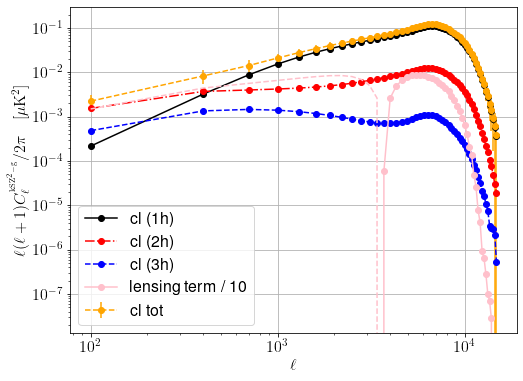

In [24]:

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn.copy()

fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = 'cl (1h)',c='k',ls='-',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = 'cl (2h)',c='r',ls='-.',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = 'cl (3h)',c='b',ls='--',marker = 'o')

# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'cl (hf)',c='orange',ls='--',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')




# l_arr = np.asarray(cl_kSZ_kSZ_g['ell'])#np.geomspace(1e2,1e4,100)
# arcmin_to_radians = np.pi/(60.*180.)
# DeltaT = 10.*arcmin_to_radians
# ThetaFWHM = 1.4*arcmin_to_radians
# Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))
# plt.loglog(l_arr,Nl)

plt.errorbar(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         label = 'cl tot',
             c='orange',ls='--',marker = 'o')
plt.loglog()
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$")
plt.grid()
plt.legend()

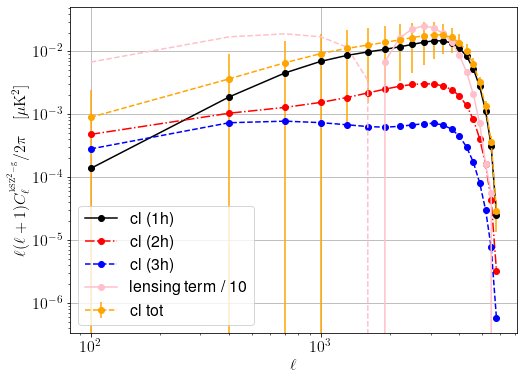

In [68]:

fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = 'cl (1h)',c='k',ls='-',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = 'cl (2h)',c='r',ls='-.',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = 'cl (3h)',c='b',ls='--',marker = 'o')

# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'cl (hf)',c='orange',ls='--',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')




# l_arr = np.asarray(cl_kSZ_kSZ_g['ell'])#np.geomspace(1e2,1e4,100)
# arcmin_to_radians = np.pi/(60.*180.)
# DeltaT = 10.*arcmin_to_radians
# ThetaFWHM = 1.4*arcmin_to_radians
# Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))
# plt.loglog(l_arr,Nl)

plt.errorbar(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         label = 'cl tot',
             c='orange',ls='--',marker = 'o')
plt.loglog()
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$")
plt.grid()
plt.legend()

# here start for the figure:

In [135]:
M = Class()
M.set(p18_cosmo)
M.set(ksz_params)
M.set({'output':'mean_galaxy_bias,kSZ_kSZ_gal_hf,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',#,kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 15000.0,
'ell_min' : 2.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'nfw',
'gas profile mode' : 'agn',
'normalize_gas_density_profile' : 1
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_nfw_advact = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
# M.struct_cleanup()
# M.empty()

computed in 280.0627 seconds


In [136]:
M = Class()
M.set(p18_cosmo)
M.set(ksz_params)
M.set({'output':'mean_galaxy_bias,kSZ_kSZ_gal_hf,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',#,kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 15000.0,
'ell_min' : 2.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'agn',
'normalize_gas_density_profile' : 1
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn_advact = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
# M.struct_cleanup()
# M.empty()

computed in 278.1324 seconds


In [137]:
M = Class()
M.set(p18_cosmo)
M.set(ksz_params)
M.set({'output':'mean_galaxy_bias,kSZ_kSZ_gal_hf,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',#,kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 15000.0,
'ell_min' : 2.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'shock',
'normalize_gas_density_profile' : 1
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_shock_advact = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
# M.struct_cleanup()
# M.empty()

computed in 266.5835 seconds


In [138]:
M = Class()
M.set(p18_cosmo)
M.set(ksz_params)
M.set({'output':'mean_galaxy_bias,kSZ_kSZ_gal_hf,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',#',kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
#        'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
#        'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 6000.0,
'ell_min' : 2.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'nfw',
'gas profile mode' : 'agn',
'normalize_gas_density_profile' : 1
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_nfw_planck = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
# M.struct_cleanup()
# M.empty()

computed in 229.8307 seconds


In [140]:
M = Class()
M.set(p18_cosmo)
M.set(ksz_params)
M.set({'output':'mean_galaxy_bias,kSZ_kSZ_gal_hf,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',#',kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
#        'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
#        'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 6000.0,
'ell_min' : 2.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'agn',
'normalize_gas_density_profile' : 1
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn_planck = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
# M.struct_cleanup()
# M.empty()

computed in 270.4162 seconds


In [139]:
M = Class()
M.set(p18_cosmo)
M.set(ksz_params)
M.set({'output':'mean_galaxy_bias,kSZ_kSZ_gal_hf,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',#',kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
#        'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
#        'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 6000.0,
'ell_min' : 2.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'shock',
'normalize_gas_density_profile' : 1
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_shock_planck = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
# M.struct_cleanup()
# M.empty()

computed in 244.1427 seconds


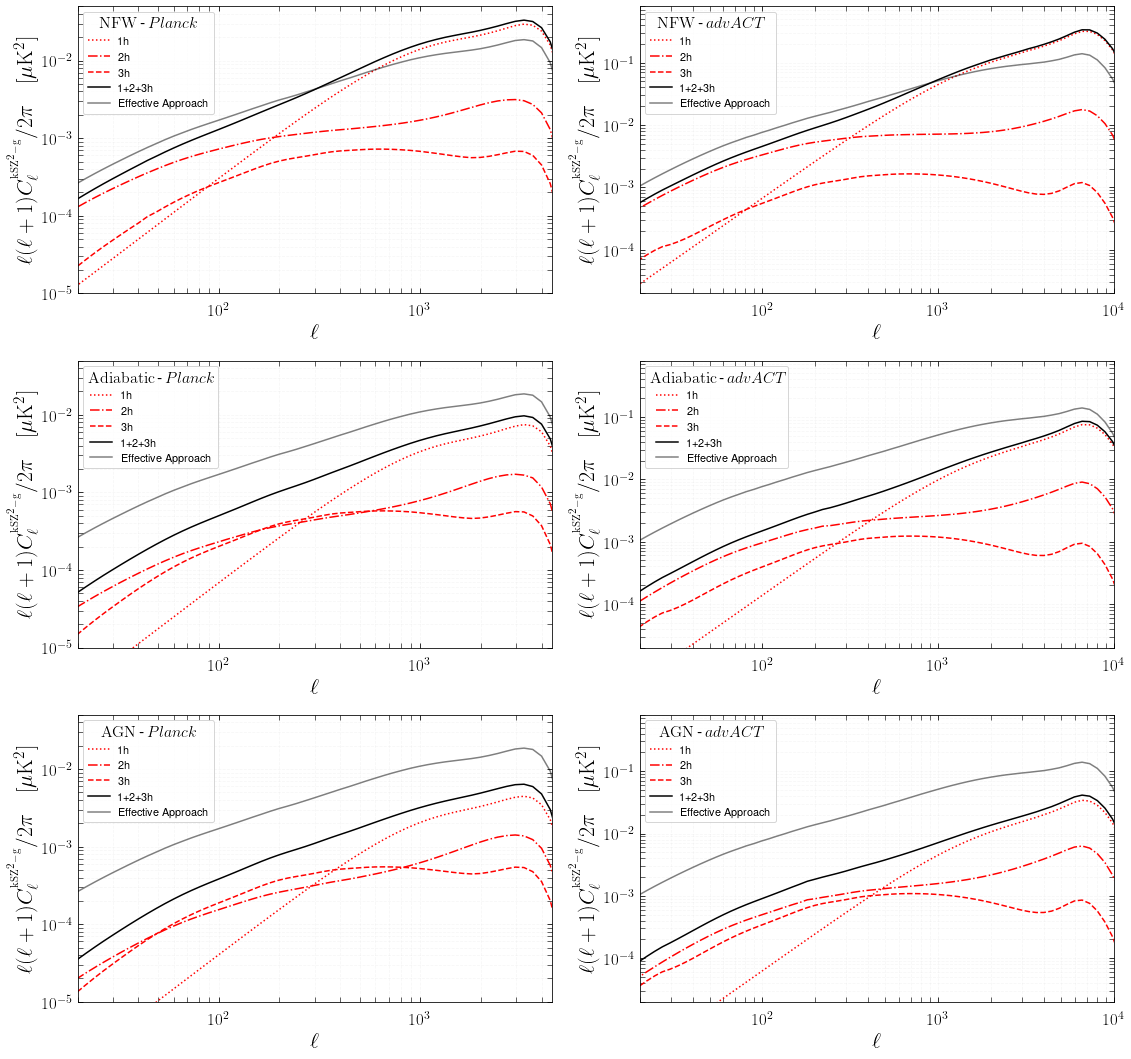

In [147]:
l_advact, F_advact = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',unpack=True)
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',unpack=True)


#'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',

label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, ((ax2,ax3),(ax4,ax5),(ax6,ax7)) = plt.subplots(3,2,figsize=(16,15))
# ax = ax1
# ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
# ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
# ax.xaxis.set_ticks_position('both')
# ax.yaxis.set_ticks_position('both')
# plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
# plt.setp(ax.get_xticklabels(), fontsize=label_size)
# ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

# ax.plot(l_advact,F_advact/np.max(F_advact),label='advACT',c='k',ls='--')
# ax.plot(l_planck,F_planck/np.max(F_planck),label='planck',c='r')
# ax.legend(loc=1)

# ax.set_ylabel(r'$F(\ell)=f(\ell)\times b(\ell)$',size=title_size)
# ax.set_xlabel(r'$\ell$',size=title_size)



ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')
cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_nfw_planck.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = '1h',c='r',ls=':')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = '2h',c='r',ls='-.')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = '3h',c='r',ls='--')

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = '1+2+3h',c='k',ls='-')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'Effective Approach',c='k',ls='-',alpha=0.5)
# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')



# plt.errorbar(cl_kSZ_kSZ_g['ell'],
#          fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
#          yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#          label = 'cl tot',
#              c='orange',ls='--',marker = 'o')
ax.set_xlim(20.,4.5e3)
ax.set_ylim(1e-5,5e-2)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
ax.legend(fontsize=11,loc=2,title=r'$\mathrm{NFW}\,$-$\,Planck$')



ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')
cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_nfw_advact.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = '1h',c='r',ls=':')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = '2h',c='r',ls='-.')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = '3h',c='r',ls='--')

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = '1+2+3h',c='k',ls='-')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'Effective Approach',c='k',ls='-',alpha=0.5)
# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')



# plt.errorbar(cl_kSZ_kSZ_g['ell'],
#          fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
#          yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#          label = 'cl tot',
#              c='orange',ls='--',marker = 'o')
ax.set_xlim(20.,10e3)
ax.set_ylim(2e-5,8e-1)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
ax.legend(loc=2,fontsize=11,title=r'$\mathrm{NFW}\,$-$\,advACT$')


ax = ax4
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')
cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_shock_planck.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = '1h',c='r',ls=':')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = '2h',c='r',ls='-.')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = '3h',c='r',ls='--')

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = '1+2+3h',c='k',ls='-')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'Effective Approach',c='k',ls='-',alpha=0.5)
# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')



# plt.errorbar(cl_kSZ_kSZ_g['ell'],
#          fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
#          yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#          label = 'cl tot',
#              c='orange',ls='--',marker = 'o')
ax.set_xlim(20.,4.5e3)
ax.set_ylim(1e-5,5e-2)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
ax.legend(fontsize=11,loc=2,title=r'$\mathrm{Adiabatic}\,$-$\,Planck$')



ax = ax5
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')
cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_shock_advact.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = '1h',c='r',ls=':')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = '2h',c='r',ls='-.')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = '3h',c='r',ls='--')

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = '1+2+3h',c='k',ls='-')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'Effective Approach',c='k',ls='-',alpha=0.5)
# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')



# plt.errorbar(cl_kSZ_kSZ_g['ell'],
#          fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
#          yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#          label = 'cl tot',
#              c='orange',ls='--',marker = 'o')
ax.set_xlim(20.,10e3)
ax.set_ylim(2e-5,8e-1)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
ax.legend(loc=2,fontsize=11,title=r'$\mathrm{Adiabatic}\,$-$\,advACT$')


ax = ax6
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')
cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_planck.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = '1h',c='r',ls=':')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = '2h',c='r',ls='-.')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = '3h',c='r',ls='--')

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = '1+2+3h',c='k',ls='-')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'Effective Approach',c='k',ls='-',alpha=0.5)
# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')



# plt.errorbar(cl_kSZ_kSZ_g['ell'],
#          fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
#          yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#          label = 'cl tot',
#              c='orange',ls='--',marker = 'o')
ax.set_xlim(20.,4.5e3)
ax.set_ylim(1e-5,5e-2)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
ax.legend(fontsize=11,loc=2,title=r'$\mathrm{AGN}\,$-$\,Planck$')



ax = ax7
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')
cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_advact.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = '1h',c='r',ls=':')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = '2h',c='r',ls='-.')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = '3h',c='r',ls='--')

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = '1+2+3h',c='k',ls='-')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'Effective Approach',c='k',ls='-',alpha=0.5)
# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')



# plt.errorbar(cl_kSZ_kSZ_g['ell'],
#          fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
#          yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#          label = 'cl tot',
#              c='orange',ls='--',marker = 'o')
ax.set_xlim(20.,10e3)
ax.set_ylim(2e-5,8e-1)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
ax.legend(loc=2,fontsize=11,title=r'$\mathrm{AGN}\,$-$\,advACT$')






fig.tight_layout()
plt.savefig('cls_ttg.pdf')
# plt.title('agn')

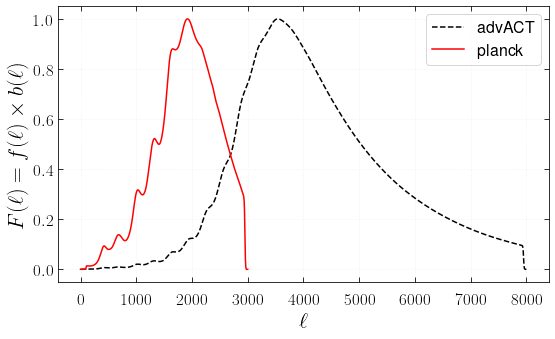

In [128]:
l_advact, F_advact = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',unpack=True)
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',unpack=True)


#'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',

label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(8,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.plot(l_advact,F_advact/np.max(F_advact),label='advACT',c='k',ls='--')
ax.plot(l_planck,F_planck/np.max(F_planck),label='planck',c='r')
ax.legend(loc=1)

ax.set_ylabel(r'$F(\ell)=f(\ell)\times b(\ell)$',size=title_size)
ax.set_xlabel(r'$\ell$',size=title_size)




fig.tight_layout()
# plt.savefig('cls_ttg.pdf')
# plt.title('agn')

# TTG bispectrum configurations 

In [31]:
# zz = 2.
# M_min = 1e8
# M = Class()
# # params = planck_2015
# # M.set(params)
zz = 1.
M_min = 1e10
M = Class()
# params = planck_2015
# M.set(params)
M.set({

'omega_b' : 0.0226,
'omega_cdm' : 0.11,
'h' : 0.71,
'tau_reio' : 0.088,
'n_s' : 0.963,
'k_pivot' : 0.002,
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'f_free' : 1.0 ,   
    
'z_min':1e-6,
'z_max':4.0,


'mass function':'T10',
'M_min':M_min,
'M_max':1e+17,
'hm_consistency':1,


'concentration parameter':'D08',


'gas profile':'nfw', # b16

'sigma_log10M_HOD':0.76,
'alpha_s_HOD':2.08,
'M_min_HOD':10100000000000.0,
'M1_prime_HOD':118000000000000.0,
'M0_HOD':0.0,
'M0 equal M_min (HOD)':'no',

'pk_nonlinear_for_vrms2':0,
'delta for electron density':'200m',
'delta for galaxies':'200m',
'delta for matter density':'200m',
'sz_verbose':0,

'ndim_masses':150,
'ndim_redshifts':150,

'output':'mean_galaxy_bias,bk_ttg_at_z_hf,bk_ttg_at_z_1h,bk_ttg_at_z_2h,bk_ttg_at_z_3h',

'dlnk_for_pk_hm':0.01,
'z_for_pk_hm':zz,

'k_min_for_pk_hm':0.001,
'k_max_for_pk_hm':10.0,
    
'k_min_for_pk_class_sz':0.0001,
'k_max_for_pk_class_sz':100.0,
'k_per_decade_class_sz':20.0,
'P_k_max_h/Mpc' : 148.54426619132502,

'non linear':'halofit'


})
M.compute()
bk_ttg_at_z_hm = M.bk_ttg_at_z_hm()


z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk_TTG_HF = []
Bk_TTG_TL = []

pk_halofit = []
for k1 in k1_a:
  k2 = k1
  k3 = k1
  Bk_TTG_HF.append(M.get_ttg_bispectrum_at_z_effective_approach(k1,k2,k3,z))
  Bk_TTG_TL.append(M.get_ttg_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))
    
    
lambda2 = 1.
lambda3 = 0.01


# zz = 2.
# M_min = 1e10
M = Class()
# params = planck_2015
# M.set(params)
M.set({

'omega_b' : 0.0226,
'omega_cdm' : 0.11,
'h' : 0.71,
'tau_reio' : 0.088,
'n_s' : 0.963,
'k_pivot' : 0.002,
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'f_free' : 1.0 ,   
    
'z_min':1e-6,
'z_max':4.0,


'mass function':'T10',
'M_min':M_min,
'M_max':1e+17,
'hm_consistency':1,


'concentration parameter':'D08',


'gas profile':'nfw', # b16

'sigma_log10M_HOD':0.76,
'alpha_s_HOD':2.08,
'M_min_HOD':10100000000000.0,
'M1_prime_HOD':118000000000000.0,
'M0_HOD':0.0,
'M0 equal M_min (HOD)':'no',

'pk_nonlinear_for_vrms2':0,
'delta for electron density':'200m',
'delta for galaxies':'200m',
'delta for matter density':'200m',
'sz_verbose':0,

'ndim_masses':150,
'ndim_redshifts':150,

'output':'mean_galaxy_bias,bk_ttg_at_z_hf,bk_ttg_at_z_1h,bk_ttg_at_z_2h,bk_ttg_at_z_3h',

'dlnk_for_pk_hm':0.01,
'z_for_pk_hm':zz,

'k_min_for_pk_hm':0.001,
'k_max_for_pk_hm':10.0,
    
'k_min_for_pk_class_sz':0.0001,
'k_max_for_pk_class_sz':100.0,
'k_per_decade_class_sz':20.0,
'P_k_max_h/Mpc' : 148.54426619132502,

'non linear':'halofit',
"bispectrum_lambda_2" : lambda2,
"bispectrum_lambda_3" : lambda3

})
M.compute()
bk_ttg_at_z_hm_sq = M.bk_ttg_at_z_hm()


z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk_TTG_HF_sq = []
Bk_TTG_TL_sq = []

pk_halofit = []
for k1 in k1_a:
  k2 = lambda2*k1
  k3 = lambda3*k1
  Bk_TTG_HF_sq.append(M.get_ttg_bispectrum_at_z_effective_approach(k1,k2,k3,z))
  Bk_TTG_TL_sq.append(M.get_ttg_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))

    
lambda2 = 0.5
lambda3 = 0.5


# zz = 2.
# M_min = 1e10
M = Class()
# params = planck_2015
# M.set(params)
M.set({

'omega_b' : 0.0226,
'omega_cdm' : 0.11,
'h' : 0.71,
'tau_reio' : 0.088,
'n_s' : 0.963,
'k_pivot' : 0.002,
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'f_free' : 1.0 ,   
    
'z_min':1e-6,
'z_max':4.0,


'mass function':'T10',
'M_min':M_min,
'M_max':1e+17,
'hm_consistency':1,


'concentration parameter':'D08',


'gas profile':'nfw', # b16

'sigma_log10M_HOD':0.76,
'alpha_s_HOD':2.08,
'M_min_HOD':10100000000000.0,
'M1_prime_HOD':118000000000000.0,
'M0_HOD':0.0,
'M0 equal M_min (HOD)':'no',

'pk_nonlinear_for_vrms2':0,
'delta for electron density':'200m',
'delta for galaxies':'200m',
'delta for matter density':'200m',
'sz_verbose':0,

'ndim_masses':150,
'ndim_redshifts':150,

'output':'mean_galaxy_bias,bk_ttg_at_z_hf,bk_ttg_at_z_1h,bk_ttg_at_z_2h,bk_ttg_at_z_3h',

'dlnk_for_pk_hm':0.01,
'z_for_pk_hm':zz,

'k_min_for_pk_hm':0.001,
'k_max_for_pk_hm':10.0,
    
'k_min_for_pk_class_sz':0.0001,
'k_max_for_pk_class_sz':100.0,
'k_per_decade_class_sz':20.0,
'P_k_max_h/Mpc' : 148.54426619132502,

'non linear':'halofit',
"bispectrum_lambda_2" : lambda2,
"bispectrum_lambda_3" : lambda3

})
M.compute()
bk_ttg_at_z_hm_f = M.bk_ttg_at_z_hm()


z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk_TTG_HF_f = []
Bk_TTG_TL_f = []

pk_halofit = []
for k1 in k1_a:
  k2 = lambda2*k1
  k3 = lambda3*k1
  Bk_TTG_HF_f.append(M.get_ttg_bispectrum_at_z_effective_approach(k1,k2,k3,z))
  Bk_TTG_TL_f.append(M.get_ttg_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))







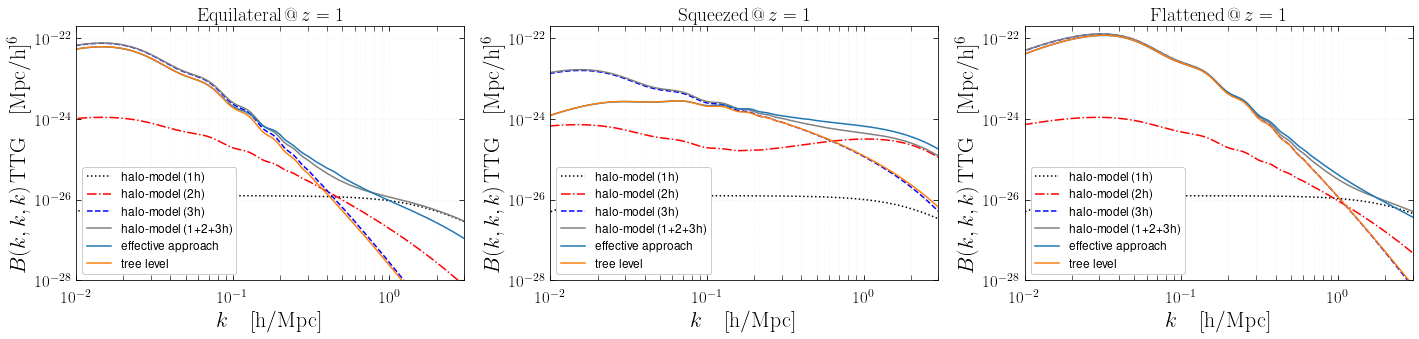

In [36]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$B(k,k,k)\,\mathrm{TTG}\quad\mathrm{[Mpc/h]^6}$',size=title_size)
ax.set_xlabel(r'$k\quad\mathrm{[h/Mpc]}$',size=title_size)

ax.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['1h'],label = 'halo-model (1h)',c='k',ls=':')
ax.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['2h'],label = 'halo-model (2h)',c='r',ls='-.')
ax.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['3h'],label = 'halo-model (3h)',c='b',ls='--')
ax.plot(bk_ttg_at_z_hm['k'],np.asarray(bk_ttg_at_z_hm['1h'])+np.asarray(bk_ttg_at_z_hm['2h'])+np.asarray(bk_ttg_at_z_hm['3h']),label = 'halo-model (1+2+3h)',c='grey',ls='-')

ax.plot(k1_a,np.asarray(Bk_TTG_HF),label='effective approach',alpha=1.)
ax.plot(k1_a,np.asarray(Bk_TTG_TL),label='tree level',alpha=1.)


ax.loglog()
# plt.xlabel(r'$k\quad\mathrm{[h/Mpc]}$')
# plt.ylabel(r'$B(k,k,k)\quad\mathrm{[Mpc/h]^6}$')
ax.set_ylim(1e-28,2e-22)
ax.set_xlim(1e-2,3e0)
# ax.grid(which='both')
ax.legend(loc=3,frameon=True,framealpha=1,fontsize=12)
# plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
# plt.savefig('bk_z1_wct_Mmin1e8.pdf')
ax.set_title(r'$\mathrm{Equilateral}\,@\, z=1$')




    
ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$B(k,k,k)\,\mathrm{TTG}\quad\mathrm{[Mpc/h]^6}$',size=title_size)
ax.set_xlabel(r'$k\quad\mathrm{[h/Mpc]}$',size=title_size)

ax.plot(bk_ttg_at_z_hm_sq['k'],bk_ttg_at_z_hm_sq['1h'],label = 'halo-model (1h)',c='k',ls=':')
ax.plot(bk_ttg_at_z_hm_sq['k'],bk_ttg_at_z_hm_sq['2h'],label = 'halo-model (2h)',c='r',ls='-.')
ax.plot(bk_ttg_at_z_hm_sq['k'],bk_ttg_at_z_hm_sq['3h'],label = 'halo-model (3h)',c='b',ls='--')
ax.plot(bk_ttg_at_z_hm_sq['k'],np.asarray(bk_ttg_at_z_hm_sq['1h'])+np.asarray(bk_ttg_at_z_hm_sq['2h'])+np.asarray(bk_ttg_at_z_hm_sq['3h']),label = 'halo-model (1+2+3h)',c='grey',ls='-')

ax.plot(k1_a,np.asarray(Bk_TTG_HF_sq),label='effective approach',alpha=1.)
ax.plot(k1_a,np.asarray(Bk_TTG_TL_sq),label='tree level',alpha=1.)



ax.loglog()
# plt.xlabel(r'$k\quad\mathrm{[h/Mpc]}$')
# plt.ylabel(r'$B(k,k,k)\quad\mathrm{[Mpc/h]^6}$')
ax.set_ylim(1e-28,2e-22)
ax.set_xlim(1e-2,3e0)
# ax.grid(which='both')
ax.legend(loc=3,frameon=True,framealpha=1,fontsize=12)
ax.set_title(r'$\mathrm{Squeezed}\,@\, z=1$')
# plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
# plt.savefig('bk_z1_wct_Mmin1e8.pdf')


ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$B(k,k,k)\,\mathrm{TTG}\quad\mathrm{[Mpc/h]^6}$',size=title_size)
ax.set_xlabel(r'$k\quad\mathrm{[h/Mpc]}$',size=title_size)

ax.plot(bk_ttg_at_z_hm_f['k'],bk_ttg_at_z_hm_f['1h'],label = 'halo-model (1h)',c='k',ls=':')
ax.plot(bk_ttg_at_z_hm_f['k'],bk_ttg_at_z_hm_f['2h'],label = 'halo-model (2h)',c='r',ls='-.')
ax.plot(bk_ttg_at_z_hm_f['k'],bk_ttg_at_z_hm_f['3h'],label = 'halo-model (3h)',c='b',ls='--')
ax.plot(bk_ttg_at_z_hm_f['k'],np.asarray(bk_ttg_at_z_hm_f['1h'])+np.asarray(bk_ttg_at_z_hm_f['2h'])+np.asarray(bk_ttg_at_z_hm_f['3h']),label = 'halo-model (1+2+3h)',c='grey',ls='-')

ax.plot(k1_a,np.asarray(Bk_TTG_HF_f),label='effective approach',alpha=1.)
ax.plot(k1_a,np.asarray(Bk_TTG_TL_f),label='tree level',alpha=1.)




ax.loglog()
# plt.xlabel(r'$k\quad\mathrm{[h/Mpc]}$')
# plt.ylabel(r'$B(k,k,k)\quad\mathrm{[Mpc/h]^6}$')
ax.set_ylim(1e1,3e8)
ax.set_xlim(2e-3,1e1)
# ax.grid(which='both')
ax.legend(loc=3,frameon=True,framealpha=1,fontsize=12)
ax.set_title(r'$\mathrm{Flattened}\,@\, z=1$')
ax.set_ylim(1e-28,2e-22)
ax.set_xlim(1e-2,3e0)
# plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
fig.tight_layout()
plt.savefig('bk_ttg_z1_wct_Mmin1e8_matter.pdf')




# Matter bispectrum configurations 

In [6]:

zz = 1.
M_min = 1e8
M = Class()
params = p18_cosmo
M.set(params)
M.set({
    'mass function' : 'T10',
    'M_min': M_min,
    'M_max': 1e16,
    'hm_consistency':1,
    'output': 'bk_at_z_1h,bk_at_z_2h,bk_at_z_3h,bk_at_z_hf',
    'non linear': 'halofit',


    'P_k_max_h/Mpc' : 30.,
    'k_per_decade_for_pk' : 50,

    'k_min_for_pk_class_sz' : 1e-4,
    'k_max_for_pk_class_sz' : 20.,
    'k_per_decade_class_sz' : 50.,
    "dlnk_for_pk_hm" : 0.01,
    "z_for_pk_hm" : zz,
    "k_min_for_pk_hm" : 1e-4,
    "k_max_for_pk_hm" : 2e1,
})
M.compute()
bk_at_z_hm = M.bk_at_z_hm()


z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Qk1_smoothed = []
Qk1_SC = []
Bk1_SC = []
Bk1_GM = []
Qk1_TL = []
Qk1 = []
Bk1_TL = []
Q3n = []
nlk1 = []
nlk1_no_wiggles = []
pk_linear = []
pk_halofit = []
for k1 in k1_a:
  n = M.get_nl_index_at_z_and_k(z,k1)
  n_no_wiggles = M.get_nl_index_at_z_and_k_no_wiggles(z,k1)
  nlk1.append(n)
  nlk1_no_wiggles.append(n_no_wiggles)
  Q3n.append(4.-2.**n/(1.+2**(n+1.)))
  k2 = k1
  #mu = np.cos(0.6*np.pi)
  k3 = k1#np.sqrt(k1**2+k2**2+2*k1*k2*mu)
    
  # Note the conversions between Mpc to Mpc/h
  pk1 = M.pk_nonlin(k1*h,z)*h**3
  pk_halofit.append(pk1)
  pk2 = M.pk_nonlin(k2*h,z)*h**3
  pk3 = M.pk_nonlin(k3*h,z)*h**3
  pk1lin = M.pk_lin(k1*h,z)*h**3
  pk_linear.append(pk1lin)
  pk2lin = M.pk_lin(k2*h,z)*h**3
  pk3lin = M.pk_lin(k3*h,z)*h**3

  Qk1_TL.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z)/(pk1lin*pk2lin + pk2lin*pk3lin + pk3lin*pk1lin))
  Bk1_TL.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))
  Qk1_SC.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Bk1_SC.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z))
  Qk1.append(M.get_matter_bispectrum_at_z_effective_approach(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Qk1_smoothed.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Bk1_GM.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z))



    
lambda2 = 1.
lambda3 = 0.01


# zz = 1.
# M_min = 1e8
M = Class()
# params = planck_2015
M.set(params)
M.set({
    'mass function' : 'T10',
    'M_min': M_min,
    'M_max': 1e16,
    'hm_consistency':1,
    'output': 'bk_at_z_1h,bk_at_z_2h,bk_at_z_3h,bk_at_z_hf',
    'non linear': 'halofit',


    'P_k_max_h/Mpc' : 30.,
    'k_per_decade_for_pk' : 50,

    'k_min_for_pk_class_sz' : 1e-4,
    'k_max_for_pk_class_sz' : 20.,
    'k_per_decade_class_sz' : 50.,
    "dlnk_for_pk_hm" : 0.01,
    "z_for_pk_hm" : zz,
    "k_min_for_pk_hm" : 1e-4,
    "k_max_for_pk_hm" : 2e1,
    "bispectrum_lambda_2" : lambda2,
    "bispectrum_lambda_3" : lambda3
})
M.compute()
bk_at_z_hm_sq = M.bk_at_z_hm()

Qk1_smoothed = []
Qk1_SC = []
Bk1_SC_sq = []
Bk1_GM_sq = []
Qk1_TL = []
Qk1 = []
Bk1_TL_sq = []
Q3n = []
nlk1 = []
nlk1_no_wiggles = []
pk_linear = []
pk_halofit = []
for k1 in k1_a:
  n = M.get_nl_index_at_z_and_k(z,k1)
  n_no_wiggles = M.get_nl_index_at_z_and_k_no_wiggles(z,k1)
  nlk1.append(n)
  nlk1_no_wiggles.append(n_no_wiggles)
  Q3n.append(4.-2.**n/(1.+2**(n+1.)))
  k2 = lambda2*k1
  #mu = np.cos(0.6*np.pi)
  k3 = lambda3*k1#np.sqrt(k1**2+k2**2+2*k1*k2*mu)
    
  # Note the conversions between Mpc to Mpc/h
  pk1 = M.pk_nonlin(k1*h,z)*h**3
  pk_halofit.append(pk1)
  pk2 = M.pk_nonlin(k2*h,z)*h**3
  pk3 = M.pk_nonlin(k3*h,z)*h**3
  pk1lin = M.pk_lin(k1*h,z)*h**3
  pk_linear.append(pk1lin)
  pk2lin = M.pk_lin(k2*h,z)*h**3
  pk3lin = M.pk_lin(k3*h,z)*h**3

  Qk1_TL.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z)/(pk1lin*pk2lin + pk2lin*pk3lin + pk3lin*pk1lin))
  Bk1_TL_sq.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))
  Qk1_SC.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Bk1_SC_sq.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z))
  Qk1.append(M.get_matter_bispectrum_at_z_effective_approach(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Qk1_smoothed.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Bk1_GM_sq.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z))





lambda2 = 0.5
lambda3 = 0.5






    
M.set({
    'mass function' : 'T10',
    'M_min': M_min,
    'M_max': 1e16,
    'hm_consistency':1,
    'output': 'bk_at_z_1h,bk_at_z_2h,bk_at_z_3h,bk_at_z_hf',
    'non linear': 'halofit',


    'P_k_max_h/Mpc' : 30.,
    'k_per_decade_for_pk' : 50,

    'k_min_for_pk_class_sz' : 1E-3,
    'k_max_for_pk_class_sz' : 20.,
    'k_per_decade_class_sz' : 50.,
    "dlnk_for_pk_hm" : 0.01,
    "z_for_pk_hm" : zz,
    "k_min_for_pk_hm" : 1e-4,
    "k_max_for_pk_hm" : 2e1,
    "bispectrum_lambda_2" : lambda2,
    "bispectrum_lambda_3" : lambda3
})
M.compute()
bk_at_z_hm_f = M.bk_at_z_hm()


Qk1_smoothed = []
Qk1_SC = []
Bk1_SC_f = []
Bk1_GM_f = []
Qk1_TL = []
Qk1 = []
Bk1_TL_f = []
Q3n = []
nlk1 = []
nlk1_no_wiggles = []
pk_linear = []
pk_halofit = []
for k1 in k1_a:
  n = M.get_nl_index_at_z_and_k(z,k1)
  n_no_wiggles = M.get_nl_index_at_z_and_k_no_wiggles(z,k1)
  nlk1.append(n)
  nlk1_no_wiggles.append(n_no_wiggles)
  Q3n.append(4.-2.**n/(1.+2**(n+1.)))
  k2 = lambda2*k1
  #mu = np.cos(0.6*np.pi)
  k3 = lambda3*k1#np.sqrt(k1**2+k2**2+2*k1*k2*mu)
    
  # Note the conversions between Mpc to Mpc/h
  pk1 = M.pk_nonlin(k1*h,z)*h**3
  pk_halofit.append(pk1)
  pk2 = M.pk_nonlin(k2*h,z)*h**3
  pk3 = M.pk_nonlin(k3*h,z)*h**3
  pk1lin = M.pk_lin(k1*h,z)*h**3
  pk_linear.append(pk1lin)
  pk2lin = M.pk_lin(k2*h,z)*h**3
  pk3lin = M.pk_lin(k3*h,z)*h**3

  Qk1_TL.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z)/(pk1lin*pk2lin + pk2lin*pk3lin + pk3lin*pk1lin))
  Bk1_TL_f.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))
  Qk1_SC.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Bk1_SC_f.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z))
  Qk1.append(M.get_matter_bispectrum_at_z_effective_approach(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Qk1_smoothed.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Bk1_GM_f.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z))







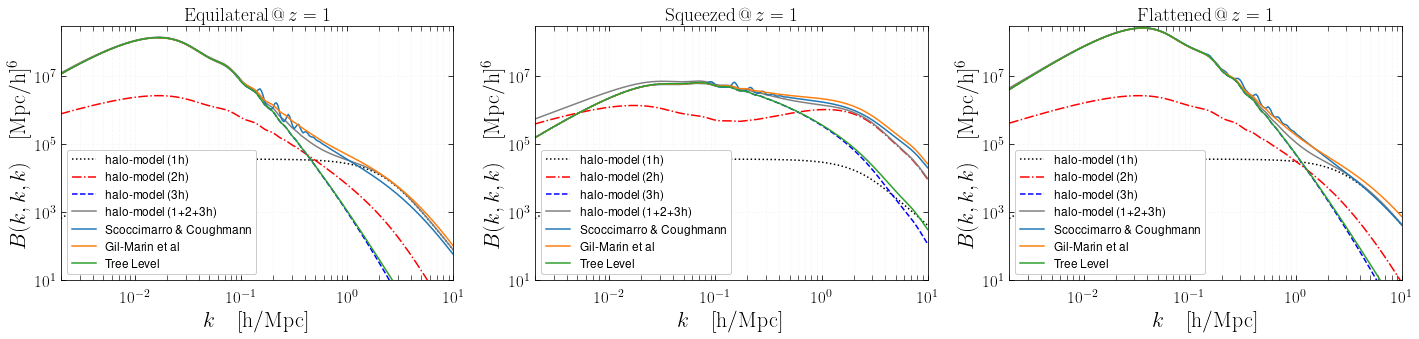

In [7]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$B(k,k,k)\quad\mathrm{[Mpc/h]^6}$',size=title_size)
ax.set_xlabel(r'$k\quad\mathrm{[h/Mpc]}$',size=title_size)

ax.plot(bk_at_z_hm['k'],bk_at_z_hm['1h'],label = 'halo-model (1h)',c='k',ls=':')
ax.plot(bk_at_z_hm['k'],bk_at_z_hm['2h'],label = 'halo-model (2h)',c='r',ls='-.')
ax.plot(bk_at_z_hm['k'],bk_at_z_hm['3h'],label = 'halo-model (3h)',c='b',ls='--')
ax.plot(bk_at_z_hm['k'],np.asarray(bk_at_z_hm['1h'])+np.asarray(bk_at_z_hm['2h'])+np.asarray(bk_at_z_hm['3h']),label = 'halo-model (1+2+3h)',c='grey',ls='-')
# plt.plot(k1_a,np.asarray(Qk1),label='Q(k1) Gil-Marin',alpha=0.2)
# plt.plot(k1_a,np.asarray(Qk1_smoothed),label='Q(k1) Gil-Marin smoothed',c='r',lw=2.)
# plt.plot(k1_a,np.asarray(Qk1_SC),label='Q(k1) SC',alpha=0.2)

ax.plot(k1_a,np.asarray(Bk1_SC),label='Scoccimarro \& Coughmann',alpha=1.)
ax.plot(k1_a,np.asarray(Bk1_GM),label='Gil-Marin et al',alpha=1.)
ax.plot(k1_a,np.asarray(Bk1_TL),label='Tree Level',alpha=1.)
ax.loglog()
# plt.xlabel(r'$k\quad\mathrm{[h/Mpc]}$')
# plt.ylabel(r'$B(k,k,k)\quad\mathrm{[Mpc/h]^6}$')
ax.set_ylim(1e1,3e8)
ax.set_xlim(2e-3,1e1)
# ax.grid(which='both')
ax.legend(loc=3,frameon=True,framealpha=1,fontsize=12)
# plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
# plt.savefig('bk_z1_wct_Mmin1e8.pdf')
ax.set_title(r'$\mathrm{Equilateral}\,@\, z=1$')




    
ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$B(k,k,k)\quad\mathrm{[Mpc/h]^6}$',size=title_size)
ax.set_xlabel(r'$k\quad\mathrm{[h/Mpc]}$',size=title_size)

ax.plot(bk_at_z_hm_sq['k'],bk_at_z_hm_sq['1h'],label = 'halo-model (1h)',c='k',ls=':')
ax.plot(bk_at_z_hm_sq['k'],bk_at_z_hm_sq['2h'],label = 'halo-model (2h)',c='r',ls='-.')
ax.plot(bk_at_z_hm_sq['k'],bk_at_z_hm_sq['3h'],label = 'halo-model (3h)',c='b',ls='--')
ax.plot(bk_at_z_hm_sq['k'],np.asarray(bk_at_z_hm_sq['1h'])+np.asarray(bk_at_z_hm_sq['2h'])+np.asarray(bk_at_z_hm_sq['3h']),label = 'halo-model (1+2+3h)',c='grey',ls='-')
# plt.plot(k1_a,np.asarray(Qk1),label='Q(k1) Gil-Marin',alpha=0.2)
# plt.plot(k1_a,np.asarray(Qk1_smoothed),label='Q(k1) Gil-Marin smoothed',c='r',lw=2.)
# plt.plot(k1_a,np.asarray(Qk1_SC),label='Q(k1) SC',alpha=0.2)

ax.plot(k1_a,np.asarray(Bk1_SC_sq),label='Scoccimarro \& Coughmann',alpha=1.)
ax.plot(k1_a,np.asarray(Bk1_GM_sq),label='Gil-Marin et al',alpha=1.)
ax.plot(k1_a,np.asarray(Bk1_TL_sq),label='Tree Level',alpha=1.)
ax.loglog()
# plt.xlabel(r'$k\quad\mathrm{[h/Mpc]}$')
# plt.ylabel(r'$B(k,k,k)\quad\mathrm{[Mpc/h]^6}$')
ax.set_ylim(1e1,3e8)
ax.set_xlim(2e-3,1e1)
# ax.grid(which='both')
ax.legend(loc=3,frameon=True,framealpha=1,fontsize=12)
ax.set_title(r'$\mathrm{Squeezed}\,@\, z=1$')
# plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
# plt.savefig('bk_z1_wct_Mmin1e8.pdf')


ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$B(k,k,k)\quad\mathrm{[Mpc/h]^6}$',size=title_size)
ax.set_xlabel(r'$k\quad\mathrm{[h/Mpc]}$',size=title_size)

ax.plot(bk_at_z_hm_f['k'],bk_at_z_hm_f['1h'],label = 'halo-model (1h)',c='k',ls=':')
ax.plot(bk_at_z_hm_f['k'],bk_at_z_hm_f['2h'],label = 'halo-model (2h)',c='r',ls='-.')
ax.plot(bk_at_z_hm_f['k'],bk_at_z_hm_f['3h'],label = 'halo-model (3h)',c='b',ls='--')
ax.plot(bk_at_z_hm_f['k'],np.asarray(bk_at_z_hm_f['1h'])+np.asarray(bk_at_z_hm_f['2h'])+np.asarray(bk_at_z_hm_f['3h']),label = 'halo-model (1+2+3h)',c='grey',ls='-')
# plt.plot(k1_a,np.asarray(Qk1),label='Q(k1) Gil-Marin',alpha=0.2)
# plt.plot(k1_a,np.asarray(Qk1_smoothed),label='Q(k1) Gil-Marin smoothed',c='r',lw=2.)
# plt.plot(k1_a,np.asarray(Qk1_SC),label='Q(k1) SC',alpha=0.2)

ax.plot(k1_a,np.asarray(Bk1_SC_f),label='Scoccimarro \& Coughmann',alpha=1.)
ax.plot(k1_a,np.asarray(Bk1_GM_f),label='Gil-Marin et al',alpha=1.)
ax.plot(k1_a,np.asarray(Bk1_TL_f),label='Tree Level',alpha=1.)
ax.loglog()
# plt.xlabel(r'$k\quad\mathrm{[h/Mpc]}$')
# plt.ylabel(r'$B(k,k,k)\quad\mathrm{[Mpc/h]^6}$')
ax.set_ylim(1e1,3e8)
ax.set_xlim(2e-3,1e1)
# ax.grid(which='both')
ax.legend(loc=3,frameon=True,framealpha=1,fontsize=12)
ax.set_title(r'$\mathrm{Flattened}\,@\, z=1$')
# plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
fig.tight_layout()
plt.savefig('bk_z1_wct_Mmin1e8_matter.pdf')










# kSZ Cl's

In [ ]:
# ksz power spectrum is the simple formula 1 of https://arxiv.org/pdf/1607.01769.pdf
M = Class()
M.set(ksz_params)
# M.set(battaglia_16)
M.set({# class_sz parameters:
       'output':'tCl,lCl,tSZ_1h,tSZ_2h,kSZ_kSZ_1h,kSZ_kSZ_2h',
        'modes':'s',
        'lensing': 'yes',
        'l_max_scalars':10000,
    'mass function' : 'T08M200c',
       'pressure profile': 'A10',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'concentration parameter': 'D08',  # B13: Bhattacharya et al 2013  
    
       'ell_max' : 10000,
       'ell_min' : 2,
       'z_min': 1e-2,
       'z_max': 4.,
       'M_min':1e9, # all masses in Msun/h
       'M_max':5e15,
       'B': 1.7, #hydrostatic equilibrium bias (1-b)^-1
       'units for tSZ spectrum': 'muK2',
       'Frequency for y-distortion in GHz': 150.,
'gas profile':'B16',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'delta for electron density': '200c',
'hm_consistency' : 0,
    
        'dell':0.,
        'dlogell':0.2,

'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'hmcode',
'x_out_truncated_nfw_profile':1.,
    
'k_min_gas_density_profile':1e-4,
'n_ell_density_profile':100,
'n_m_density_profile': 100, # 80
'n_z_density_profile': 100, # 80
'mass_epsrel' : 1e-5,
# 'perturb_sampling_stepsize' : 0.005,
# 'k_max_tau0_over_l_max':5.,
# 'neglect_CMB sources_below_visibility' : 1e-30,
# 'transfer_neglect_late_source': 3000.,
# 'halofit_k_per_decade': 3000.,
# 'accurate_lensing': 1,
# 'k_min_tau0': 0.002,
# 'k_step_sub':0.015,
# 'k_step_super':0.0001,
# 'k_step_super_reduction': .1,
# 'l_max_scalars':20000.,
        })
        
M.compute()

# M.struct_cleanup()
# M.empty()
cl_sz = M.cl_sz()
cl_ksz_b16 = M.cl_ksz()

M = Class()
M.set(ksz_params)
# M.set(battaglia_16)
M.set({# class_sz parameters:
       'output':'tCl,lCl,tSZ_1h,tSZ_2h,kSZ_kSZ_1h,kSZ_kSZ_2h',
        'modes':'s',
        'lensing': 'yes',
        'l_max_scalars':10000,
    'mass function' : 'T08M200c',
       'pressure profile': 'A10',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'concentration parameter': 'D08',  # B13: Bhattacharya et al 2013  
    
       'ell_max' : 10000,
       'ell_min' : 2,
       'z_min': 1e-2,
       'z_max': 4.,
       'M_min':1e9, # all masses in Msun/h
       'M_max':5e15,
       'B': 1.7, #hydrostatic equilibrium bias (1-b)^-1
       'units for tSZ spectrum': 'muK2',
       'Frequency for y-distortion in GHz': 150.,
'gas profile':'B16',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'delta for electron density': '200c',
'hm_consistency' : 1,
    
        'dell':0.,
        'dlogell':0.2,

'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'hmcode',
'x_out_truncated_nfw_profile':1.,
    
'k_min_gas_density_profile':1e-4,
'n_ell_density_profile':100,
'n_m_density_profile': 100, # 80
'n_z_density_profile': 100, # 80
'mass_epsrel' : 1e-5,
# 'perturb_sampling_stepsize' : 0.005,
# 'k_max_tau0_over_l_max':5.,
# 'neglect_CMB sources_below_visibility' : 1e-30,
# 'transfer_neglect_late_source': 3000.,
# 'halofit_k_per_decade': 3000.,
# 'accurate_lensing': 1,
# 'k_min_tau0': 0.002,
# 'k_step_sub':0.015,
# 'k_step_super':0.0001,
# 'k_step_super_reduction': .1,
# 'l_max_scalars':20000.,
        })
        
M.compute()

# M.struct_cleanup()
# M.empty()
cl_sz = M.cl_sz()
cl_ksz_b16_with_cd = M.cl_ksz()

# ksz power spectrum is the simple formula 1 of https://arxiv.org/pdf/1607.01769.pdf
M = Class()
M.set(ksz_params)
# M.set(battaglia_16)
M.set({# class_sz parameters:
       'output':'tCl,lCl,tSZ_1h,tSZ_2h,kSZ_kSZ_1h,kSZ_kSZ_2h',
        'modes':'s',
        'lensing': 'yes',
        'l_max_scalars':10000,
    'mass function' : 'T08M200c',
       'pressure profile': 'A10',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'concentration parameter': 'D08',  # B13: Bhattacharya et al 2013  
        'dell':0.,
        'dlogell':0.2,
    
       'ell_max' : 10000,
       'ell_min' : 2,
       'z_min': 1e-2,
       'z_max': 4.,
       'M_min':1e9, # all masses in Msun/h
       'M_max':5e15,
       'B': 1.7, #hydrostatic equilibrium bias (1-b)^-1
       'units for tSZ spectrum': 'muK2',
       'Frequency for y-distortion in GHz': 150.,
'gas profile':'nfw',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'delta for electron density': '200c',
'hm_consistency' : 0,
    


'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'hmcode',
'x_out_truncated_nfw_profile':1.,

'k_min_gas_density_profile':1e-4,
'n_ell_density_profile':100,
'n_m_density_profile': 100, # 80
'n_z_density_profile': 100, # 80
'mass_epsrel' : 1e-5,
# 'perturb_sampling_stepsize' : 0.005,
# 'k_max_tau0_over_l_max':5.,
# 'neglect_CMB sources_below_visibility' : 1e-30,
# 'transfer_neglect_late_source': 3000.,
# 'halofit_k_per_decade': 3000.,
# 'accurate_lensing': 1,
# 'k_min_tau0': 0.002,
# 'k_step_sub':0.015,
# 'k_step_super':0.0001,
# 'k_step_super_reduction': .1,
# 'l_max_scalars':20000.,
        })
        
M.compute()

# M.struct_cleanup()
# M.empty()
cl_sz = M.cl_sz()
cl_ksz_nfw = M.cl_ksz()

CosmoSevereError: 

Error in Class: No Cl computed

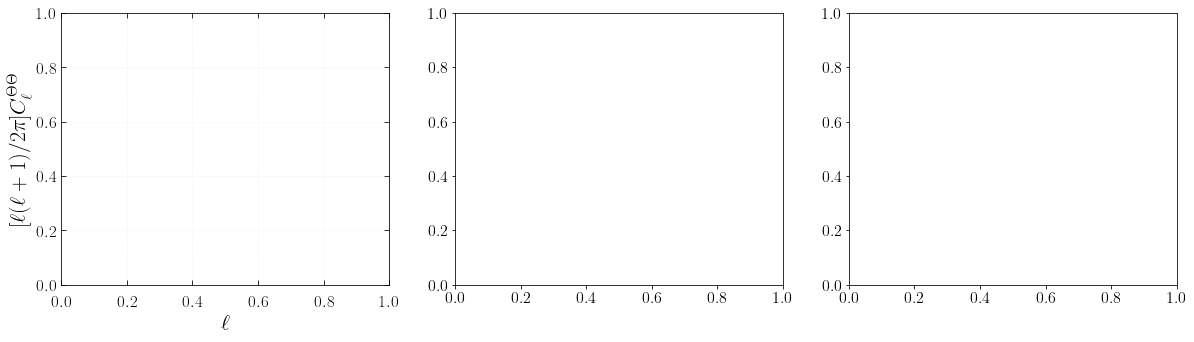

In [187]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r"$[\ell(\ell+1)/2\pi] C_\ell^{\Theta\Theta}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)



ax.plot(M.raw_cl()['ell'],M.raw_cl()['ell']*(M.raw_cl()['ell']+1.)/2./np.pi*M.raw_cl()['tt'],label='unlensed cmb')
ax.plot(M.lensed_cl()['ell'],M.lensed_cl()['ell']*(M.lensed_cl()['ell']+1.)/2./np.pi*M.lensed_cl()['tt'],label='lensed cmb')

ax.plot(l_bat,dl_bat*(M.T_cmb()*1e6)**-2.,label='ksz (battaglia template)')
# ax.plot(cl_ksz['ell'],np.asarray(cl_ksz['1h'])+np.asarray(cl_ksz['2h']),label='ksz (class\_sz)')

l_arr = np.geomspace(1e2,5e4,100)
arcmin_to_radians = np.pi/(60.*180.)


# DeltaT = 15.*arcmin_to_radians
# ThetaFWHM = 1.4*arcmin_to_radians
# Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))*(M.T_cmb()*1e6)**-2.
# ax.plot(l_arr,l_arr*(l_arr+1.)*Nl/2./np.pi,label='Nl adv-act')


DeltaT = 47.*arcmin_to_radians
ThetaFWHM = 5.*arcmin_to_radians
Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))*(M.T_cmb()*1e6)**-2.
ax.plot(l_arr,l_arr*(l_arr+1.)*Nl/2./np.pi,label='Nl planck')


ax.plot(nl_advact_l,nl_advact_l*(nl_advact_l+1.)/2./np.pi*nl_advact_nl_tt*(M.T_cmb()*1e6)**-2.,label='advact')
ax.plot(nl_so_goal_l,nl_so_goal_l*(nl_so_goal_l+1.)/2./np.pi*nl_so_goal_nl_std_ilc*(M.T_cmb()*1e6)**-2.,label='so goal')
ax.plot(nl_s4_l,nl_s4_l*(nl_s4_l+1.)/2./np.pi*nl_s4_nl_tt*(M.T_cmb()*1e6)**-2.,label='s4')




ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(fontsize=12)
ax.set_ylim(1e-14,1e-9)
ax.set_xlim(1e2,8e3)



ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')

ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r"$[\ell(\ell+1)/2\pi] C_\ell^{\delta_\tau\delta_\tau}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)


# ax.plot(M.raw_cl()['ell'],M.raw_cl()['ell']*(M.raw_cl()['ell']+1.)/2./np.pi*M.raw_cl()['tt'],label='unlensed cmb')
# ax.plot(M.lensed_cl()['ell'],M.lensed_cl()['ell']*(M.lensed_cl()['ell']+1.)/2./np.pi*M.lensed_cl()['tt'],label='lensed cmb')
l_bat,dl_bat = np.loadtxt(path_to_files+'/cl_ksz_bat.dat',unpack=True)
ax.plot(l_bat,dl_bat*(M.T_cmb()*1e6)**-2.,label='Template (Battaglia et al 2016)',ls='-.',c='b')
ax.plot(cl_ksz_b16['ell'],np.asarray(cl_ksz_b16['1h']),c='k',alpha=0.2,ls=':')
ax.plot(cl_ksz_b16['ell'],np.asarray(cl_ksz_b16['2h']),c='k',alpha=0.2,ls='--')
ax.plot(cl_ksz_b16['ell'],np.asarray(cl_ksz_b16['1h'])+np.asarray(cl_ksz_b16['2h']),c='k',ls='-',label='AGN feedback')

ax.plot(cl_ksz_b16_with_cd['ell'],np.asarray(cl_ksz_b16_with_cd['1h']),c='r',alpha=0.2,ls=':')
ax.plot(cl_ksz_b16_with_cd['ell'],np.asarray(cl_ksz_b16_with_cd['2h']),c='r',alpha=0.2,ls='--')
ax.plot(cl_ksz_b16_with_cd['ell'],np.asarray(cl_ksz_b16_with_cd['1h'])+np.asarray(cl_ksz_b16_with_cd['2h']),c='r',ls='-',label='with conditions')



ax.plot(cl_ksz_nfw['ell'],np.asarray(cl_ksz_nfw['1h']),c='green',alpha=0.2,ls=':')
ax.plot(cl_ksz_nfw['ell'],np.asarray(cl_ksz_nfw['2h']),c='green',alpha=0.2,ls='--')
ax.plot(cl_ksz_nfw['ell'],np.asarray(cl_ksz_nfw['1h'])+np.asarray(cl_ksz_nfw['2h']),c='green',ls='-',label=r'$f_b\times$NFW')


ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(fontsize=12)
ax.set_ylim(1e-15,6e-13)
ax.set_xlim(10,1e4)

l_advact, F_advact = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',unpack=True)
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',unpack=True)


#'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',

# label_size = 17
# title_size = 22
# legend_size = 13
# handle_length = 1.5
# fig, (ax1) = plt.subplots(1,1,figsize=(8,5))
ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.plot(l_advact,F_advact/np.max(F_advact),label='advACT',c='k',ls='--')
ax.plot(l_planck,F_planck/np.max(F_planck),label='planck',c='r')
ax.legend(loc=1)

ax.set_ylabel(r'$F(\ell)=f(\ell)\times b(\ell)$',size=title_size)
ax.set_xlabel(r'$\ell$',size=title_size)

ax.set_ylims(0.,1.1)



# plt.title('no consistency condition')
fig.tight_layout()
plt.savefig('cls_ksz_figure.pdf')

In [33]:
path_to_noise_curves = path_to_files+'/noise_curves/'
nl_so_goal_l, nl_so_goal_nl_std_ilc, nl_so_goal_nl_cilc_tsz, nl_so_goal_nl_cilc_cib, nl_so_goal_nl_cilc_tszcib = np.loadtxt(path_to_noise_curves + 'SO_LAT_Nell_T_atmv1_goal_fsky0p4_ILC_CMB.txt',unpack=True)
nl_advact_l, nl_advact_nl_tt, nl_advact_nl_yy = np.loadtxt(path_to_noise_curves + 'AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',unpack=True)
nl_s4_l, nl_s4_nl_tt, nl_s4_nl_yy = np.loadtxt(path_to_noise_curves +'S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',unpack=True)
l_bat,dl_bat = np.loadtxt(path_to_files+'/cl_ksz_bat.dat',unpack=True)

/var/folders/_q/j04c9lw93j75_c_z2jdfbtwm0000gn/T/ipykernel_20775/2729388986.py:42: RuntimeWarning: overflow encountered in exp
  Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))*(M.T_cmb()*1e6)**-2.


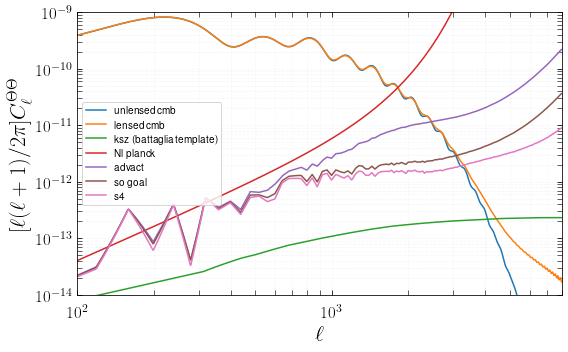

In [314]:
cl_sz = M.cl_sz()
cl_ksz = M.cl_ksz()
# plt.plot(cl_sz['ell'],(np.asarray(cl_sz['1h'])+np.asarray(cl_sz['2h']))*(M.T_cmb()*1e6)**-2.,label='tsz at 150GHz')

label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(8,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r"$[\ell(\ell+1)/2\pi] C_\ell^{\Theta\Theta}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)



ax.plot(M.raw_cl()['ell'],M.raw_cl()['ell']*(M.raw_cl()['ell']+1.)/2./np.pi*M.raw_cl()['tt'],label='unlensed cmb')
ax.plot(M.lensed_cl()['ell'],M.lensed_cl()['ell']*(M.lensed_cl()['ell']+1.)/2./np.pi*M.lensed_cl()['tt'],label='lensed cmb')

ax.plot(l_bat,dl_bat*(M.T_cmb()*1e6)**-2.,label='ksz (battaglia template)')
# ax.plot(cl_ksz['ell'],np.asarray(cl_ksz['1h'])+np.asarray(cl_ksz['2h']),label='ksz (class\_sz)')

l_arr = np.geomspace(1e2,5e4,100)
arcmin_to_radians = np.pi/(60.*180.)


# DeltaT = 15.*arcmin_to_radians
# ThetaFWHM = 1.4*arcmin_to_radians
# Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))*(M.T_cmb()*1e6)**-2.
# ax.plot(l_arr,l_arr*(l_arr+1.)*Nl/2./np.pi,label='Nl adv-act')


DeltaT = 47.*arcmin_to_radians
ThetaFWHM = 5.*arcmin_to_radians
Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))*(M.T_cmb()*1e6)**-2.
ax.plot(l_arr,l_arr*(l_arr+1.)*Nl/2./np.pi,label='Nl planck')


ax.plot(nl_advact_l,nl_advact_l*(nl_advact_l+1.)/2./np.pi*nl_advact_nl_tt*(M.T_cmb()*1e6)**-2.,label='advact')
ax.plot(nl_so_goal_l,nl_so_goal_l*(nl_so_goal_l+1.)/2./np.pi*nl_so_goal_nl_std_ilc*(M.T_cmb()*1e6)**-2.,label='so goal')
ax.plot(nl_s4_l,nl_s4_l*(nl_s4_l+1.)/2./np.pi*nl_s4_nl_tt*(M.T_cmb()*1e6)**-2.,label='s4')




ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
ax.set_ylim(1e-14,1e-9)
ax.set_xlim(1e2,8e3)

# ax = ax2
# ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
# ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
# ax.xaxis.set_ticks_position('both')
# ax.yaxis.set_ticks_position('both')
# plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
# plt.setp(ax.get_xticklabels(), fontsize=label_size)
# ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

# ax.set_ylabel(r"$[\ell(\ell+1)/2\pi] C_\ell^{\delta_\tau\delta_\tau}$",size=title_size)
# ax.set_xlabel(r"$\ell$",size=title_size)


# # ax.plot(M.raw_cl()['ell'],M.raw_cl()['ell']*(M.raw_cl()['ell']+1.)/2./np.pi*M.raw_cl()['tt'],label='unlensed cmb')
# # ax.plot(M.lensed_cl()['ell'],M.lensed_cl()['ell']*(M.lensed_cl()['ell']+1.)/2./np.pi*M.lensed_cl()['tt'],label='lensed cmb')
# l_bat,dl_bat = np.loadtxt(path_to_files+'/cl_ksz_bat.dat',unpack=True)
# ax.plot(l_bat,dl_bat*(M.T_cmb()*1e6)**-2.,label='Battaglia et al')
# ax.plot(cl_ksz['ell'],np.asarray(cl_ksz['1h']),c='k',ls=':',label='class\_sz 1h')
# ax.plot(cl_ksz['ell'],np.asarray(cl_ksz['2h']),c='k',ls='--',label='class\_sz 2h')
# ax.plot(cl_ksz['ell'],np.asarray(cl_ksz['1h'])+np.asarray(cl_ksz['2h']),c='k',ls='-',label='class\_sz 1+2h')

# ax.set_yscale('linear')
# ax.set_xscale('log')
# ax.legend()
# ax.set_ylim(1e-14,3e-13)
# ax.set_xlim(9e1,8e3)

fig.tight_layout()
plt.savefig('cls_ksz_figure.pdf')


# cl's

In [196]:
z_for_pk_hm = 1.
M_min = 1e10
M = Class()
M.set(ksz_params)
M.set({
'mass function':'T08M200c',
'output': 'lCl,lens_lens_1h,lens_lens_2h,gal_lens_1h,gal_lens_2h,lens_lensmag_1h,lens_lensmag_2h,gal_gal_1h,gal_gal_2h,gal_lensmag_1h,gal_lensmag_2h,lensmag_lensmag_1h,lensmag_lensmag_2h',
'M_min' : M_min,
'M_max' : 1e17,
'hm_consistency' : 1,
'z_min' : 1.e-6,
'z_max' : 15.,

"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-4,
"k_max_for_pk_hm" : 1e2,
    
'ndim_masses' : 128, # important 128 is default ccl value
'ndim_redshifts' : 150,
'mass_epsrel':1e-4,
    
'ell_min' : 5.0,
'ell_max' : 20000.0,

'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 200.0,
'non linear':'halofit',
'x_out_truncated_nfw_profile':1.,
'x_out_truncated_nfw_profile_satellite_galaxies':1.,
# 'galaxy_sample' : 'custom',
# 'full_path_to_dndz_gal' : '/Users/boris/Work/DES/nz_redmagic_z_bin1.txt', # lens galaxies
# 'delta for galaxies':'200c',
# 'delta for matter density':'200c',
'concentration parameter':'D08',
# 'M_min_HOD':10.**11.97*zacharegas21_cosmo_redmagic['h'],
# 'M1_prime_HOD':10.**13.51*zacharegas21_cosmo_redmagic['h'],
# 'sigma_log10M_HOD':0.26,
# 'alpha_s_HOD':1.88,
# 'alpha_s_HOD' : 0.0,
# 'M_min_HOD' : 1e11,
# 'M1_prime_HOD' : 1.0,
'gas profile' : 'B16',
'gas profile mode' : 'shock',
'normalize_gas_density_profile': 1,
'perturb_sampling_stepsize' : 0.005,
'k_max_tau0_over_l_max':5.,
# 'neglect_CMB sources_below_visibility' : 1e-30,
# 'transfer_neglect_late_source': 3000.,
# 'halofit_k_per_decade': 3000.,
# 'accurate_lensing': 1,
# 'k_min_tau0': 0.002,
# 'k_step_sub':0.015,
# 'k_step_super':0.0001,
# 'k_step_super_reduction': .1,
'l_max_scalars':20000.,
})
# M.set({'output':'pk_gg_at_z_1h,pk_at_z_1h,pk_gg_at_z_2h,pk_at_z_2h'})
# M.set({'z_for_pk_hm':zz})
M.compute()



# M.struct_cleanup()
# M.empty()


In [197]:
cl_gg = M.cl_gg
cl_mm = M.cl_mm
cl_gm = M.cl_gm
cl_kg = M.cl_kg
cl_km = M.cl_km
cl_kk = M.cl_kk

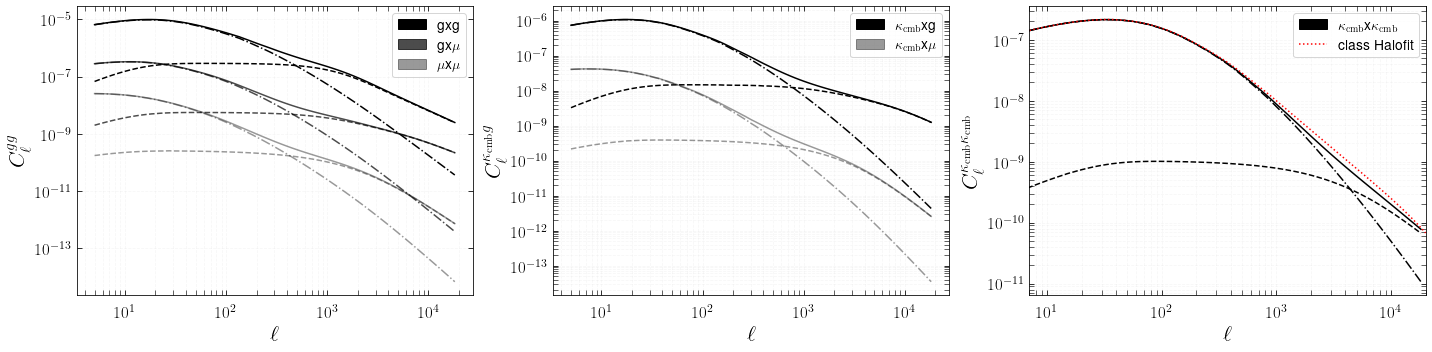

In [199]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r"$C_\ell^{gg}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)

ell = np.asarray(cl_gg()['ell'])
cl_gg_1h = np.asarray(cl_gg()['1h'])
cl_gg_2h = np.asarray(cl_gg()['2h'])

# ell = np.asarray(cl_gg()['ell'])
cl_mm_1h = np.asarray(cl_mm()['1h'])
cl_mm_2h = np.asarray(cl_mm()['2h'])

cl_gm_1h = np.asarray(cl_gm()['1h'])
cl_gm_2h = np.asarray(cl_gm()['2h'])

fac = ell*(ell+1.)/2./np.pi

ax.plot(ell,cl_gg_1h/fac,ls='--',c='k',label=r'$\mathrm{1}$-$\mathrm{halo}$')
ax.plot(ell,cl_gg_2h/fac,ls='-.',c='k',label=r'$\mathrm{2}$-$\mathrm{halo}$')
ax.plot(ell,cl_gg_2h/fac+cl_gg_1h/fac,ls='-',c='k',label=r'$\mathrm{1+2}$-$\mathrm{halo}$')

ax.plot(ell,cl_mm_1h/fac,ls='--',color='k',alpha=0.4,label=r'$\mathrm{1}$-$\mathrm{halo}$')
ax.plot(ell,cl_mm_2h/fac,ls='-.',color='k',alpha=0.4,label=r'$\mathrm{2}$-$\mathrm{halo}$')
ax.plot(ell,cl_mm_2h/fac+cl_mm_1h/fac,ls='-',color='k',alpha=0.4,label=r'$\mathrm{1+2}$-$\mathrm{halo}$')

ax.plot(ell,cl_gm_1h/fac,ls='--',color='k',alpha=0.7,label=r'$\mathrm{1}$-$\mathrm{halo}$')
ax.plot(ell,cl_gm_2h/fac,ls='-.',color='k',alpha=0.7,label=r'$\mathrm{2}$-$\mathrm{halo}$')
ax.plot(ell,cl_gm_2h/fac+cl_gm_1h/fac,ls='-',color='k',alpha=0.7,label=r'$\mathrm{1+2}$-$\mathrm{halo}$')

ax.set_xscale('log')
ax.set_yscale('log')

gg_patch = mpatches.Patch(color='k', label='gxg')
gmu_patch = mpatches.Patch(color='k',alpha=0.7, label=r'gx$\mu$')
mumu_patch = mpatches.Patch(color='k',alpha=0.4, label=r'$\mu$x$\mu$')


ax.legend(handles=[gg_patch,gmu_patch,mumu_patch],ncol=1,fontsize=14)



ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r"$C_\ell^{\kappa_\mathrm{cmb}g}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)

ell = np.asarray(cl_kg()['ell'])
cl_kg_1h = np.asarray(cl_kg()['1h'])
cl_kg_2h = np.asarray(cl_kg()['2h'])

# ell = np.asarray(cl_gg()['ell'])
cl_km_1h = np.asarray(cl_km()['1h'])
cl_km_2h = np.asarray(cl_km()['2h'])

ax.plot(ell,cl_kg_1h/fac,ls='--',c='k',label=r'$\mathrm{1}$-$\mathrm{halo}$')
ax.plot(ell,cl_kg_2h/fac,ls='-.',c='k',label=r'$\mathrm{2}$-$\mathrm{halo}$')
ax.plot(ell,cl_kg_2h/fac+cl_kg_1h/fac,ls='-',c='k',label=r'$\mathrm{1+2}$-$\mathrm{halo}$')

ax.plot(ell,cl_km_1h/fac,ls='--',color='k',alpha=0.4,label=r'$\mathrm{1}$-$\mathrm{halo}$')
ax.plot(ell,cl_km_2h/fac,ls='-.',color='k',alpha=0.4,label=r'$\mathrm{2}$-$\mathrm{halo}$')
ax.plot(ell,cl_km_2h/fac+cl_km_1h/fac,ls='-',color='k',alpha=0.4,label=r'$\mathrm{1+2}$-$\mathrm{halo}$')


ax.set_xscale('log')
ax.set_yscale('log')

kg_patch = mpatches.Patch(color='k', label=r'$\kappa_\mathrm{cmb}$xg')
kmu_patch = mpatches.Patch(color='k',alpha=0.4, label=r'$\kappa_\mathrm{cmb}$x$\mu$')



ax.legend(handles=[kg_patch,kmu_patch],ncol=1,fontsize=14)


ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r"$C_\ell^{\kappa_\mathrm{cmb}\kappa_\mathrm{cmb}}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)

ell = np.asarray(cl_kk()['ell'])
cl_kk_1h = np.asarray(cl_kk()['1h'])
cl_kk_2h = np.asarray(cl_kk()['2h'])

# ell = np.asarray(cl_gg()['ell'])
cl_km_1h = np.asarray(cl_km()['1h'])
cl_km_2h = np.asarray(cl_km()['2h'])

ax.plot(ell,cl_kk_1h/fac,ls='--',c='k',label=r'$\mathrm{1}$-$\mathrm{halo}$')
ax.plot(ell,cl_kk_2h/fac,ls='-.',c='k',label=r'$\mathrm{2}$-$\mathrm{halo}$')
ax.plot(ell,cl_kk_2h/fac+cl_kk_1h/fac,ls='-',c='k',label=r'$\mathrm{1+2}$-$\mathrm{halo}$')

# M.raw_cl()['ell']
# M.raw_cl()['pp']

class_cls, = ax.plot(M.raw_cl()['ell'],M.raw_cl()['pp']*(M.raw_cl()['ell']*(M.raw_cl()['ell']+1.)/2.)**2.,ls=':',c='r',label=r'class Halofit')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(7e0,2.e4)

kk_patch = mpatches.Patch(color='k', label=r'$\kappa_\mathrm{cmb}$x$\kappa_\mathrm{cmb}$')




ax.legend(handles=[kk_patch,class_cls],ncol=1,fontsize=14)


fig.tight_layout()
plt.savefig('cls_figure.pdf')

In [121]:
cl_mm_1h

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

# bias as a function of redshift

In [39]:
z_for_pk_hm = 1.
M_min = 1e10
M = Class()
M.set(ksz_params)
M.set({
'mass function':'T08M200c',
'output': 'mean_galaxy_bias,mPk,gal_gal_1h,gal_gal_2h,pk_at_z_1h,pk_at_z_2h,mPk,pk_bb_at_z_1h,pk_bb_at_z_2h,pk_gg_at_z_1h,pk_gg_at_z_2h,dndlnM',
'M_min' : M_min,
'M_max' : 1e17,
'hm_consistency' : 1,
'z_min' : 1.e-6,
'z_max' : 4.,

"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-4,
"k_max_for_pk_hm" : 1e2,
    
'ndim_masses' : 128, # important 128 is default ccl value
'ndim_redshifts' : 150,
'mass_epsrel':1e-4,

'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'halofit',
'x_out_truncated_nfw_profile':1.,
'x_out_truncated_nfw_profile_satellite_galaxies':1.,
# 'galaxy_sample' : 'custom',
# 'full_path_to_dndz_gal' : '/Users/boris/Work/DES/nz_redmagic_z_bin1.txt', # lens galaxies
# 'delta for galaxies':'200c',
# 'delta for matter density':'200c',
'concentration parameter':'D08',
# 'M_min_HOD':10.**11.97*zacharegas21_cosmo_redmagic['h'],
# 'M1_prime_HOD':10.**13.51*zacharegas21_cosmo_redmagic['h'],
# 'sigma_log10M_HOD':0.26,
# 'alpha_s_HOD':1.88,
# 'alpha_s_HOD' : 0.0,
# 'M_min_HOD' : 1e11,
# 'M1_prime_HOD' : 1.0,
'gas profile' : 'B16',
'gas profile mode' : 'shock',
'normalize_gas_density_profile': 1
})
# M.set({'output':'pk_gg_at_z_1h,pk_at_z_1h,pk_gg_at_z_2h,pk_at_z_2h'})
# M.set({'z_for_pk_hm':zz})
M.compute()
pk_at_z_hm = M.pk_at_z_hm()
pk_gg_at_z_hm = M.pk_gg_at_z_hm()
pk_at_z_class_halofit = np.vectorize(M.pk)
pk_bb_at_z_hm_shock = M.pk_bb_at_z_hm()




get_mean_galaxy_bias_at_z_blue = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_dNgdz_cat_blue = np.vectorize(M.get_galaxy_number_counts)
# M.struct_cleanup()
# M.empty()

M = Class()
M.set(ksz_params)
M.set({
'mass function':'T08M200c',
'output': 'mean_galaxy_bias,mPk,gal_gal_1h,gal_gal_2h,pk_at_z_1h,pk_at_z_2h,mPk,pk_bb_at_z_1h,pk_bb_at_z_2h,pk_gg_at_z_1h,pk_gg_at_z_2h,dndlnM',
'M_min' : M_min,
'M_max' : 1e17,
'hm_consistency' : 1,
'z_min' : 1.e-6,
'z_max' : 4.,

"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-4,
"k_max_for_pk_hm" : 1e2,
    
'ndim_masses' : 128, # important 128 is default ccl value
'ndim_redshifts' : 150,
'mass_epsrel':1e-4,

'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'halofit',
'x_out_truncated_nfw_profile':1.,
'x_out_truncated_nfw_profile_satellite_galaxies':1.,
# 'galaxy_sample' : 'custom',
# 'full_path_to_dndz_gal' : '/Users/boris/Work/DES/nz_redmagic_z_bin1.txt', # lens galaxies
# 'delta for galaxies':'200c',
# 'delta for matter density':'200c',
'concentration parameter':'D08',
# 'M_min_HOD':10.**11.97*zacharegas21_cosmo_redmagic['h'],
# 'M1_prime_HOD':10.**13.51*zacharegas21_cosmo_redmagic['h'],
# 'sigma_log10M_HOD':0.26,
# 'alpha_s_HOD':1.88,
# 'alpha_s_HOD' : 0.0,
# 'M_min_HOD' : 1e11,
# 'M1_prime_HOD' : 1.0,
'gas profile' : 'B16',
'gas profile mode' : 'shock',
'normalize_gas_density_profile': 1
})

M.set({
    'galaxy_sample_id' : 'green',
    'sigma_log10M_HOD' : 0.36,
'alpha_s_HOD' : 2.88,
'M_min_HOD' : 9500000000000.0,
'M1_prime_HOD' : 108000000000000.0,
})
M.compute()
get_mean_galaxy_bias_at_z_green = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_dNgdz_cat_green = np.vectorize(M.get_galaxy_number_counts)
# M.struct_cleanup()
# M.empty()

In [42]:

z_arr = np.linspace(0.005,2.5,100)
get_mean_galaxy_bias_at_z_blue(z_arr)
get_dNgdz_cat_blue(z_arr)

array([5.25113842e-04, 1.06182284e-02, 3.75239286e-02, 8.27883950e-02,
       1.46047677e-01, 2.24398688e-01, 3.16353504e-01, 4.20249884e-01,
       5.33095605e-01, 6.50174127e-01, 7.65740786e-01, 8.74265033e-01,
       9.69708978e-01, 1.04817847e+00, 1.10971225e+00, 1.15629862e+00,
       1.19059158e+00, 1.21426464e+00, 1.22973923e+00, 1.23878139e+00,
       1.24263869e+00, 1.24291328e+00, 1.24094584e+00, 1.23810997e+00,
       1.23507252e+00, 1.23188277e+00, 1.22857398e+00, 1.22517348e+00,
       1.22164356e+00, 1.21692389e+00, 1.20864759e+00, 1.19419072e+00,
       1.17132983e+00, 1.13721410e+00, 1.09099301e+00, 1.03362220e+00,
       9.65952727e-01, 8.89652638e-01, 8.05679473e-01, 7.16021451e-01,
       6.24478484e-01, 5.35130950e-01, 4.51991114e-01, 3.78955416e-01,
       3.19590165e-01, 2.72032170e-01, 2.33775936e-01, 2.01967931e-01,
       1.73747649e-01, 1.46808422e-01, 1.20805817e-01, 9.64801115e-02,
       7.47493498e-02, 5.62590833e-02, 4.17941417e-02, 3.11938468e-02,
      

In [43]:
get_mean_galaxy_bias_at_z_green(z_arr)
get_dNgdz_cat_green(z_arr)

array([3.66590993e-04, 6.82617044e-03, 2.21747240e-02, 4.62880502e-02,
       8.03863291e-02, 1.24663038e-01, 1.80092850e-01, 2.47653746e-01,
       3.25720887e-01, 4.07457852e-01, 4.84016523e-01, 5.46867999e-01,
       5.86578112e-01, 5.97758483e-01, 5.83167218e-01, 5.49624903e-01,
       5.04630913e-01, 4.54904822e-01, 4.07253510e-01, 3.64733034e-01,
       3.28809261e-01, 3.00436180e-01, 2.80954430e-01, 2.71631934e-01,
       2.72518485e-01, 2.83696849e-01, 3.04419482e-01, 3.34273222e-01,
       3.73121179e-01, 4.19385918e-01, 4.70983791e-01, 5.25562316e-01,
       5.80696629e-01, 6.34015067e-01, 6.83838415e-01, 7.29523658e-01,
       7.70352890e-01, 8.06014015e-01, 8.35792044e-01, 8.59868344e-01,
       8.80418550e-01, 8.99750262e-01, 9.20333759e-01, 9.44490383e-01,
       9.73655855e-01, 1.00404199e+00, 1.03043044e+00, 1.04750914e+00,
       1.05047658e+00, 1.03447789e+00, 1.00172546e+00, 9.56770618e-01,
       9.03991064e-01, 8.48508097e-01, 7.94632490e-01, 7.43916779e-01,
      

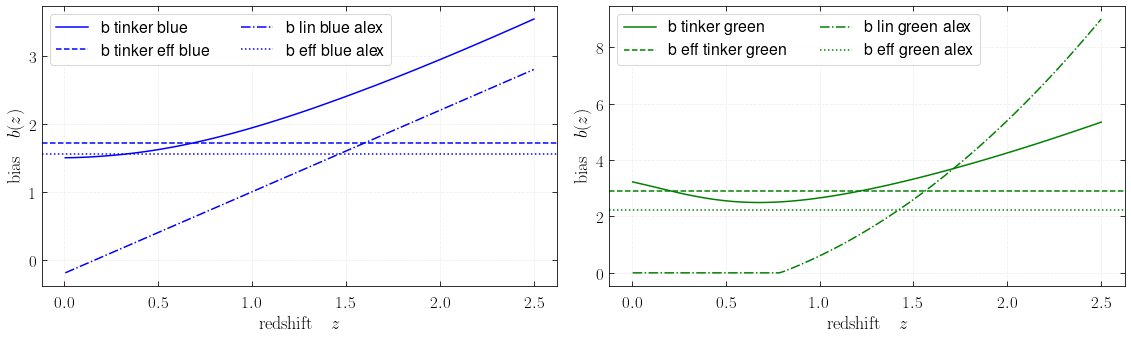

In [93]:


label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
ax = ax1
ax.plot(z_arr,get_mean_galaxy_bias_at_z_blue(z_arr),c='b',label='b tinker blue')
# ax.plot(z_arr,get_mean_galaxy_bias_at_z_green(z_arr),c='green',label='green')
# bg_eff_green = np.trapz(get_mean_galaxy_bias_at_z_green(z_arr)*get_dNgdz_cat_green(z_arr),z_arr)
bg_eff_blue = np.trapz(get_mean_galaxy_bias_at_z_blue(z_arr)*get_dNgdz_cat_blue(z_arr),z_arr)
ax.axhline(bg_eff_blue,ls='--',c='b',label='b tinker eff blue')

def b_lin_alex_blue(zp):
    #0.8 + 1.2z − 1
    return 0.8 + 1.2*zp - 1.
b_lin_alex_blue = np.vectorize(b_lin_alex_blue)
ax.plot(z_arr,b_lin_alex_blue(z_arr),c='b',ls='-.',label='b lin blue alex')

bg_eff_alex_blue = 1.56

# def b_lin_alex_green(zp):
#     #max (1.6z2, 1) − 1
#     return np.maximum(1.6*zp**2,1.)-1.
# bg_eff_alex_green = 1.
# b_lin_alex_green = np.vectorize(b_lin_alex_green)

# ax.axhline(bg_eff_green,ls='--',c='green')

# ax.axhline(bg_eff_alex_green,ls=':',c='green',label='green alex')
ax.axhline(bg_eff_alex_blue,ls=':',c='blue',label='b eff blue alex')

# ax.plot(z_arr,b_lin_alex_blue(z_arr),c='blue',ls='-.',label='b lin  alex')


ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.legend(ncol=2)
ax.set_ylabel(r"$\mathrm{bias}$\quad$b(z)$",size=title_size)
ax.set_xlabel(r"$\mathrm{redshift}$\quad$z$",size=title_size)
ax = ax2
# ax.plot(z_arr,get_mean_galaxy_bias_at_z_blue(z_arr),c='b',label='blue')
ax.plot(z_arr,get_mean_galaxy_bias_at_z_green(z_arr),c='green',label='b tinker green')
bg_eff_green = np.trapz(get_mean_galaxy_bias_at_z_green(z_arr)*get_dNgdz_cat_green(z_arr),z_arr)
# bg_eff_blue = np.trapz(get_mean_galaxy_bias_at_z_blue(z_arr)*get_dNgdz_cat_blue(z_arr),z_arr)
# ax.axhline(bg_eff_blue,ls='--',c='blue')

# def b_lin_alex_blue(zp):
#     #0.8 + 1.2z − 1
#     return 0.8 + 1.2*zp - 1.
# b_lin_alex_blue = np.vectorize(b_lin_alex_blue)
# ax.plot(z_arr,b_lin_alex_blue(z_arr),c='b',ls='-.',label='blue alex')

# bg_eff_alex_blue = 1.

def b_lin_alex_green(zp):
    #max (1.6z2, 1) − 1
    return np.maximum(1.6*zp**2,1.)-1.
bg_eff_alex_green = 2.23
b_lin_alex_green = np.vectorize(b_lin_alex_green)

ax.axhline(bg_eff_green,ls='--',c='green', label='b eff tinker green')

ax.plot(z_arr,b_lin_alex_green(z_arr),c='green',ls='-.',label='b lin green alex')
ax.axhline(bg_eff_alex_green,ls=':',c='green',label='b eff green alex')





ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.legend(ncol=2)
ax.set_ylabel(r"$\mathrm{bias}$\quad$b(z)$",size=title_size)
ax.set_xlabel(r"$\mathrm{redshift}$\quad$z$",size=title_size)
fig.tight_layout()
plt.savefig('bias_figure.pdf')

# 3D power spectra

In [4]:
zacharegas21_cosmo_redmagic = {
    
     # P18 1st column table 1 of https://arxiv.org/pdf/1807.06209.pdf
    'Omega_b': 0.0486,
    'Omega_cdm': 0.341-0.0486,
    'h':  0.6737,
    'tau_reio': 0.0543,
    'sigma8': 0.735,
    'n_s':  0.9649,
    'k_pivot': 0.05,
    'N_ncdm': 1,
    'N_ur': 2.0328,
    'm_ncdm': 0.06
}



In [9]:
z_for_pk_hm = 1.
M_min = 1e10
M = Class()
M.set(p18_cosmo)
M.set(ksz_params)
M.set({
'mass function':'T08M200c',
'output': 'mPk,gal_gal_1h,gal_gal_2h,pk_at_z_1h,pk_at_z_2h,mPk,pk_bb_at_z_1h,pk_bb_at_z_2h,pk_gg_at_z_1h,pk_gg_at_z_2h,dndlnM',
'M_min' : M_min,
'M_max' : 1e17,
'hm_consistency' : 1,
'z_min' : 1.e-6,
'z_max' : 4.,

"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-4,
"k_max_for_pk_hm" : 1e2,

    
'ndim_masses' : 128, # important 128 is default ccl value
'ndim_redshifts' : 150,
'mass_epsrel':1e-4,

'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'halofit',
'x_out_truncated_nfw_profile':1.,
'x_out_truncated_nfw_profile_satellite_galaxies':1.,
# 'galaxy_sample' : 'custom',
# 'full_path_to_dndz_gal' : '/Users/boris/Work/DES/nz_redmagic_z_bin1.txt', # lens galaxies
# 'delta for galaxies':'200c',
# 'delta for matter density':'200c',
'concentration parameter':'D08',
# 'M_min_HOD':10.**11.97*zacharegas21_cosmo_redmagic['h'],
# 'M1_prime_HOD':10.**13.51*zacharegas21_cosmo_redmagic['h'],
# 'sigma_log10M_HOD':0.26,
# 'alpha_s_HOD':1.88,
# 'alpha_s_HOD' : 0.0,
# 'M_min_HOD' : 1e11,
# 'M1_prime_HOD' : 1.0,
'gas profile' : 'B16',
'gas profile mode' : 'shock',
'normalize_gas_density_profile': 1
})
# M.set({'output':'pk_gg_at_z_1h,pk_at_z_1h,pk_gg_at_z_2h,pk_at_z_2h'})
# M.set({'z_for_pk_hm':zz})
M.compute()
pk_at_z_hm = M.pk_at_z_hm()
pk_gg_at_z_hm = M.pk_gg_at_z_hm()
pk_at_z_class_halofit = np.vectorize(M.pk)
pk_bb_at_z_hm_shock = M.pk_bb_at_z_hm()
# M.struct_cleanup()
# M.empty()

In [10]:
# z_for_pk_hm = 1.
# M_min = 1e10
M = Class()
M.set(p18_cosmo)
M.set(ksz_params)
M.set({
'mass function':'T08M200c',
'output': 'mPk,gal_gal_1h,gal_gal_2h,pk_at_z_1h,pk_at_z_2h,mPk,pk_bb_at_z_1h,pk_bb_at_z_2h,pk_gg_at_z_1h,pk_gg_at_z_2h,dndlnM',
'M_min' : M_min,
'M_max' : 1e17,
'hm_consistency' : 0,
'z_min' : 1.e-6,
'z_max' : 4.,

"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-4,
"k_max_for_pk_hm" : 1e2,

    
'ndim_masses' : 128, # important 128 is default ccl value
'ndim_redshifts' : 150,
'mass_epsrel':1e-4,

'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'halofit',
'x_out_truncated_nfw_profile':1.,
'x_out_truncated_nfw_profile_satellite_galaxies':1.,
# 'galaxy_sample' : 'custom',
# 'full_path_to_dndz_gal' : '/Users/boris/Work/DES/nz_redmagic_z_bin1.txt', # lens galaxies
# 'delta for galaxies':'200c',
# 'delta for matter density':'200c',
'concentration parameter':'D08',
# 'M_min_HOD':10.**11.97*zacharegas21_cosmo_redmagic['h'],
# 'M1_prime_HOD':10.**13.51*zacharegas21_cosmo_redmagic['h'],
# 'sigma_log10M_HOD':0.26,
# 'alpha_s_HOD':1.88,
# 'alpha_s_HOD' : 0.0,
# 'M_min_HOD' : 1e11,
# 'M1_prime_HOD' : 1.0,
'gas profile' : 'B16',
'gas profile mode' : 'shock',
'normalize_gas_density_profile': 1
})
# M.set({'output':'pk_gg_at_z_1h,pk_at_z_1h,pk_gg_at_z_2h,pk_at_z_2h'})
# M.set({'z_for_pk_hm':zz})
M.compute()
pk_at_z_hm_no_consistency = M.pk_at_z_hm()
# pk_gg_at_z_hm = M.pk_gg_at_z_hm()
# pk_at_z_class_halofit = np.vectorize(M.pk)
# pk_bb_at_z_hm_shock = M.pk_bb_at_z_hm()
# M.struct_cleanup()
# M.empty()

In [11]:
M = Class()
M.set(p18_cosmo)
M.set(ksz_params)
M.set({
'mass function':'T08M200c',
'output': 'mPk,gal_gal_1h,gal_gal_2h,pk_at_z_1h,pk_at_z_2h,mPk,pk_bb_at_z_1h,pk_bb_at_z_2h,pk_gg_at_z_1h,pk_gg_at_z_2h,dndlnM',
'M_min' : M_min,
'M_max' : 1e17,
'hm_consistency' : 1,
'z_min' : 1.e-6,
'z_max' : 4.,

"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-4,
"k_max_for_pk_hm" : 1e2,
    
'ndim_masses' : 128, # important 128 is default ccl value
'ndim_redshifts' : 150,
'mass_epsrel':1e-4,

'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'hmcode',
'x_out_truncated_nfw_profile':1.,
'x_out_truncated_nfw_profile_satellite_galaxies':1.,
# 'galaxy_sample' : 'custom',
# 'full_path_to_dndz_gal' : '/Users/boris/Work/DES/nz_redmagic_z_bin1.txt', # lens galaxies
# 'delta for galaxies':'200c',
# 'delta for matter density':'200c',
'concentration parameter':'D08',
# 'M_min_HOD':10.**11.97*zacharegas21_cosmo_redmagic['h'],
# 'M1_prime_HOD':10.**13.51*zacharegas21_cosmo_redmagic['h'],
# 'sigma_log10M_HOD':0.26,
# 'alpha_s_HOD':1.88,
# 'alpha_s_HOD' : 0.0,
# 'M_min_HOD' : 1e11,
# 'M1_prime_HOD' : 1.0,
'gas profile' : 'B16',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1
})
# M.set({'output':'pk_gg_at_z_1h,pk_at_z_1h,pk_gg_at_z_2h,pk_at_z_2h'})
# M.set({'z_for_pk_hm':zz})
M.compute()

pk_at_z_class_hmcode = np.vectorize(M.pk)
pk_bb_at_z_hm_agn = M.pk_bb_at_z_hm()


In [12]:
M = Class()
M.set(p18_cosmo)
M.set(ksz_params)

M.set({
'mass function':'T08M200c',
'output': 'mPk,mean_galaxy_bias,gal_gal_1h,gal_gal_2h,pk_at_z_1h,pk_at_z_2h,mPk,pk_bb_at_z_1h,pk_bb_at_z_2h,pk_gg_at_z_1h,pk_gg_at_z_2h,dndlnM',
# 'output': 'mPk,gal_gal_1h,gal_gal_2h,pk_at_z_1h,pk_at_z_2h,mPk,pk_bb_at_z_1h,pk_bb_at_z_2h,pk_gg_at_z_1h,pk_gg_at_z_2h,dndlnM',


'M_min' : M_min,
'M_max' : 1e17,
'hm_consistency' : 1,
'z_min' : 1.e-6,
'z_max' : 4.,

"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-4,
"k_max_for_pk_hm" : 1e2,
    
'ndim_masses' : 128, # important 128 is default ccl value
'ndim_redshifts' : 150,
'mass_epsrel':1e-4,

'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'hmcode',
'x_out_truncated_nfw_profile':1.,
'x_out_truncated_nfw_profile_satellite_galaxies':1.,
# 'galaxy_sample' : 'custom',
# 'full_path_to_dndz_gal' : '/Users/boris/Work/DES/nz_redmagic_z_bin1.txt', # lens galaxies
# 'delta for galaxies':'200c',
# 'delta for matter density':'200c',
'concentration parameter':'D08',
# 'M_min_HOD':10.**11.97*zacharegas21_cosmo_redmagic['h'],
# 'M1_prime_HOD':10.**13.51*zacharegas21_cosmo_redmagic['h'],
# 'sigma_log10M_HOD':0.26,
# 'alpha_s_HOD':1.88,
# 'alpha_s_HOD' : 0.0,
# 'M_min_HOD' : 1e11,
# 'M1_prime_HOD' : 1.0,
'gas profile' : 'nfw',
# 'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1
})
# M.set({'output':'pk_gg_at_z_1h,pk_at_z_1h,pk_gg_at_z_2h,pk_at_z_2h'})
# M.set({'z_for_pk_hm':zz})
M.compute()

# pk_at_z_class_hmcode = np.vectorize(M.pk)
pk_bb_at_z_hm_nfw = M.pk_bb_at_z_hm()


In [13]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

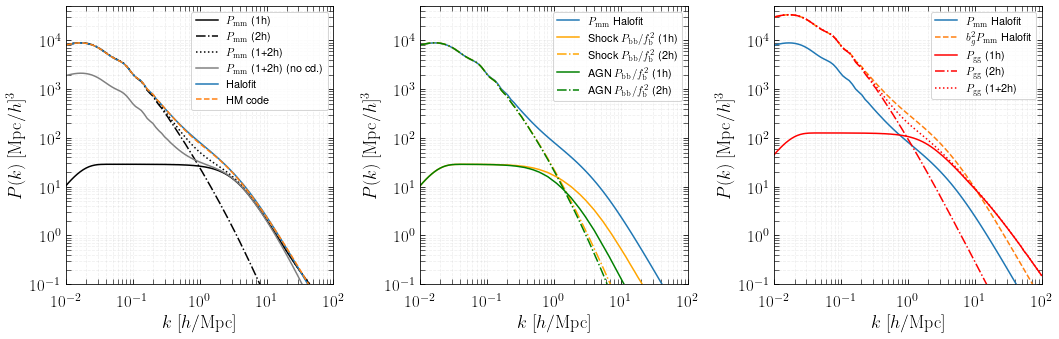

In [18]:
k_arr = np.geomspace(1e-3,5e1,100)

label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

z_arr = np.linspace(1e-8,4.,1000)
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r"$P(k)$    $[\mathrm{Mpc}/h]^3$",size=title_size)
ax.set_xlabel(r"$k$   $[h/\mathrm{Mpc}]$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-1,5e4)
ax.set_xlim(1e-2,1e2)

ax.plot(pk_at_z_hm['k'],pk_at_z_hm['1h'],label = '$P_\mathrm{mm}$ (1h)',c='k',ls='-')
ax.plot(pk_at_z_hm['k'],pk_at_z_hm['2h'],label = '$P_\mathrm{mm}$ (2h)',c='k',ls='-.')
ax.plot(pk_at_z_hm['k'],np.asarray(pk_at_z_hm['2h'])+np.asarray(pk_at_z_hm['1h']),label = '$P_\mathrm{mm}$ (1+2h)',c='k',ls=':')

ax.plot(pk_at_z_hm_no_consistency['k'],np.asarray(pk_at_z_hm_no_consistency['2h'])+np.asarray(pk_at_z_hm_no_consistency['1h']),label = '$P_\mathrm{mm}$ (1+2h) (no cd.)',c='grey',ls='-')



ax.plot(k_arr/M.h(),pk_at_z_class_halofit(k_arr,z_for_pk_hm)*M.h()**3.,label='Halofit')
ax.plot(k_arr/M.h(),pk_at_z_class_hmcode(k_arr,z_for_pk_hm)*M.h()**3.,label='HM code',ls='--')
# ax.plot(pk_gg_at_z_hm['k'],pk_gg_at_z_hm['1h'],label = 'pk_gg (1h)',c='r',ls='-')
# ax.plot(pk_gg_at_z_hm['k'],pk_gg_at_z_hm['2h'],label = 'pk_gg (2h)',c='r',ls='-.')
# ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['1h'])*M.get_f_b()**-2.,label = 'pk_bb/f_b^2 (1h)',c='g',ls='-')
# ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['2h'])*M.get_f_b()**-2.,label = 'pk_bb/f_b^2 (2h)',c='g',ls='-.')
ax.legend(fontsize=11)


ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r"$P(k)$    $[\mathrm{Mpc}/h]^3$",size=title_size)
ax.set_xlabel(r"$k$   $[h/\mathrm{Mpc}]$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-1,5e4)
ax.set_xlim(1e-2,1e2)

# ax.plot(pk_at_z_hm['k'],pk_at_z_hm['1h'],label = 'pk (1h)',c='k',ls='-')
# ax.plot(pk_at_z_hm['k'],pk_at_z_hm['2h'],label = 'pk (2h)',c='k',ls='-.')
ax.plot(k_arr/M.h(),pk_at_z_class_halofit(k_arr,z_for_pk_hm)*M.h()**3.,label='$P_\mathrm{mm}$ Halofit')
ax.plot(k_arr/M.h(),M.get_mean_galaxy_bias_at_z(z_for_pk_hm)**2.*pk_at_z_class_halofit(k_arr,z_for_pk_hm)*M.h()**3.,label='$b_g^2 P_\mathrm{mm}$ Halofit',ls='--')


# ax.plot(k_arr/M.h(),pk_at_z_class_hmcode(k_arr,z_for_pk_hm)*M.h()**3.,label='HM code')
ax.plot(pk_gg_at_z_hm['k'],pk_gg_at_z_hm['1h'],label = '$P_\mathrm{gg}$ (1h)',c='r',ls='-')
ax.plot(pk_gg_at_z_hm['k'],pk_gg_at_z_hm['2h'],label = '$P_\mathrm{gg}$ (2h)',c='r',ls='-.')
ax.plot(pk_gg_at_z_hm['k'],
        np.asarray(pk_gg_at_z_hm['1h'])+np.asarray(pk_gg_at_z_hm['2h']),
        label = '$P_\mathrm{gg}$ (1+2h)',c='r',ls=':')
# ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['1h'])*M.get_f_b()**-2.,label = 'pk_bb/f_b^2 (1h)',c='g',ls='-')
# ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['2h'])*M.get_f_b()**-2.,label = 'pk_bb/f_b^2 (2h)',c='g',ls='-.')
ax.legend(fontsize=11)


ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r"$P(k)$    $[\mathrm{Mpc}/h]^3$",size=title_size)
ax.set_xlabel(r"$k$   $[h/\mathrm{Mpc}]$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-1,5e4)
ax.set_xlim(1e-2,1e2)

# ax.plot(pk_at_z_hm['k'],pk_at_z_hm['1h'],label = 'pk (1h)',c='k',ls='-')
# ax.plot(pk_at_z_hm['k'],pk_at_z_hm['2h'],label = 'pk (2h)',c='k',ls='-.')
ax.plot(k_arr/M.h(),pk_at_z_class_halofit(k_arr,z_for_pk_hm)*M.h()**3.,label='$P_\mathrm{mm}$ Halofit')
# ax.plot(k_arr/M.h(),pk_at_z_class_hmcode(k_arr,z_for_pk_hm)*M.h()**3.,label='HM code')
# ax.plot(pk_gg_at_z_hm['k'],pk_gg_at_z_hm['1h'],label = 'pk_gg (1h)',c='r',ls='-')
# ax.plot(pk_gg_at_z_hm['k'],pk_gg_at_z_hm['2h'],label = 'pk_gg (2h)',c='r',ls='-.')
ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['1h'])*M.get_f_b()**-2.,label = 'Shock $P_\mathrm{bb}/f_\mathrm{b}^2$ (1h)',c='orange',ls='-')
ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['2h'])*M.get_f_b()**-2.,label = 'Shock $P_\mathrm{bb}/f_\mathrm{b}^2$ (2h)',c='orange',ls='-.')

ax.plot(pk_bb_at_z_hm_agn['k'],np.asarray(pk_bb_at_z_hm_agn['1h'])*M.get_f_b()**-2.,label = 'AGN $P_\mathrm{bb}/f_\mathrm{b}^2$ (1h)',c='g',ls='-')
ax.plot(pk_bb_at_z_hm_agn['k'],np.asarray(pk_bb_at_z_hm_agn['2h'])*M.get_f_b()**-2.,label = 'AGN $P_\mathrm{bb}/f_\mathrm{b}^2$ (2h)',c='g',ls='-.')


# ax.plot(pk_bb_at_z_hm_nfw['k'],np.asarray(pk_bb_at_z_hm_nfw['1h'])*M.get_f_b()**-2.,label = 'NFW $P_\mathrm{bb}/f_\mathrm{b}^2$ (1h)',c='pink',ls='-')
# ax.plot(pk_bb_at_z_hm_nfw['k'],np.asarray(pk_bb_at_z_hm_nfw['2h'])*M.get_f_b()**-2.,label = 'NFW $P_\mathrm{bb}/f_\mathrm{b}^2$ (2h)',c='pink',ls='-.')




ax.legend(fontsize=11,ncol=1)

fig.tight_layout()
plt.savefig('pks.pdf')

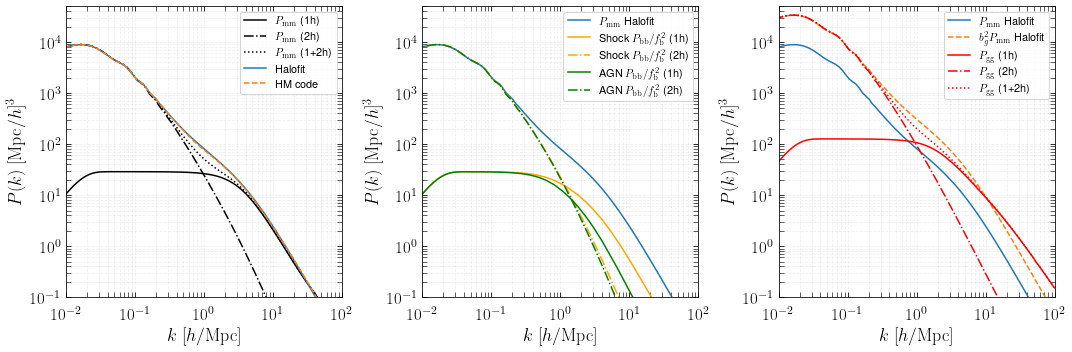

In [364]:
k_arr = np.geomspace(1e-3,5e1,100)

label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

z_arr = np.linspace(1e-8,4.,1000)
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r"$P(k)$    $[\mathrm{Mpc}/h]^3$",size=title_size)
ax.set_xlabel(r"$k$   $[h/\mathrm{Mpc}]$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-1,5e4)
ax.set_xlim(1e-2,1e2)

ax.plot(pk_at_z_hm['k'],pk_at_z_hm['1h'],label = '$P_\mathrm{mm}$ (1h)',c='k',ls='-')
ax.plot(pk_at_z_hm['k'],pk_at_z_hm['2h'],label = '$P_\mathrm{mm}$ (2h)',c='k',ls='-.')
ax.plot(pk_at_z_hm['k'],np.asarray(pk_at_z_hm['2h'])+np.asarray(pk_at_z_hm['1h']),label = '$P_\mathrm{mm}$ (1+2h)',c='k',ls=':')
ax.plot(k_arr/M.h(),pk_at_z_class_halofit(k_arr,z_for_pk_hm)*M.h()**3.,label='Halofit')
ax.plot(k_arr/M.h(),pk_at_z_class_hmcode(k_arr,z_for_pk_hm)*M.h()**3.,label='HM code',ls='--')
# ax.plot(pk_gg_at_z_hm['k'],pk_gg_at_z_hm['1h'],label = 'pk_gg (1h)',c='r',ls='-')
# ax.plot(pk_gg_at_z_hm['k'],pk_gg_at_z_hm['2h'],label = 'pk_gg (2h)',c='r',ls='-.')
# ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['1h'])*M.get_f_b()**-2.,label = 'pk_bb/f_b^2 (1h)',c='g',ls='-')
# ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['2h'])*M.get_f_b()**-2.,label = 'pk_bb/f_b^2 (2h)',c='g',ls='-.')
ax.legend(fontsize=11)


ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r"$P(k)$    $[\mathrm{Mpc}/h]^3$",size=title_size)
ax.set_xlabel(r"$k$   $[h/\mathrm{Mpc}]$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-1,5e4)
ax.set_xlim(1e-2,1e2)

# ax.plot(pk_at_z_hm['k'],pk_at_z_hm['1h'],label = 'pk (1h)',c='k',ls='-')
# ax.plot(pk_at_z_hm['k'],pk_at_z_hm['2h'],label = 'pk (2h)',c='k',ls='-.')
ax.plot(k_arr/M.h(),pk_at_z_class_halofit(k_arr,z_for_pk_hm)*M.h()**3.,label='$P_\mathrm{mm}$ Halofit')
ax.plot(k_arr/M.h(),M.get_mean_galaxy_bias_at_z(z_for_pk_hm)**2.*pk_at_z_class_halofit(k_arr,z_for_pk_hm)*M.h()**3.,label='$b_g^2 P_\mathrm{mm}$ Halofit',ls='--')
# ax.plot(k_arr/M.h(),pk_at_z_class_hmcode(k_arr,z_for_pk_hm)*M.h()**3.,label='HM code')
ax.plot(pk_gg_at_z_hm['k'],pk_gg_at_z_hm['1h'],label = '$P_\mathrm{gg}$ (1h)',c='r',ls='-')
ax.plot(pk_gg_at_z_hm['k'],pk_gg_at_z_hm['2h'],label = '$P_\mathrm{gg}$ (2h)',c='r',ls='-.')
ax.plot(pk_gg_at_z_hm['k'],
        np.asarray(pk_gg_at_z_hm['1h'])+np.asarray(pk_gg_at_z_hm['2h']),
        label = '$P_\mathrm{gg}$ (1+2h)',c='r',ls=':')
# ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['1h'])*M.get_f_b()**-2.,label = 'pk_bb/f_b^2 (1h)',c='g',ls='-')
# ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['2h'])*M.get_f_b()**-2.,label = 'pk_bb/f_b^2 (2h)',c='g',ls='-.')
ax.legend(fontsize=11)


ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r"$P(k)$    $[\mathrm{Mpc}/h]^3$",size=title_size)
ax.set_xlabel(r"$k$   $[h/\mathrm{Mpc}]$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-1,5e4)
ax.set_xlim(1e-2,1e2)

# ax.plot(pk_at_z_hm['k'],pk_at_z_hm['1h'],label = 'pk (1h)',c='k',ls='-')
# ax.plot(pk_at_z_hm['k'],pk_at_z_hm['2h'],label = 'pk (2h)',c='k',ls='-.')
ax.plot(k_arr/M.h(),pk_at_z_class_halofit(k_arr,z_for_pk_hm)*M.h()**3.,label='$P_\mathrm{mm}$ Halofit')
# ax.plot(k_arr/M.h(),pk_at_z_class_hmcode(k_arr,z_for_pk_hm)*M.h()**3.,label='HM code')
# ax.plot(pk_gg_at_z_hm['k'],pk_gg_at_z_hm['1h'],label = 'pk_gg (1h)',c='r',ls='-')
# ax.plot(pk_gg_at_z_hm['k'],pk_gg_at_z_hm['2h'],label = 'pk_gg (2h)',c='r',ls='-.')
ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['1h'])*M.get_f_b()**-2.,label = 'Shock $P_\mathrm{bb}/f_\mathrm{b}^2$ (1h)',c='orange',ls='-')
ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['2h'])*M.get_f_b()**-2.,label = 'Shock $P_\mathrm{bb}/f_\mathrm{b}^2$ (2h)',c='orange',ls='-.')

ax.plot(pk_bb_at_z_hm_agn['k'],np.asarray(pk_bb_at_z_hm_agn['1h'])*M.get_f_b()**-2.,label = 'AGN $P_\mathrm{bb}/f_\mathrm{b}^2$ (1h)',c='g',ls='-')
ax.plot(pk_bb_at_z_hm_agn['k'],np.asarray(pk_bb_at_z_hm_agn['2h'])*M.get_f_b()**-2.,label = 'AGN $P_\mathrm{bb}/f_\mathrm{b}^2$ (2h)',c='g',ls='-.')


# ax.plot(pk_bb_at_z_hm_nfw['k'],np.asarray(pk_bb_at_z_hm_nfw['1h'])*M.get_f_b()**-2.,label = 'NFW $P_\mathrm{bb}/f_\mathrm{b}^2$ (1h)',c='pink',ls='-')
# ax.plot(pk_bb_at_z_hm_nfw['k'],np.asarray(pk_bb_at_z_hm_nfw['2h'])*M.get_f_b()**-2.,label = 'NFW $P_\mathrm{bb}/f_\mathrm{b}^2$ (2h)',c='pink',ls='-.')




ax.legend(fontsize=11,ncol=1)

fig.tight_layout()
# plt.savefig('pks.pdf')

In [38]:
get_truncated_nfw_profile_at_z_k_rd_cd_xout = np.vectorize(M.get_truncated_nfw_profile_at_z_k_rd_cd_xout)

    

def get_truncated_nfw_profile_at_z_k_md_xout(z,k,md,xout):
    r200c = M.get_r_delta_of_m_delta_at_z(200,md,z)
    c200c = M.get_c200c_at_m_and_z_D08(md,z)
    return get_truncated_nfw_profile_at_z_k_rd_cd_xout(z,k,r200c,c200c,xout)

get_truncated_nfw_profile_at_z_k_md_xout = np.vectorize(get_truncated_nfw_profile_at_z_k_md_xout)

In [39]:
z = z_for_pk_hm
m200c = 3e14
r200c = M.get_r_delta_of_m_delta_at_z(200,m200c,z)
c200c = M.get_c200c_at_m_and_z_D08(m200c,z)
xout = 1.
get_truncated_nfw_profile_at_z_k_rd_cd_xout(z,1e1,r200c,c200c,xout)

array(0.05225824)

In [40]:
get_truncated_nfw_profile_at_z_k_md_xout(z,1e1,m200c,xout)

array(0.05225824)

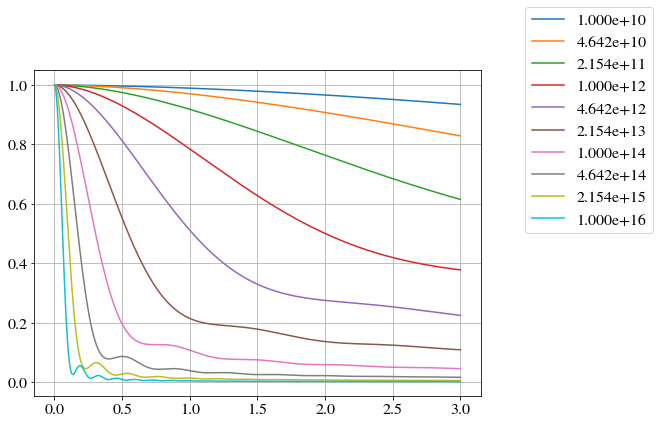

In [41]:
xout_arr = np.linspace(1e-3,3,1000)
for m200ca in np.geomspace(1e10,1e16,10):
    plt.plot(xout_arr,get_truncated_nfw_profile_at_z_k_md_xout(z,1e1,m200ca,xout_arr),label='%.3e'%m200ca)
plt.grid(which='both')
plt.legend(loc=(1.1,0.5))

In [42]:
get_ng_bar_at_z = np.vectorize(M.get_ng_bar_at_z)
get_volume = np.vectorize(M.get_volume_dVdzdOmega_at_z)
get_ng_bar_2nc_at_z = get_ng_bar_at_z
get_dNgdz_cat_blue = np.vectorize(M.get_galaxy_number_counts)

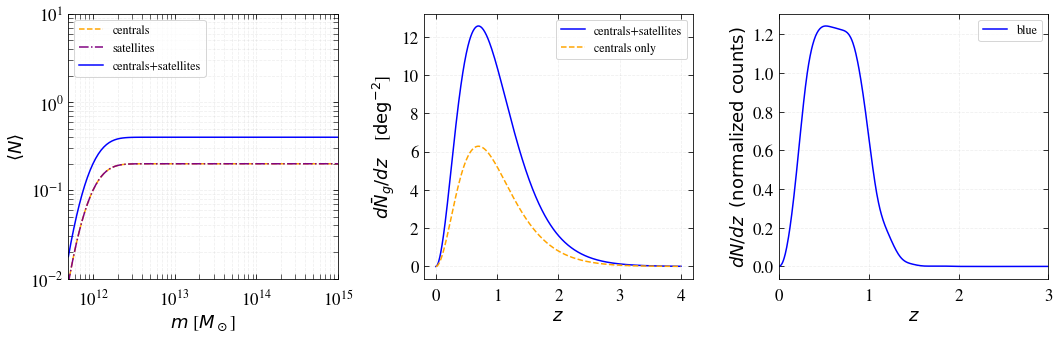

In [43]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

z_arr = np.linspace(1e-8,4.,1000)
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$\langle N\rangle$',size=title_size)
ax.set_xlabel(r'$m$ [$M_\odot$]',size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-2,1e1)
ax.set_xlim(5e11,1e15)
M_arr = np.geomspace(5e11,1e15,100)
get_N_centrals = np.vectorize(M.get_N_centrals)
Nc = get_N_centrals(0.,M_arr,1e12,0.25,0.2)
get_N_sats = np.vectorize(M.get_N_satellites)
Ns = get_N_sats(0.,M_arr,Nc,0.,0.,1e13)
ax.plot(M_arr,Nc,ls='--',c='orange',label='centrals')
ax.plot(M_arr,Ns,ls='-.',c='purple',label='satellites')
ax.plot(M_arr,Ns+Nc,ls='-',c='b',label='centrals+satellites')
ax.legend(loc=2,ncol = 1,frameon=True,fontsize=12)


ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$d\bar{N}_g/dz$    [$\mathrm{deg}^{-2}$]',size=title_size)
ax.set_xlabel(r'$z$',size=title_size)
ax.set_xscale('linear')
ax.set_yscale('linear')
# ax.set_ylim(1e0,2e3)
# ax.set_xlim(5e11,1e15)

ax.plot(z_arr,get_ng_bar_at_z(z_arr)*get_volume(z_arr)/3282.8,ls='-',c='blue',label='centrals+satellites')
ax.plot(z_arr,get_ng_bar_2nc_at_z(z_arr)*get_volume(z_arr)/3282.8/2.,ls='--',c='orange',label='centrals only')

ax.legend(loc=1,ncol = 1,frameon=True,fontsize=12)



ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$dN/dz$  $(\mathrm{normalized\,\,counts})$',size=title_size)
ax.set_xlabel(r'$z$',size=title_size)
ax.set_xscale('linear')
ax.set_yscale('linear')
# ax.set_ylim(1e0,2e3)
ax.set_xlim(0.,3.)

ax.plot(z_arr,get_dNgdz_cat_blue(z_arr),ls='-',c='blue',label='blue')
# ax.plot(z_arr,get_dNgdz_cat_green(z_arr),ls='--',c='green',label='green')


ax.legend(loc=1,ncol = 1,frameon=True,fontsize=12)
fig.tight_layout()
# plt.savefig('galaxies.pdf')




In [ ]:
dndM      = get_dndM_class_sz(z,M)
n_per_str = dV * dndM * M * dlnM / (4.*np.pi)   

In [44]:

get_dndlnM_at_z_and_M = np.vectorize(M.get_dndlnM_at_z_and_M)



In [45]:
get_dndlnM_at_z_and_M(0.5,3e14)

array(1.90433941e-06)

# Profiles

In [155]:
M = Class()
M.set(battaglia_16)
M.set({# class_sz parameters:
       'output':'tSZ_1h,m200m_to_m200c,m200c_to_m200m',
       'concentration parameter':'D08'
        })
M.compute()


def x200c_to_theta_arcmin(X):
    return M.get_rad_to_arcmin(r200c*X/M.get_dA(z))
def theta_arcmin_to_x200c(X):
    theta_rad = M.get_arcmin_to_rad(X)
    r = M.get_dA(z)*theta_rad
    return r/r200c

In [156]:
M.get_f_b()

0.17199999999999996

total mass of gas within $\lambda r_{200c}$ with $\lambda \in \mathbb{R}$

In [159]:
lambda_min = 0.1
lambda_max = 50
n_lambda = 100
lambda_array = np.geomspace(lambda_min,lambda_max,n_lambda)

In [160]:
# chose a mass and redshift for a given halo of interest
z = 0.5
m200m = 3e14
# convert to 200c for b16 profile
m200c = 3e14#M.get_m200m_to_m200c_at_z_and_M(z,m200m)
m200m = M.get_m200c_to_m200m_at_z_and_M(z,m200c)

In [161]:
# store the radial profiles of the gas
rho_gas_nfw = np.vectorize(M.get_gas_profile_at_x_M_z_nfw_200c)
rho_gas_b16 = np.vectorize(M.get_gas_profile_at_x_M_z_b16_200c)

# normalized radial array for b16:
x_200c = lambda_array

# dimensonfull radial array:
r200c = M.get_r_delta_of_m_delta_at_z(200,m200c,z)
r = x_200c*r200c
theta_arcmin = M.get_rad_to_arcmin(r/M.get_dA(z))

# normalized radial array for nfw:
r200m = M.get_r_delta_of_m_delta_at_z(200*M.Om_m(z),m200m,z)
c200m = M.get_c200m_at_m_and_z_D08(m200m,z)
c200c = M.get_c200c_at_m_and_z_D08(m200c,z)
rs_200m = r200m/c200m
xs_200m =  r/rs_200m
rs_200c = r200c/c200c
xs_200c=  r/rs_200c
# mass of b16 within \lambda*r_200c : M_b16(\lambda)
def M_b16(lambda_out,
          A_rho0=4.e3,
          A_alpha = 0.88,
          A_beta = 3.83,
          alpha_m_rho0 = 0.29,
          alpha_m_alpha = -0.03,
          alpha_m_beta = 0.04,
          alpha_z_rho0 = -0.66,
          alpha_z_alpha = 0.19,
          alpha_z_beta = -0.025,
          gamma = -0.2,
          xc = 0.5):
    #lambda_out = rout/r200c
    x_array = np.linspace(1e-8,lambda_out,1000)
    y = rho_gas_b16(x_array,m200c,z,
                    A_rho0=A_rho0,
                    A_alpha=A_alpha,
                    A_beta=A_beta,
                    alpha_m_rho0 = alpha_m_rho0,
                    alpha_m_alpha = alpha_m_alpha,
                    alpha_m_beta = alpha_m_beta,
                    alpha_z_rho0 = alpha_z_rho0,
                    alpha_z_alpha = alpha_z_alpha,
                    alpha_z_beta = alpha_z_beta,
                    gamma=gamma,
                    xc = xc)*x_array**2#/M.get_f_b()
    mass = 4.*np.pi*r200c**3*np.trapz(y,x=x_array)
    return mass
M_b16 = np.vectorize(M_b16) 

# mass of nfw within \lambda*r_200c : M_nfw(\lambda)
def M_nfw(lambda_out):
    #lambda_out = rout/r200c
    rout = lambda_out*r200c
    lambda_out_200c = rout/rs_200c
    x_array = np.linspace(1e-8,lambda_out_200c,1000)
    y = rho_gas_nfw(x_array,m200c,z)*x_array**2
    mass = 4.*np.pi*rs_200c**3*np.trapz(y,x=x_array)#/M.get_f_b()
    return mass
M_nfw = np.vectorize(M_nfw) 
    

def A_rho0_norm(A_rho0=1.,
                A_alpha = 0.88,
                A_beta = 3.83,
                alpha_m_rho0 = 0.29,
                alpha_m_alpha = -0.03,
                alpha_m_beta = 0.04,
                alpha_z_rho0 = -0.66,
                alpha_z_alpha = 0.19,
                alpha_z_beta = -0.025,
                gamma = -0.2,
                xc = 0.5):
    return M_nfw(1.)/M_b16(1.,A_rho0=1.,
                              A_alpha=A_alpha,
                              A_beta=A_beta,
                              alpha_m_rho0 = alpha_m_rho0,
                              alpha_m_alpha = alpha_m_alpha,
                              alpha_m_beta = alpha_m_beta,
                              alpha_z_rho0 = alpha_z_rho0,
                              alpha_z_alpha = alpha_z_alpha,
                              alpha_z_beta = alpha_z_beta,
                              gamma=gamma,
                              xc = xc)

In [162]:
M_nfw(1.)

array(5.15999349e+13)

In [163]:
print('%.3e'%m200c)
print('%.3e'%r200c)
print('%.3e'%r200m)

3.000e+14
9.320e-01
1.247e+00


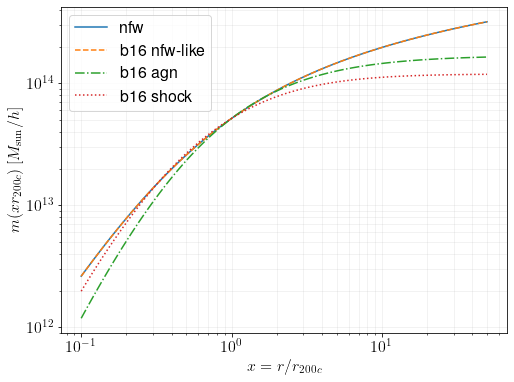

In [164]:
# normalization of b16 such that b16 and nfw have same mass within 1*r200c:
plt.plot(lambda_array,M_nfw(lambda_array),label='nfw')
rhos_over_rhocz = 1./3.*200.*c200c**3.*(np.log(1.+c200c)-c200c/(1.+c200c))**-1.

# nfw like
A_rho0=10.
A_alpha = 1.#rhos_over_rhocz
A_beta = 3.
alpha_m_rho0 = 0.
alpha_m_alpha = 0.
alpha_m_beta = 0.
alpha_z_rho0 = 0.
alpha_z_alpha = 0.
alpha_z_beta = 0.
gamma = -1.
xc = 1./c200c
plt.plot(lambda_array,M_b16(lambda_array,
                            A_rho0=A_rho0_norm(A_rho0=A_rho0,
                                               A_alpha=A_alpha,
                                               A_beta=A_beta,
                                               alpha_m_rho0 = alpha_m_rho0,
                                               alpha_m_alpha = alpha_m_alpha,
                                               alpha_m_beta = alpha_m_beta,
                                               alpha_z_rho0 = alpha_z_rho0,
                                               alpha_z_alpha = alpha_z_alpha,
                                               alpha_z_beta = alpha_z_beta,
                                               gamma = gamma,
                                               xc = xc
                                               ),
                            A_alpha=A_alpha,
                            A_beta=A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc
                           ),
         label='b16 nfw-like',ls='--')

A_rho0 = 4.e3
A_alpha = 0.88
A_beta = 3.83

alpha_m_rho0 = 0.29
alpha_m_alpha = -0.03
alpha_m_beta = 0.04

alpha_z_rho0 = -0.66
alpha_z_alpha = 0.19
alpha_z_beta = -0.025
gamma = -0.2
xc = 0.5
plt.plot(lambda_array,M_b16(lambda_array,
                            A_rho0=A_rho0_norm(A_rho0=A_rho0,
                                               A_alpha=A_alpha,
                                               A_beta=A_beta,
                                               alpha_m_rho0 = alpha_m_rho0,
                                               alpha_m_alpha = alpha_m_alpha,
                                               alpha_m_beta = alpha_m_beta,
                                               alpha_z_rho0 = alpha_z_rho0,
                                               alpha_z_alpha = alpha_z_alpha,
                                               alpha_z_beta = alpha_z_beta,
                                               gamma = gamma,
                                               xc = xc
                                               ),
                            A_alpha=A_alpha,
                            A_beta=A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc
                           ),
         label='b16 agn',ls='-.')

A_rho0 = 1.9e4
A_alpha = 0.70
A_beta = 4.43

alpha_m_rho0 = 0.09
alpha_m_alpha = -0.017
alpha_m_beta = 0.005

alpha_z_rho0 = -0.95
alpha_z_alpha = 0.27
alpha_z_beta = 0.037
gamma = -0.2
xc = 0.5
plt.plot(lambda_array,M_b16(lambda_array,
                            A_rho0=A_rho0_norm(A_rho0=A_rho0,
                                               A_alpha=A_alpha,
                                               A_beta=A_beta,
                                               alpha_m_rho0 = alpha_m_rho0,
                                               alpha_m_alpha = alpha_m_alpha,
                                               alpha_m_beta = alpha_m_beta,
                                               alpha_z_rho0 = alpha_z_rho0,
                                               alpha_z_alpha = alpha_z_alpha,
                                               alpha_z_beta = alpha_z_beta,
                                               gamma = gamma,
                                               xc = xc
                                               ),
                            A_alpha=A_alpha,
                            A_beta=A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc
                           ),
         label='b16 shock',ls=':')


plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$m(x r_{200c})$   $[M_\mathrm{sun}/h]$')
plt.xlabel(r'$x=r/r_{200c}$')
plt.legend()
plt.grid(which='both',alpha=0.2)

(0.1, 10.0)

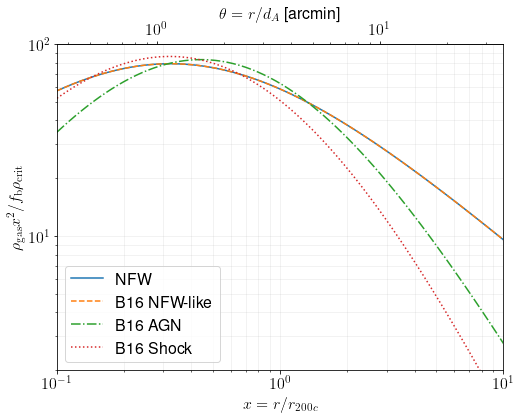

In [165]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


rho_norm_nfw = rho_gas_nfw(xs_200c,m200c,z)/M.get_rho_crit_at_z(z)/M.get_f_b()
ax1.plot(x_200c,rho_norm_nfw*x_200c**2,label = 'NFW')


rhos_over_rhocz = 1./3.*200.*c200c**3.*(np.log(1.+c200c)-c200c/(1.+c200c))**-1.
A_rho0 = 1.
A_alpha = 1.#rhos_over_rhocz
A_beta = 3.
alpha_m_rho0 = 0.
alpha_m_alpha = 0.
alpha_m_beta = 0.
alpha_z_rho0 = 0.
alpha_z_alpha = 0.
alpha_z_beta = 0.
gamma = -1.
xc = 1./c200c

# # gammas = [-0.1,-0.2,-0.3]
# gammas = [-1.]

rho_norm_b16 = rho_gas_b16(x_200c,
                           m200c,
                           z,
                           A_rho0=A_rho0_norm(
                                            A_rho0=A_rho0,
                                            A_alpha=A_alpha,
                                            A_beta=A_beta,
                                            alpha_m_rho0 = alpha_m_rho0,
                                            alpha_m_alpha = alpha_m_alpha,
                                            alpha_m_beta = alpha_m_beta,
                                            alpha_z_rho0 = alpha_z_rho0,
                                            alpha_z_alpha = alpha_z_alpha,
                                            alpha_z_beta = alpha_z_beta,
                                            gamma=gamma,
                                            xc = xc
                                             ),
#                                 A_rho0=rhos_over_rhocz,
                            A_alpha = A_alpha,
                            A_beta = A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc)/M.get_rho_crit_at_z(z)/M.get_f_b()
ax1.plot(x_200c,rho_norm_b16*x_200c**2, label = r'B16 NFW-like',ls='--')

A_rho0 = 4.e3
A_alpha = 0.88
A_beta = 3.83

alpha_m_rho0 = 0.29
alpha_m_alpha = -0.03
alpha_m_beta = 0.04

alpha_z_rho0 = -0.66
alpha_z_alpha = 0.19
alpha_z_beta = -0.025
gamma = -0.2
xc = 0.5

rho_norm_b16 = rho_gas_b16(x_200c,
                           m200c,
                           z,
                           A_rho0=A_rho0_norm(
                                            A_rho0=A_rho0,
                                            A_alpha=A_alpha,
                                            A_beta=A_beta,
                                            alpha_m_rho0 = alpha_m_rho0,
                                            alpha_m_alpha = alpha_m_alpha,
                                            alpha_m_beta = alpha_m_beta,
                                            alpha_z_rho0 = alpha_z_rho0,
                                            alpha_z_alpha = alpha_z_alpha,
                                            alpha_z_beta = alpha_z_beta,
                                            gamma=gamma,
                                            xc = xc
                                             ),
#                                 A_rho0=rhos_over_rhocz,
                            A_alpha = A_alpha,
                            A_beta = A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc)/M.get_rho_crit_at_z(z)/M.get_f_b()
ax1.plot(x_200c,rho_norm_b16*x_200c**2, label = r'B16 AGN',ls='-.')


A_rho0 = 1.9e4
A_alpha = 0.70
A_beta = 4.43

alpha_m_rho0 = 0.09
alpha_m_alpha = -0.017
alpha_m_beta = 0.005

alpha_z_rho0 = -0.95
alpha_z_alpha = 0.27
alpha_z_beta = 0.037
gamma = -0.2
xc = 0.5

rho_norm_b16 = rho_gas_b16(x_200c,
                           m200c,
                           z,
                           A_rho0=A_rho0_norm(
                                            A_rho0=A_rho0,
                                            A_alpha=A_alpha,
                                            A_beta=A_beta,
                                            alpha_m_rho0 = alpha_m_rho0,
                                            alpha_m_alpha = alpha_m_alpha,
                                            alpha_m_beta = alpha_m_beta,
                                            alpha_z_rho0 = alpha_z_rho0,
                                            alpha_z_alpha = alpha_z_alpha,
                                            alpha_z_beta = alpha_z_beta,
                                            gamma=gamma,
                                            xc = xc
                                             ),
#                                 A_rho0=rhos_over_rhocz,
                            A_alpha = A_alpha,
                            A_beta = A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc)/M.get_rho_crit_at_z(z)/M.get_f_b()
ax1.plot(x_200c,rho_norm_b16*x_200c**2, label = r'B16 Shock',ls=':')



ax1.loglog()
ax1.legend()
ax1.set_xlabel(r'$x=r/r_{200c}$')
ax1.set_ylabel(r'$\rho_\mathrm{gas}x^2/f_\mathrm{b}\rho_\mathrm{crit}$')

plt.grid(which='both',alpha=0.2)
secax = ax1.secondary_xaxis('top', functions=(x200c_to_theta_arcmin, theta_arcmin_to_x200c))

secax.set_xlabel(r'$\theta = r/d_A$ [arcmin]')
ax1.set_ylim(2,1e2)
ax1.set_xlim(1e-1,1e1)




In [166]:
x200c_to_theta_arcmin(1.)

3.571439245653709

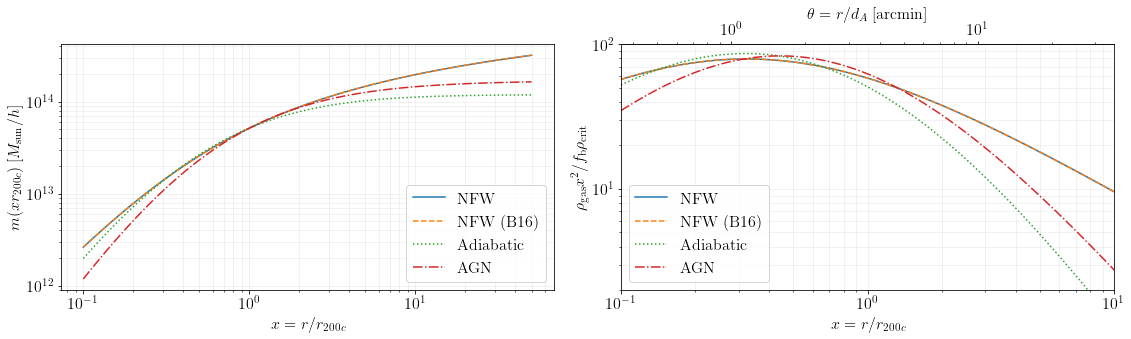

In [172]:
# normalization of b16 such that b16 and nfw have same mass within 1*r200c:

label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,5))


ax = ax1

ax.plot(lambda_array,M_nfw(lambda_array),label = r'$\mathrm{NFW}$')
rhos_over_rhocz = 1./3.*200.*c200c**3.*(np.log(1.+c200c)-c200c/(1.+c200c))**-1.

# nfw like
A_rho0=10.
A_alpha = 1.#rhos_over_rhocz
A_beta = 3.
alpha_m_rho0 = 0.
alpha_m_alpha = 0.
alpha_m_beta = 0.
alpha_z_rho0 = 0.
alpha_z_alpha = 0.
alpha_z_beta = 0.
gamma = -1.
xc = 1./c200c
ax.plot(lambda_array,M_b16(lambda_array,
                            A_rho0=A_rho0_norm(A_rho0=A_rho0,
                                               A_alpha=A_alpha,
                                               A_beta=A_beta,
                                               alpha_m_rho0 = alpha_m_rho0,
                                               alpha_m_alpha = alpha_m_alpha,
                                               alpha_m_beta = alpha_m_beta,
                                               alpha_z_rho0 = alpha_z_rho0,
                                               alpha_z_alpha = alpha_z_alpha,
                                               alpha_z_beta = alpha_z_beta,
                                               gamma = gamma,
                                               xc = xc
                                               ),
                            A_alpha=A_alpha,
                            A_beta=A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc
                           ),
         label = r'$\mathrm{NFW}\,\,\mathrm{(B16)}$',ls='--')

A_rho0 = 1.9e4
A_alpha = 0.70
A_beta = 4.43

alpha_m_rho0 = 0.09
alpha_m_alpha = -0.017
alpha_m_beta = 0.005

alpha_z_rho0 = -0.95
alpha_z_alpha = 0.27
alpha_z_beta = 0.037
gamma = -0.2
xc = 0.5
ax.plot(lambda_array,M_b16(lambda_array,
                            A_rho0=A_rho0_norm(A_rho0=A_rho0,
                                               A_alpha=A_alpha,
                                               A_beta=A_beta,
                                               alpha_m_rho0 = alpha_m_rho0,
                                               alpha_m_alpha = alpha_m_alpha,
                                               alpha_m_beta = alpha_m_beta,
                                               alpha_z_rho0 = alpha_z_rho0,
                                               alpha_z_alpha = alpha_z_alpha,
                                               alpha_z_beta = alpha_z_beta,
                                               gamma = gamma,
                                               xc = xc
                                               ),
                            A_alpha=A_alpha,
                            A_beta=A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc
                           ),
         label = r'$\mathrm{Adiabatic}$',ls=':')



A_rho0 = 4.e3
A_alpha = 0.88
A_beta = 3.83

alpha_m_rho0 = 0.29
alpha_m_alpha = -0.03
alpha_m_beta = 0.04

alpha_z_rho0 = -0.66
alpha_z_alpha = 0.19
alpha_z_beta = -0.025
gamma = -0.2
xc = 0.5
ax.plot(lambda_array,M_b16(lambda_array,
                            A_rho0=A_rho0_norm(A_rho0=A_rho0,
                                               A_alpha=A_alpha,
                                               A_beta=A_beta,
                                               alpha_m_rho0 = alpha_m_rho0,
                                               alpha_m_alpha = alpha_m_alpha,
                                               alpha_m_beta = alpha_m_beta,
                                               alpha_z_rho0 = alpha_z_rho0,
                                               alpha_z_alpha = alpha_z_alpha,
                                               alpha_z_beta = alpha_z_beta,
                                               gamma = gamma,
                                               xc = xc
                                               ),
                            A_alpha=A_alpha,
                            A_beta=A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc
                           ),
         label = r'$\mathrm{AGN}$',ls='-.')




ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$m(x r_{200c})$   $[M_\mathrm{sun}/h]$')
ax.set_xlabel(r'$x=r/r_{200c}$')
ax.legend()
ax.grid(which='both',alpha=0.2)


ax = ax2
rho_norm_nfw = rho_gas_nfw(xs_200c,m200c,z)/M.get_rho_crit_at_z(z)/M.get_f_b()
ax.plot(x_200c,rho_norm_nfw*x_200c**2,label = r'$\mathrm{NFW}$')


rhos_over_rhocz = 1./3.*200.*c200c**3.*(np.log(1.+c200c)-c200c/(1.+c200c))**-1.
A_rho0 = 1.
A_alpha = 1.#rhos_over_rhocz
A_beta = 3.
alpha_m_rho0 = 0.
alpha_m_alpha = 0.
alpha_m_beta = 0.
alpha_z_rho0 = 0.
alpha_z_alpha = 0.
alpha_z_beta = 0.
gamma = -1.
xc = 1./c200c

# # gammas = [-0.1,-0.2,-0.3]
# gammas = [-1.]

rho_norm_b16 = rho_gas_b16(x_200c,
                           m200c,
                           z,
                           A_rho0=A_rho0_norm(
                                            A_rho0=A_rho0,
                                            A_alpha=A_alpha,
                                            A_beta=A_beta,
                                            alpha_m_rho0 = alpha_m_rho0,
                                            alpha_m_alpha = alpha_m_alpha,
                                            alpha_m_beta = alpha_m_beta,
                                            alpha_z_rho0 = alpha_z_rho0,
                                            alpha_z_alpha = alpha_z_alpha,
                                            alpha_z_beta = alpha_z_beta,
                                            gamma=gamma,
                                            xc = xc
                                             ),
#                                 A_rho0=rhos_over_rhocz,
                            A_alpha = A_alpha,
                            A_beta = A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc)/M.get_rho_crit_at_z(z)/M.get_f_b()
ax.plot(x_200c,rho_norm_b16*x_200c**2, label = r'$\mathrm{NFW\,\,(B16)}$',ls='--')

A_rho0 = 1.9e4
A_alpha = 0.70
A_beta = 4.43

alpha_m_rho0 = 0.09
alpha_m_alpha = -0.017
alpha_m_beta = 0.005

alpha_z_rho0 = -0.95
alpha_z_alpha = 0.27
alpha_z_beta = 0.037
gamma = -0.2
xc = 0.5

rho_norm_b16 = rho_gas_b16(x_200c,
                           m200c,
                           z,
                           A_rho0=A_rho0_norm(
                                            A_rho0=A_rho0,
                                            A_alpha=A_alpha,
                                            A_beta=A_beta,
                                            alpha_m_rho0 = alpha_m_rho0,
                                            alpha_m_alpha = alpha_m_alpha,
                                            alpha_m_beta = alpha_m_beta,
                                            alpha_z_rho0 = alpha_z_rho0,
                                            alpha_z_alpha = alpha_z_alpha,
                                            alpha_z_beta = alpha_z_beta,
                                            gamma=gamma,
                                            xc = xc
                                             ),
#                                 A_rho0=rhos_over_rhocz,
                            A_alpha = A_alpha,
                            A_beta = A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc)/M.get_rho_crit_at_z(z)/M.get_f_b()
ax.plot(x_200c,rho_norm_b16*x_200c**2, label = r'$\mathrm{Adiabatic}$',ls=':')




A_rho0 = 4.e3
A_alpha = 0.88
A_beta = 3.83

alpha_m_rho0 = 0.29
alpha_m_alpha = -0.03
alpha_m_beta = 0.04

alpha_z_rho0 = -0.66
alpha_z_alpha = 0.19
alpha_z_beta = -0.025
gamma = -0.2
xc = 0.5

rho_norm_b16 = rho_gas_b16(x_200c,
                           m200c,
                           z,
                           A_rho0=A_rho0_norm(
                                            A_rho0=A_rho0,
                                            A_alpha=A_alpha,
                                            A_beta=A_beta,
                                            alpha_m_rho0 = alpha_m_rho0,
                                            alpha_m_alpha = alpha_m_alpha,
                                            alpha_m_beta = alpha_m_beta,
                                            alpha_z_rho0 = alpha_z_rho0,
                                            alpha_z_alpha = alpha_z_alpha,
                                            alpha_z_beta = alpha_z_beta,
                                            gamma=gamma,
                                            xc = xc
                                             ),
#                                 A_rho0=rhos_over_rhocz,
                            A_alpha = A_alpha,
                            A_beta = A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc)/M.get_rho_crit_at_z(z)/M.get_f_b()
ax.plot(x_200c,rho_norm_b16*x_200c**2, label = r'$\mathrm{AGN}$',ls='-.')





ax.loglog()
ax.legend()
ax.set_xlabel(r'$x=r/r_{200c}$')
ax.set_ylabel(r'$\rho_\mathrm{gas}x^2/f_\mathrm{b}\rho_\mathrm{crit}$')

ax.grid(which='both',alpha=0.2)
secax = ax.secondary_xaxis('top', functions=(x200c_to_theta_arcmin, theta_arcmin_to_x200c))

secax.set_xlabel(r'$\theta = r/d_A$ $\mathrm{[arcmin]}$')
ax.set_ylim(2,1e2)
ax.set_xlim(1e-1,1e1)

fig.tight_layout()
plt.savefig('gas_profiles.pdf')


# CMB with tSZ (class_sz) and kSZ (battaglia template)


In [4]:
# ksz power spectrum is the simple formula 1 of https://arxiv.org/pdf/1607.01769.pdf
M = Class()
M.set(ksz_params)
M.set({# class_sz parameters:
       'output':'tCl,lCl,tSZ_1h,tSZ_2h,kSZ_kSZ_1h,kSZ_kSZ_2h',
        'modes':'s',
        'lensing': 'yes',
        'l_max_scalars':10000,
       'pressure profile': 'A10',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'concentration parameter': 'B13',  # B13: Bhattacharya et al 2013  
    
       'ell_max' : 10000,
       'ell_min' : 2,
       'z_min': 1e-8,
       'z_max': 4.,
       'M_min':1e10, # all masses in Msun/h
       'M_max':5e15,
       'B': 1.7, #hydrostatic equilibrium bias (1-b)^-1
       'units for tSZ spectrum': 'muK2',
       'Frequency for y-distortion in GHz': 150.
        })
        
M.compute()

# M.struct_cleanup()
# M.empty()

In [30]:
path_to_noise_curves = path_to_files+'/noise_curves/'
nl_so_goal_l, nl_so_goal_nl_std_ilc, nl_so_goal_nl_cilc_tsz, nl_so_goal_nl_cilc_cib, nl_so_goal_nl_cilc_tszcib = np.loadtxt(path_to_noise_curves + 'SO_LAT_Nell_T_atmv1_goal_fsky0p4_ILC_CMB.txt',unpack=True)
nl_advact_l, nl_advact_nl_tt, nl_advact_nl_yy = np.loadtxt(path_to_noise_curves + 'AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',unpack=True)
nl_s4_l, nl_s4_nl_tt, nl_s4_nl_yy = np.loadtxt(path_to_noise_curves +'S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',unpack=True)

In [31]:
nl_advact_l

array([  40.,   41.,   42., ..., 7977., 7978., 7979.])

/var/folders/_q/j04c9lw93j75_c_z2jdfbtwm0000gn/T/ipykernel_14423/1747691377.py:22: RuntimeWarning: overflow encountered in exp
  Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))*(M.T_cmb()*1e6)**-2.


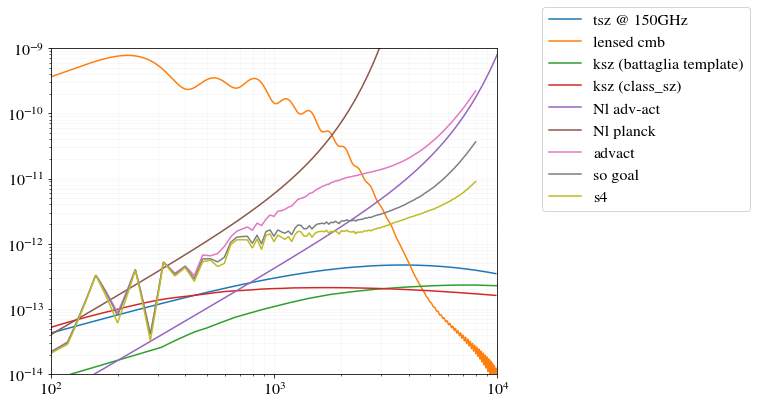

In [7]:
cl_sz = M.cl_sz()
cl_ksz = M.cl_ksz()
plt.plot(cl_sz['ell'],(np.asarray(cl_sz['1h'])+np.asarray(cl_sz['2h']))*(M.T_cmb()*1e6)**-2.,label='tsz @ 150GHz')

plt.plot(M.lensed_cl()['ell'],M.lensed_cl()['ell']*(M.lensed_cl()['ell']+1.)/2./np.pi*M.lensed_cl()['tt'],label='lensed cmb')
l_bat,dl_bat = np.loadtxt(path_to_files+'/cl_ksz_bat.dat',unpack=True)
plt.plot(l_bat,dl_bat*(M.T_cmb()*1e6)**-2.,label='ksz (battaglia template)')
plt.plot(cl_ksz['ell'],np.asarray(cl_ksz['1h'])+np.asarray(cl_ksz['2h']),label='ksz (class_sz)')

l_arr = np.geomspace(1e2,5e4,100)
arcmin_to_radians = np.pi/(60.*180.)


DeltaT = 15.*arcmin_to_radians
ThetaFWHM = 1.4*arcmin_to_radians
Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))*(M.T_cmb()*1e6)**-2.
plt.loglog(l_arr,l_arr*(l_arr+1.)*Nl/2./np.pi,label='Nl adv-act')


DeltaT = 47.*arcmin_to_radians
ThetaFWHM = 5.*arcmin_to_radians
Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))*(M.T_cmb()*1e6)**-2.
plt.loglog(l_arr,l_arr*(l_arr+1.)*Nl/2./np.pi,label='Nl planck')


plt.plot(nl_advact_l,nl_advact_l*(nl_advact_l+1.)/2./np.pi*nl_advact_nl_tt*(M.T_cmb()*1e6)**-2.,label='advact')
plt.plot(nl_so_goal_l,nl_so_goal_l*(nl_so_goal_l+1.)/2./np.pi*nl_so_goal_nl_std_ilc*(M.T_cmb()*1e6)**-2.,label='so goal')
plt.plot(nl_s4_l,nl_s4_l*(nl_s4_l+1.)/2./np.pi*nl_s4_nl_tt*(M.T_cmb()*1e6)**-2.,label='s4')




plt.loglog()
plt.legend(loc=(1.1,0.5))
plt.ylim(1e-14,1e-9)
plt.xlim(1e2,1e4)
plt.grid(which='both',alpha=0.1)

# HOD and galaxy distributions

In [173]:
M = Class()
M.set(ksz_params)
M.set({'output':'gal_gal_1h'})
M.compute()

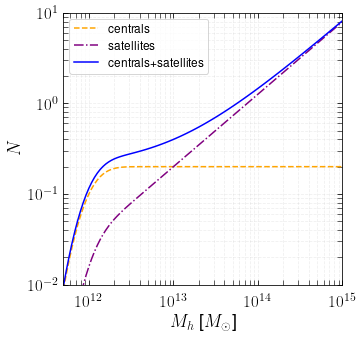

In [174]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$N$',size=title_size)
ax.set_xlabel(r'$M_h$ [$M_\odot$]',size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-2,1e1)
ax.set_xlim(5e11,1e15)
M_arr = np.geomspace(5e11,1e15,100)
get_N_centrals = np.vectorize(M.get_N_centrals)
Nc = get_N_centrals(0.,M_arr,1e12,0.25,0.2)
get_N_sats = np.vectorize(M.get_N_satellites)
Ns = get_N_sats(0.,M_arr,Nc,0.,0.8,1e13)
ax.plot(M_arr,Nc,ls='--',c='orange',label='centrals')
ax.plot(M_arr,Ns,ls='-.',c='purple',label='satellites')
ax.plot(M_arr,Ns+Nc,ls='-',c='b',label='centrals+satellites')
ax.legend(loc=2,ncol = 1,frameon=True,fontsize=12)
#plt.savefig('HOD_fig1_2106.08438.pdf')

In [175]:
M = Class()
M.set(ksz_params)
M.set({'output':'gal_gal_1h'
      })
M.compute()
get_ng_bar_at_z = np.vectorize(M.get_ng_bar_at_z)
get_volume = np.vectorize(M.get_volume_dVdzdOmega_at_z)
M = Class()
M.set(ksz_params)
M.set({'output':'gal_gal_1h',
       'alpha_s_HOD' : 0.
      })
M.compute()
get_ng_bar_2nc_at_z = np.vectorize(M.get_ng_bar_at_z)

In [176]:
z_arr = np.linspace(1e-8,4.,1000)

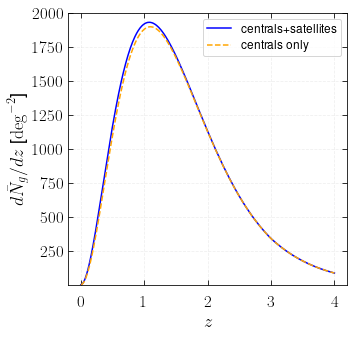

In [177]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$d\bar{N}_g/dz$    [$\mathrm{deg}^{-2}$]',size=title_size)
ax.set_xlabel(r'$z$',size=title_size)
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_ylim(1e0,2e3)
# ax.set_xlim(5e11,1e15)

ax.plot(z_arr,get_ng_bar_at_z(z_arr)*get_volume(z_arr)/3282.8,ls='-',c='blue',label='centrals+satellites')
ax.plot(z_arr,get_ng_bar_2nc_at_z(z_arr)*get_volume(z_arr)/3282.8/2.,ls='--',c='orange',label='centrals only')

ax.legend(loc=1,ncol = 1,frameon=True,fontsize=12)
#plt.savefig('HOD_fig1_2106.08438.pdf')


In [178]:
M = Class()
M.set(ksz_params)
M.set({'output':'gal_gal_1h',
       'galaxy_sample' : 'unwise',
       'galaxy_sample_id' : 'blue'
})
M.compute()
get_dNgdz_cat_blue = np.vectorize(M.get_galaxy_number_counts)
M = Class()
M.set(ksz_params)
M.set({'output':'gal_gal_1h',
       'galaxy_sample' : 'unwise',
       'galaxy_sample_id' : 'green'
})
M.compute()
get_dNgdz_cat_green = np.vectorize(M.get_galaxy_number_counts)

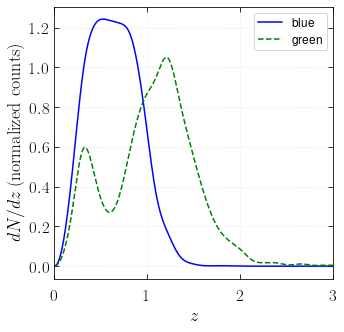

In [179]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$dN/dz$  $(\mathrm{normalized\,\,counts})$',size=title_size)
ax.set_xlabel(r'$z$',size=title_size)
ax.set_xscale('linear')
ax.set_yscale('linear')
# ax.set_ylim(1e0,2e3)
ax.set_xlim(0.,3.)

ax.plot(z_arr,get_dNgdz_cat_blue(z_arr),ls='-',c='blue',label='blue')
ax.plot(z_arr,get_dNgdz_cat_green(z_arr),ls='--',c='green',label='green')


ax.legend(loc=1,ncol = 1,frameon=True,fontsize=12)
#plt.savefig('HOD_fig1_2106.08438.pdf')



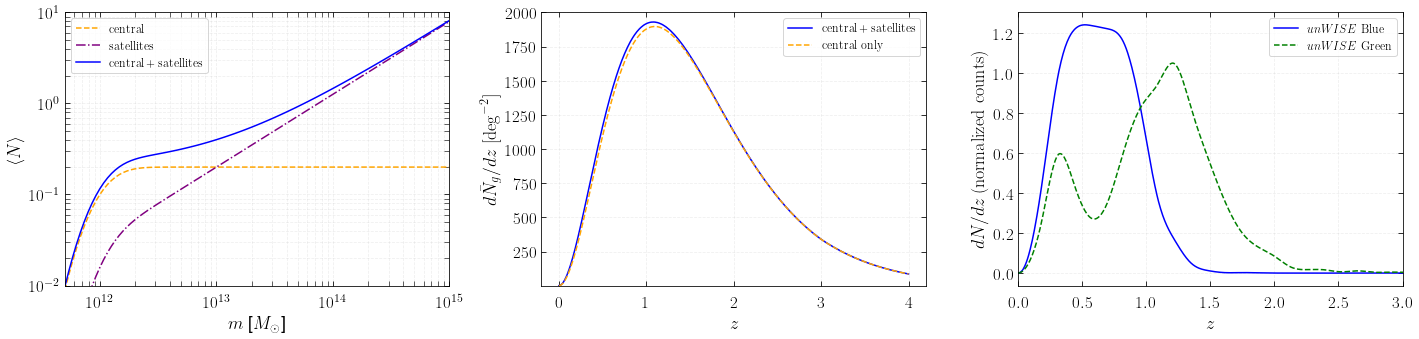

In [186]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))


ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$\langle N\rangle$',size=title_size)
ax.set_xlabel(r'$m$ [$M_\odot$]',size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-2,1e1)
ax.set_xlim(5e11,1e15)
M_arr = np.geomspace(5e11,1e15,100)
get_N_centrals = np.vectorize(M.get_N_centrals)
Nc = get_N_centrals(0.,M_arr,1e12,0.25,0.2)
get_N_sats = np.vectorize(M.get_N_satellites)
Ns = get_N_sats(0.,M_arr,Nc,0.,0.8,1e13)
ax.plot(M_arr,Nc,ls='--',c='orange',label=r'$\mathrm{central}$')
ax.plot(M_arr,Ns,ls='-.',c='purple',label=r'$\mathrm{satellites}$')
ax.plot(M_arr,Ns+Nc,ls='-',c='b',label=r'$\mathrm{central+satellites}$')
ax.legend(loc=2,ncol = 1,frameon=True,fontsize=12)


ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$d\bar{N}_g/dz$    $[\mathrm{deg}^{-2}]$',size=title_size)
ax.set_xlabel(r'$z$',size=title_size)
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_ylim(1e0,2e3)
# ax.set_xlim(5e11,1e15)

ax.plot(z_arr,get_ng_bar_at_z(z_arr)*get_volume(z_arr)/3282.8,ls='-',c='blue',label=r'$\mathrm{central+satellites}$')
ax.plot(z_arr,get_ng_bar_2nc_at_z(z_arr)*get_volume(z_arr)/3282.8/2.,ls='--',c='orange',label=r'$\mathrm{central\,\,only}$')

ax.legend(loc=1,ncol = 1,frameon=True,fontsize=12)



ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$dN/dz$  $(\mathrm{normalized\,\,counts})$',size=title_size)
ax.set_xlabel(r'$z$',size=title_size)
ax.set_xscale('linear')
ax.set_yscale('linear')
# ax.set_ylim(1e0,2e3)
ax.set_xlim(0.,3.)

ax.plot(z_arr,get_dNgdz_cat_blue(z_arr),ls='-',c='blue',label=r'$unWISE\,\,\mathrm{Blue}$')
ax.plot(z_arr,get_dNgdz_cat_green(z_arr),ls='--',c='green',label=r'$unWISE\,\,\mathrm{Green}$')


ax.legend(loc=1,ncol = 1,frameon=True,fontsize=12)
fig.tight_layout()
plt.savefig('galaxies.pdf')



# Computing projected field ksz^2 x g

In [10]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-2
param_list = ['f_b_gas','A_alpha','A_beta']
param_fiducial_values = [0.15,0.88,3.83]

fac = 1.

In [11]:
M = Class()
M.set(ksz_params)
for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]})
M.compute()
cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_g()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_g()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_g()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 91.0220 seconds
computed in 92.0390 seconds
computed in 98.3812 seconds


[]

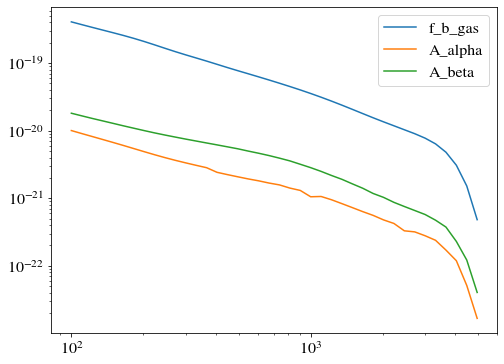

In [12]:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend()
plt.loglog()

[]

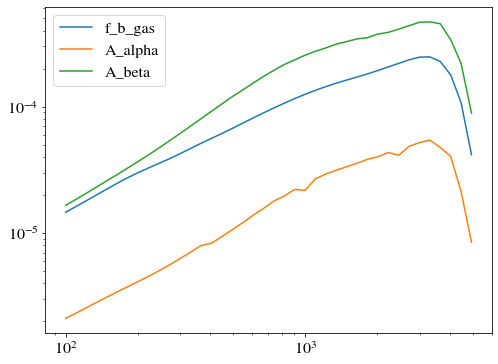

In [13]:
for i in range(len(param_list)):
    plt.plot(ell_array,np.fabs(dl_kSZ_kSZ_g_tot_plus[i]-dl_kSZ_kSZ_g_tot_minus[i]),label=param_list[i])

plt.legend()
plt.loglog()

In [15]:
# data covariance matrix
fac_cov = 1.
covmat_data = fac_cov*np.diag((np.sqrt(2./(2.*np.asarray(ell_array)+1.))*(np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])))**2.)


inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)


In [3]:
import numpy as np
np.sqrt(6.04236e-43)

7.773261863593687e-22

In [4]:
np.sqrt(1.22271e-42)

1.1057621805795312e-21

In [16]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)   


[0.00387586 0.11983074 0.05978225]


In [17]:
4.46204918e+02/4.e3

0.1115512295

In [18]:
np.save('planck_unwise_ttg_221121.npy',inverse_fisher_F)

GetDist Version: 1.3.1, Matplotlib version: 3.4.2


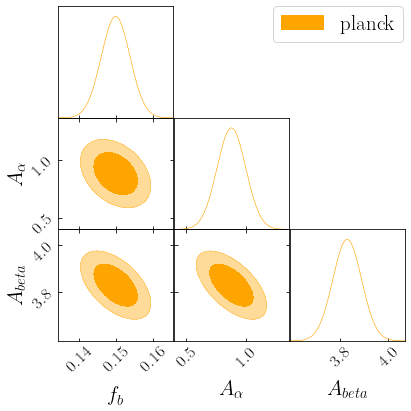

In [19]:
# plot ellipses
inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')
# inverse_fisher_F_advact = np.load('advact_ttg_211121.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
labels = [r'f_b', r'A_{\alpha}', 'A_{beta}']

# Current method
matrix1 = GaussianND(mean, inverse_fisher_F_planck, labels = labels, names = names)
# matrix2 = GaussianND(mean, inverse_fisher_F_advact, labels = labels, names = names)

# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = True
g.settings.legend_fontsize = 24
g.settings.axes_labelsize = 24
g.settings.axes_fontsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_y_rotation = 45
g.settings.alpha_filled_add = 0.9
g.settings.title_limit_fontsize = 1

g.triangle_plot([matrix1], 
                names,
            filled = True,
            legend_labels = ['planck','advact'], 
            contour_colors = ['orange','green'])

# Save triplot
#g.export('output_example.png')

$\beta$

# Computing projected field ksz^2 x g

In [42]:
M = Class()
M.set(ksz_params)
M.set({'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.,
'dell': 300.,
'ell_max' : 15000.0,
'ell_min' : 100.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'agn',
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 68.4585 seconds


In [43]:
M = Class()
M.set(ksz_params)
M.set({'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.,
'dell': 300.,
'ell_max' : 15000.0,
'ell_min' : 100.0,
'f_sky':0.3, # 0.3 for ACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'shock',
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_shock = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()



M = Class()
M.set(ksz_params)
M.set({'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.,
'dell': 300.,
'ell_max' : 15000.0,
'ell_min' : 100.0,
'f_sky':0.3, # 0.3 for ACT, 0.4 for SO and S4
'gas profile' : 'nfw',
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_nfw = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 58.5492 seconds
computed in 60.0137 seconds


Text(0.5, 1.0, 'agn')

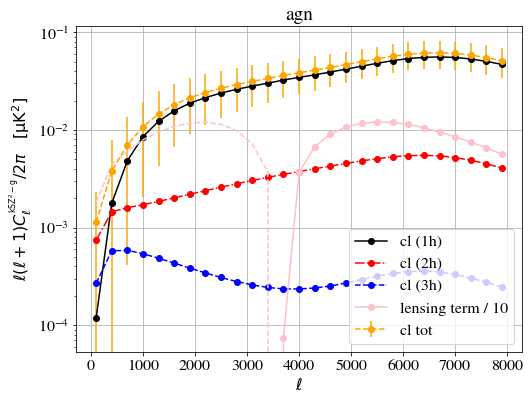

In [8]:
cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = 'cl (1h)',c='k',ls='-',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = 'cl (2h)',c='r',ls='-.',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = 'cl (3h)',c='b',ls='--',marker = 'o')

# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'cl (hf)',c='orange',ls='--',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')



plt.errorbar(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         label = 'cl tot',
             c='orange',ls='--',marker = 'o')

plt.yscale('log')
plt.xscale('linear')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$")
plt.grid()
plt.legend()
plt.title('agn')
# plt.savefig('/Users/boris/Desktop/test_ksz_pf.

Text(0.5, 1.0, 'agn')

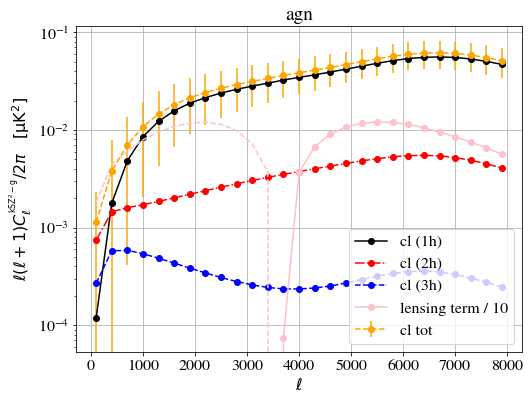

In [9]:
cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = 'cl (1h)',c='k',ls='-',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = 'cl (2h)',c='r',ls='-.',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = 'cl (3h)',c='b',ls='--',marker = 'o')

# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'cl (hf)',c='orange',ls='--',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')



plt.errorbar(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         label = 'cl tot',
             c='orange',ls='--',marker = 'o')

plt.yscale('log')
plt.xscale('linear')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$")
plt.grid()
plt.legend()
plt.title('agn')
# plt.savefig('/Users/boris/Desktop/test_ksz_pf.

Text(0.5, 1.0, 'shock')

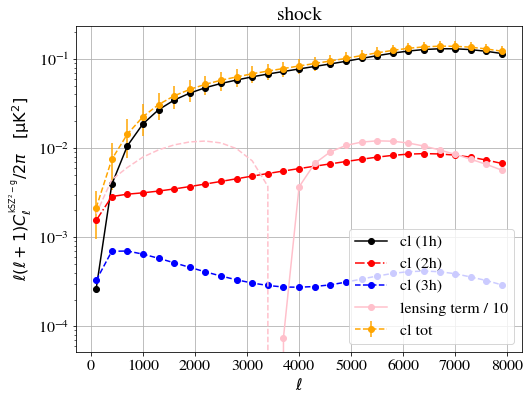

In [10]:
cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_shock.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = 'cl (1h)',c='k',ls='-',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = 'cl (2h)',c='r',ls='-.',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = 'cl (3h)',c='b',ls='--',marker = 'o')

# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'cl (hf)',c='orange',ls='--',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')



plt.errorbar(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         label = 'cl tot',
             c='orange',ls='--',marker = 'o')

plt.yscale('log')
plt.xscale('linear')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$")
plt.grid()
plt.legend()
plt.title('shock')
# plt.savefig('/Users/boris/Desktop/test_ksz_pf.

Text(0.5, 1.0, 'nfw')

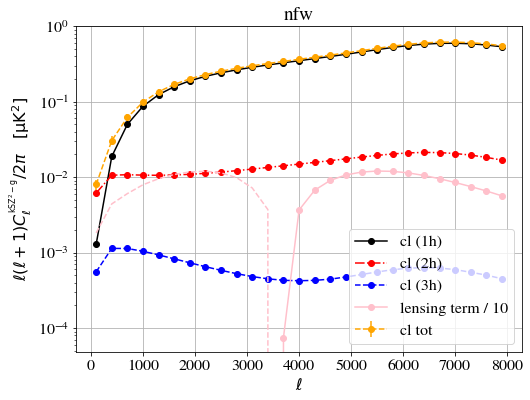

In [11]:
cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_nfw.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = 'cl (1h)',c='k',ls='-',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = 'cl (2h)',c='r',ls='-.',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = 'cl (3h)',c='b',ls='--',marker = 'o')

# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'cl (hf)',c='orange',ls='--',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')



plt.errorbar(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         label = 'cl tot',
             c='orange',ls='--',marker = 'o')

plt.yscale('log')
plt.xscale('linear')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$")
plt.grid()
plt.legend()
plt.title('nfw')
# plt.savefig('/Users/boris/Desktop/test_ksz_pf.

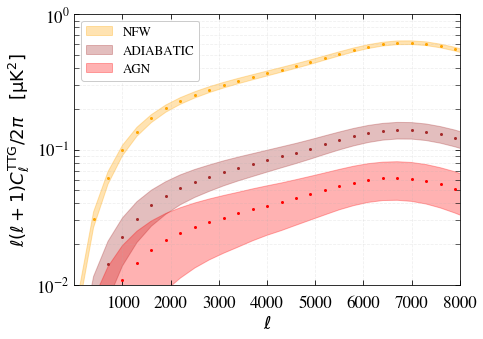

In [47]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_nfw.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
plt.errorbar(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         label = 'NFW',
             c='orange',ls='None',marker = 'o',markersize=2)

plt.fill_between(cl_kSZ_kSZ_g['ell'],
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               color='orange',
                 label = 'NFW',
               alpha=0.3)

# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = 'cl (1h)',c='k',ls='-',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = 'cl (2h)',c='r',ls='-.',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = 'cl (3h)',c='b',ls='--',marker = 'o')

# # plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'cl (hf)',c='orange',ls='--',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')



cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_shock.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
plt.plot(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         #label = 'SHOCK',
             c='brown',ls='None',marker = 'o',markersize=2)

plt.fill_between(cl_kSZ_kSZ_g['ell'],
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               color='brown',
                 label = 'ADIABATIC',
               alpha=0.3)



cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
plt.errorbar(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         #label = 'AGN',
             c='red',ls='None',marker = 'o',markersize=2)

plt.fill_between(cl_kSZ_kSZ_g['ell'],
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               color='red',
                 label = 'AGN',
               alpha=0.3)





plt.yscale('log')
plt.xscale('linear')
plt.xlabel(r"$\ell$")
# plt.ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$")
ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{TTG}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)
# plt.grid(which='both',alpha=0.3)
plt.ylim(1e-2,1)
plt.xlim(2.,8e3)
# plt.legend(loc=2)
# ax.axvspan(8e3, 18e3, alpha=0.1, color='grey',hatch="//")
# ax.axvspan(8e3, 18e3, alpha=0.1, color='None',edgecolor='grey',hatch="//")
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2]
# plt.text(0.63,0.65,s='Noise dominated',rotation=90, transform=ax.transAxes,fontsize=14,c='k',alpha=0.7)
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc=2,framealpha=1,fontsize=13)
# plt.title('nfw')
fig.tight_layout()
plt.savefig('/Users/boris/Desktop/ksz_sum_8e3.pdf')

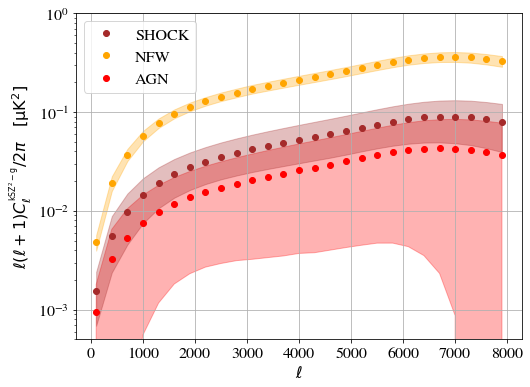

In [29]:
cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_nfw.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
plt.errorbar(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         label = 'NFW',
             c='orange',ls='None',marker = 'o')

plt.fill_between(cl_kSZ_kSZ_g['ell'],
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               color='orange',
               alpha=0.3)



cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
plt.errorbar(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         label = 'AGN',
             c='red',ls='None',marker = 'o')

plt.fill_between(cl_kSZ_kSZ_g['ell'],
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               color='red',
               alpha=0.3)




cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_shock.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
plt.plot(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         label = 'SHOCK',
             c='brown',ls='None',marker = 'o')

plt.fill_between(cl_kSZ_kSZ_g['ell'],
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               color='brown',
               alpha=0.3)



plt.yscale('log')
plt.xscale('linear')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$")
plt.grid()
plt.ylim(5e-4,1)
plt.legend(loc=2)
# plt.title('nfw')
# plt.savefig('/Users/boris/Desktop/test_ksz_pf.

In [36]:
# signal-to-noise calculation:
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])
snrl = cl_tot/np.sqrt(covll)
                   
np.sum(snrl)

/var/folders/_q/j04c9lw93j75_c_z2jdfbtwm0000gn/T/ipykernel_2919/3144656684.py:4: RuntimeWarning: invalid value encountered in sqrt
  snrl = cl_tot/np.sqrt(covll)


nan

In [37]:
covll

array([ 2.26969288e-36,  1.68574735e-36,  1.25575488e-36,  9.38904841e-37,
        7.03160402e-37,  5.24692379e-37,  3.87262114e-37,  2.81109774e-37,
        2.00728716e-37,  1.42187691e-37,  1.01210894e-37,  7.28474634e-38,
        5.26294590e-38,  3.76008751e-38,  2.64367343e-38,  1.85265431e-38,
        1.30655251e-38,  9.17888283e-39,  6.37584859e-39,  4.41346465e-39,
        3.03620843e-39,  2.06698494e-39,  1.39643071e-39,  9.34370853e-40,
        6.17836212e-40,  4.04273813e-40,  2.61903362e-40,  1.68477350e-40,
        1.07911768e-40,  6.89235988e-41,  4.40916561e-41,  2.83760134e-41,
        1.82960859e-41,  1.18152680e-41,  7.64416662e-42,  4.85397162e-42,
        2.91526016e-42,  1.57719022e-42,  6.94714479e-43,  2.11566572e-43,
        3.07693627e-44, -7.92396739e-47, -1.85003551e-47, -4.61322830e-48,
       -1.14623192e-48, -3.30509138e-49, -1.28987491e-49, -2.62616456e-50,
        6.39265810e-51,  6.78695950e-52, -4.87676993e-51])

In [10]:
# signal-to-noise calculation:
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])
snrl = cl_tot/np.sqrt(covll)
                   
np.sum(snrl)

252.77055029443756

In [18]:
cl_tot

array([7.84038276e-20, 1.72494630e-20, 9.13716082e-21, 6.33418109e-21,
       4.82663834e-21, 3.87899409e-21, 3.20091171e-21, 2.69986359e-21,
       2.31813147e-21, 2.02803318e-21, 1.79516979e-21, 1.61430341e-21,
       1.46908056e-21, 1.35510352e-21, 1.25338849e-21, 1.17704841e-21,
       1.11533590e-21, 1.06482811e-21, 1.02348898e-21, 9.82568436e-22,
       9.35454873e-22, 8.78143893e-22, 8.10580569e-22, 7.35263845e-22,
       6.54822352e-22, 5.72712601e-22, 4.94982860e-22])

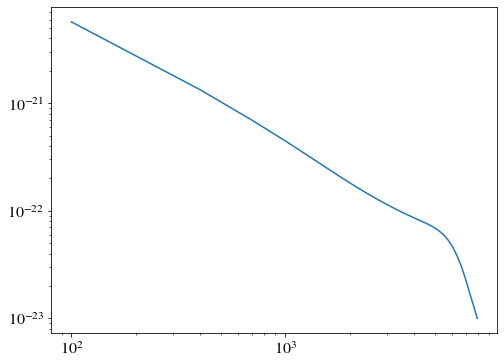

In [21]:
plt.loglog(cl_kSZ_kSZ_g['ell'],np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])))

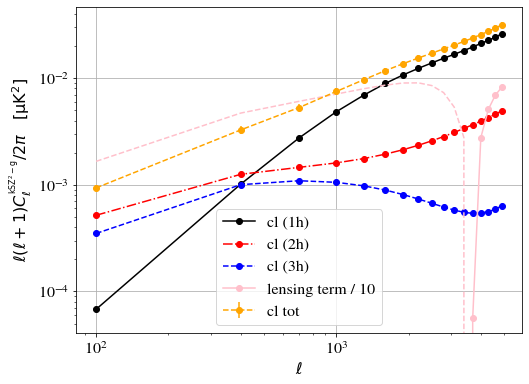

In [9]:

fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = 'cl (1h)',c='k',ls='-',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = 'cl (2h)',c='r',ls='-.',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = 'cl (3h)',c='b',ls='--',marker = 'o')

# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'cl (hf)',c='orange',ls='--',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')




# l_arr = np.asarray(cl_kSZ_kSZ_g['ell'])#np.geomspace(1e2,1e4,100)
# arcmin_to_radians = np.pi/(60.*180.)
# DeltaT = 10.*arcmin_to_radians
# ThetaFWHM = 1.4*arcmin_to_radians
# Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))
# plt.loglog(l_arr,Nl)

plt.errorbar(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         label = 'cl tot',
             c='orange',ls='--',marker = 'o')
plt.loglog()
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$")
plt.grid()
plt.legend()
# plt.savefig('/Users/boris/Desktop/test_ksz_pf.

In [51]:
cl_kSZ_kSZ_g['ell']

[100.0,
 400.0,
 700.0,
 1000.0,
 1300.0,
 1600.0,
 1900.0,
 2200.0,
 2500.0,
 2800.0,
 3100.0,
 3400.0,
 3700.0,
 4000.0,
 4300.0,
 4600.0,
 4900.0]

# Noise power spectrum

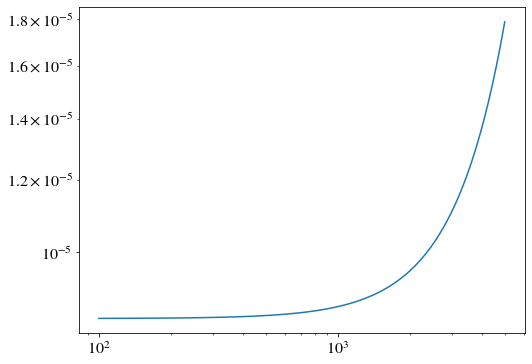

In [43]:
l_arr = np.geomspace(1e2,5e3,100)
arcmin_to_radians = np.pi/(60.*180.)
DeltaT = 10.*arcmin_to_radians
ThetaFWHM = 1.4*arcmin_to_radians
Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))
plt.loglog(l_arr,Nl)

# Computing  matter bispectrum B(k1,k2,k3) - equilateral

In [7]:
zz = 1.
M_min = 1e8
M = Class()
params = planck_2015
M.set(params)
M.set({
    'mass function' : 'T10',
    'M_min': M_min,
    'M_max': 1e16,
    'hm_consistency':1,
    'output': 'bk_at_z_1h,bk_at_z_2h,bk_at_z_3h,bk_at_z_hf',
    'non linear': 'halofit',


    'P_k_max_h/Mpc' : 30.,
    'k_per_decade_for_pk' : 50,

    'k_min_for_pk_class_sz' : 1E-3,
    'k_max_for_pk_class_sz' : 20.,
    'k_per_decade_class_sz' : 50.,
    "dlnk_for_pk_hm" : 0.01,
    "z_for_pk_hm" : zz,
    "k_min_for_pk_hm" : 1e-4,
    "k_max_for_pk_hm" : 2e1,
})
M.compute()
bk_at_z_hm = M.bk_at_z_hm()





In [8]:
z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Qk1_smoothed = []
Qk1_SC = []
Bk1_SC = []
Bk1_GM = []
Qk1_TL = []
Qk1 = []
Bk1_TL = []
Q3n = []
nlk1 = []
nlk1_no_wiggles = []
pk_linear = []
pk_halofit = []
for k1 in k1_a:
  n = M.get_nl_index_at_z_and_k(z,k1)
  n_no_wiggles = M.get_nl_index_at_z_and_k_no_wiggles(z,k1)
  nlk1.append(n)
  nlk1_no_wiggles.append(n_no_wiggles)
  Q3n.append(4.-2.**n/(1.+2**(n+1.)))
  k2 = k1
  #mu = np.cos(0.6*np.pi)
  k3 = k1#np.sqrt(k1**2+k2**2+2*k1*k2*mu)
    
  # Note the conversions between Mpc to Mpc/h
  pk1 = M.pk_nonlin(k1*h,z)*h**3
  pk_halofit.append(pk1)
  pk2 = M.pk_nonlin(k2*h,z)*h**3
  pk3 = M.pk_nonlin(k3*h,z)*h**3
  pk1lin = M.pk_lin(k1*h,z)*h**3
  pk_linear.append(pk1lin)
  pk2lin = M.pk_lin(k2*h,z)*h**3
  pk3lin = M.pk_lin(k3*h,z)*h**3

  Qk1_TL.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z)/(pk1lin*pk2lin + pk2lin*pk3lin + pk3lin*pk1lin))
  Bk1_TL.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))
  Qk1_SC.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Bk1_SC.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z))
  Qk1.append(M.get_matter_bispectrum_at_z_effective_approach(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Qk1_smoothed.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Bk1_GM.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z))



Text(0.5, 1.0, 'M_min = 1.00e+08 Msun/h at z=1.00')

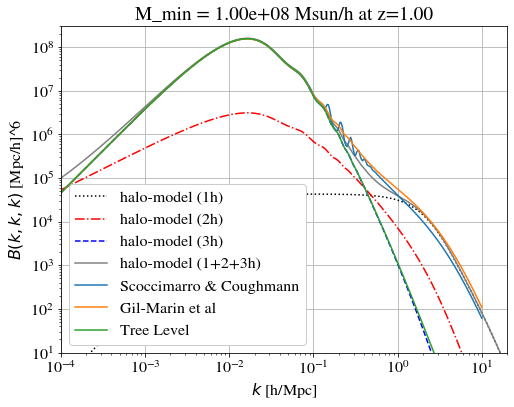

In [9]:
plt.plot(bk_at_z_hm['k'],bk_at_z_hm['1h'],label = 'halo-model (1h)',c='k',ls=':')
plt.plot(bk_at_z_hm['k'],bk_at_z_hm['2h'],label = 'halo-model (2h)',c='r',ls='-.')
plt.plot(bk_at_z_hm['k'],bk_at_z_hm['3h'],label = 'halo-model (3h)',c='b',ls='--')
plt.plot(bk_at_z_hm['k'],np.asarray(bk_at_z_hm['1h'])+np.asarray(bk_at_z_hm['2h'])+np.asarray(bk_at_z_hm['3h']),label = 'halo-model (1+2+3h)',c='grey',ls='-')
# plt.plot(k1_a,np.asarray(Qk1),label='Q(k1) Gil-Marin',alpha=0.2)
# plt.plot(k1_a,np.asarray(Qk1_smoothed),label='Q(k1) Gil-Marin smoothed',c='r',lw=2.)
# plt.plot(k1_a,np.asarray(Qk1_SC),label='Q(k1) SC',alpha=0.2)

plt.plot(k1_a,np.asarray(Bk1_SC),label='Scoccimarro & Coughmann',alpha=1.)
plt.plot(k1_a,np.asarray(Bk1_GM),label='Gil-Marin et al',alpha=1.)
plt.plot(k1_a,np.asarray(Bk1_TL),label='Tree Level',alpha=1.)
plt.loglog()
plt.xlabel(r"$k$ [h/Mpc]")
plt.ylabel(r"$B(k,k,k)$ [Mpc/h]^6")
plt.ylim(1e1,3e8)
plt.xlim(1e-4,2e1)
plt.grid()
plt.legend(loc=3,frameon=True,framealpha=1)
plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
# plt.savefig('bk_z1_wct_Mmin1e8.pdf')

# Computing  matter bispectrum B(k1,k2,k3) - squeezed

In [23]:
lambda2 = 1.
lambda3 = 0.01

In [24]:
zz = 1.
M_min = 1e8
M = Class()
params = planck_2015
M.set(params)
M.set({
    'mass function' : 'T10',
    'M_min': M_min,
    'M_max': 1e16,
    'hm_consistency':1,
    'output': 'bk_at_z_1h,bk_at_z_2h,bk_at_z_3h,bk_at_z_hf',
    'non linear': 'halofit',


    'P_k_max_h/Mpc' : 30.,
    'k_per_decade_for_pk' : 50,

    'k_min_for_pk_class_sz' : 1E-3,
    'k_max_for_pk_class_sz' : 20.,
    'k_per_decade_class_sz' : 50.,
    "dlnk_for_pk_hm" : 0.01,
    "z_for_pk_hm" : zz,
    "k_min_for_pk_hm" : 1e-4,
    "k_max_for_pk_hm" : 2e1,
    "bispectrum_lambda_2" : lambda2,
    "bispectrum_lambda_3" : lambda3
})
M.compute()
bk_at_z_hm = M.bk_at_z_hm()





In [25]:
z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Qk1_smoothed = []
Qk1_SC = []
Bk1_SC = []
Bk1_GM = []
Qk1_TL = []
Qk1 = []
Bk1_TL = []
Q3n = []
nlk1 = []
nlk1_no_wiggles = []
pk_linear = []
pk_halofit = []
for k1 in k1_a:
  n = M.get_nl_index_at_z_and_k(z,k1)
  n_no_wiggles = M.get_nl_index_at_z_and_k_no_wiggles(z,k1)
  nlk1.append(n)
  nlk1_no_wiggles.append(n_no_wiggles)
  Q3n.append(4.-2.**n/(1.+2**(n+1.)))
  k2 = lambda2*k1
  #mu = np.cos(0.6*np.pi)
  k3 = lambda3*k1#np.sqrt(k1**2+k2**2+2*k1*k2*mu)
    
  # Note the conversions between Mpc to Mpc/h
  pk1 = M.pk_nonlin(k1*h,z)*h**3
  pk_halofit.append(pk1)
  pk2 = M.pk_nonlin(k2*h,z)*h**3
  pk3 = M.pk_nonlin(k3*h,z)*h**3
  pk1lin = M.pk_lin(k1*h,z)*h**3
  pk_linear.append(pk1lin)
  pk2lin = M.pk_lin(k2*h,z)*h**3
  pk3lin = M.pk_lin(k3*h,z)*h**3

  Qk1_TL.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z)/(pk1lin*pk2lin + pk2lin*pk3lin + pk3lin*pk1lin))
  Bk1_TL.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))
  Qk1_SC.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Bk1_SC.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z))
  Qk1.append(M.get_matter_bispectrum_at_z_effective_approach(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Qk1_smoothed.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Bk1_GM.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z))


    

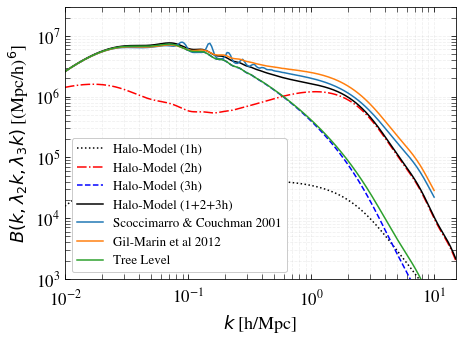

In [48]:


label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
# ax.set_xlabel(r'$\ell$',size=title_size)
# ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)
ax.set_xlabel(r"$k$ [h/Mpc]",size=title_size)
ax.set_ylabel(r"$B(k,\lambda_2 k,\lambda_3 k)$ [(Mpc/h)$^6$]",size=title_size)

plt.plot(bk_at_z_hm['k'],bk_at_z_hm['1h'],label = 'Halo-Model (1h)',c='k',ls=':')
plt.plot(bk_at_z_hm['k'],bk_at_z_hm['2h'],label = 'Halo-Model (2h)',c='r',ls='-.')
plt.plot(bk_at_z_hm['k'],bk_at_z_hm['3h'],label = 'Halo-Model (3h)',c='b',ls='--')
plt.plot(bk_at_z_hm['k'],np.asarray(bk_at_z_hm['1h'])+(1.-np.exp(-np.power(np.asarray(bk_at_z_hm['k'])/1e-1,2.)))*np.asarray(bk_at_z_hm['2h'])+np.asarray(bk_at_z_hm['3h']),label = 'Halo-Model (1+2+3h)',c='k',ls='-')
# plt.plot(k1_a,np.asarray(Qk1),label='Q(k1) Gil-Marin',alpha=0.2)
# plt.plot(k1_a,np.asarray(Qk1_smoothed),label='Q(k1) Gil-Marin smoothed',c='r',lw=2.)
# plt.plot(k1_a,np.asarray(Qk1_SC),label='Q(k1) SC',alpha=0.2)

plt.plot(k1_a,np.asarray(Bk1_SC),label='Scoccimarro & Couchman 2001',alpha=1.)
plt.plot(k1_a,np.asarray(Bk1_GM),label='Gil-Marin et al 2012',alpha=1.)
plt.plot(k1_a,np.asarray(Bk1_TL),label='Tree Level',alpha=1.)
plt.loglog()
# plt.xlabel(r"$k$ [h/Mpc]")
# plt.ylabel(r"$B(k,\lambda_2 k,\lambda_3 k)$ [Mpc/h]^6")
plt.ylim(1e3,3e7)
plt.xlim(1e-2,1.5e1)
# plt.grid()
plt.legend(loc=3,frameon=True,framealpha=1,fontsize=13)
# plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
plt.savefig('bk_z1_wct_Mmin1e8_fin.pdf')

Text(0.5, 1.0, 'M_min = 1.00e+08 Msun/h at z=1.00')

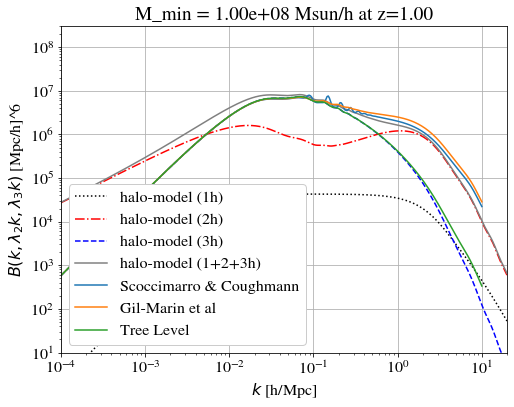

In [13]:
plt.plot(bk_at_z_hm['k'],bk_at_z_hm['1h'],label = 'halo-model (1h)',c='k',ls=':')
plt.plot(bk_at_z_hm['k'],bk_at_z_hm['2h'],label = 'halo-model (2h)',c='r',ls='-.')
plt.plot(bk_at_z_hm['k'],bk_at_z_hm['3h'],label = 'halo-model (3h)',c='b',ls='--')
plt.plot(bk_at_z_hm['k'],np.asarray(bk_at_z_hm['1h'])+np.asarray(bk_at_z_hm['2h'])+np.asarray(bk_at_z_hm['3h']),label = 'halo-model (1+2+3h)',c='grey',ls='-')
# plt.plot(k1_a,np.asarray(Qk1),label='Q(k1) Gil-Marin',alpha=0.2)
# plt.plot(k1_a,np.asarray(Qk1_smoothed),label='Q(k1) Gil-Marin smoothed',c='r',lw=2.)
# plt.plot(k1_a,np.asarray(Qk1_SC),label='Q(k1) SC',alpha=0.2)

plt.plot(k1_a,np.asarray(Bk1_SC),label='Scoccimarro & Coughmann',alpha=1.)
plt.plot(k1_a,np.asarray(Bk1_GM),label='Gil-Marin et al',alpha=1.)
plt.plot(k1_a,np.asarray(Bk1_TL),label='Tree Level',alpha=1.)
plt.loglog()
plt.xlabel(r"$k$ [h/Mpc]")
plt.ylabel(r"$B(k,\lambda_2 k,\lambda_3 k)$ [Mpc/h]^6")
plt.ylim(1e1,3e8)
plt.xlim(1e-4,2e1)
plt.grid()
plt.legend(loc=3,frameon=True,framealpha=1)
plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
# plt.savefig('bk_z1_wct_Mmin1e8.pdf')

# Computing  matter bispectrum B(k1,k2,k3) - flattened

In [28]:
lambda2 = 0.5
lambda3 = 0.5

In [29]:
zz = 1.
M_min = 1e8
M = Class()
params = planck_2015
M.set(params)
M.set({
    'mass function' : 'T10',
    'M_min': M_min,
    'M_max': 1e16,
    'hm_consistency':1,
    'output': 'bk_at_z_1h,bk_at_z_2h,bk_at_z_3h,bk_at_z_hf',
    'non linear': 'halofit',


    'P_k_max_h/Mpc' : 30.,
    'k_per_decade_for_pk' : 50,

    'k_min_for_pk_class_sz' : 1E-3,
    'k_max_for_pk_class_sz' : 20.,
    'k_per_decade_class_sz' : 50.,
    "dlnk_for_pk_hm" : 0.01,
    "z_for_pk_hm" : zz,
    "k_min_for_pk_hm" : 1e-4,
    "k_max_for_pk_hm" : 2e1,
    "bispectrum_lambda_2" : lambda2,
    "bispectrum_lambda_3" : lambda3
})
M.compute()
bk_at_z_hm = M.bk_at_z_hm()





In [30]:
z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Qk1_smoothed = []
Qk1_SC = []
Bk1_SC = []
Bk1_GM = []
Qk1_TL = []
Qk1 = []
Bk1_TL = []
Q3n = []
nlk1 = []
nlk1_no_wiggles = []
pk_linear = []
pk_halofit = []
for k1 in k1_a:
  n = M.get_nl_index_at_z_and_k(z,k1)
  n_no_wiggles = M.get_nl_index_at_z_and_k_no_wiggles(z,k1)
  nlk1.append(n)
  nlk1_no_wiggles.append(n_no_wiggles)
  Q3n.append(4.-2.**n/(1.+2**(n+1.)))
  k2 = lambda2*k1
  #mu = np.cos(0.6*np.pi)
  k3 = lambda3*k1#np.sqrt(k1**2+k2**2+2*k1*k2*mu)
    
  # Note the conversions between Mpc to Mpc/h
  pk1 = M.pk_nonlin(k1*h,z)*h**3
  pk_halofit.append(pk1)
  pk2 = M.pk_nonlin(k2*h,z)*h**3
  pk3 = M.pk_nonlin(k3*h,z)*h**3
  pk1lin = M.pk_lin(k1*h,z)*h**3
  pk_linear.append(pk1lin)
  pk2lin = M.pk_lin(k2*h,z)*h**3
  pk3lin = M.pk_lin(k3*h,z)*h**3

  Qk1_TL.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z)/(pk1lin*pk2lin + pk2lin*pk3lin + pk3lin*pk1lin))
  Bk1_TL.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))
  Qk1_SC.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Bk1_SC.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z))
  Qk1.append(M.get_matter_bispectrum_at_z_effective_approach(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Qk1_smoothed.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Bk1_GM.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z))



Text(0.5, 1.0, 'M_min = 1.00e+08 Msun/h at z=1.00')

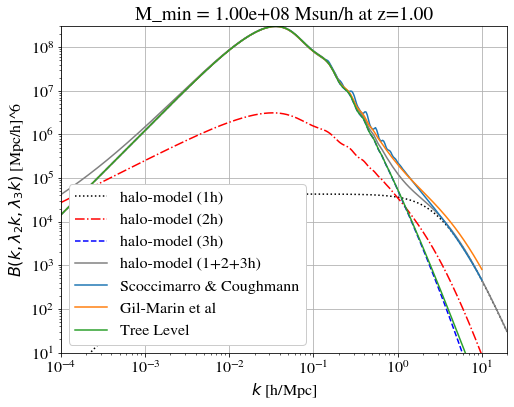

In [31]:
plt.plot(bk_at_z_hm['k'],bk_at_z_hm['1h'],label = 'halo-model (1h)',c='k',ls=':')
plt.plot(bk_at_z_hm['k'],bk_at_z_hm['2h'],label = 'halo-model (2h)',c='r',ls='-.')
plt.plot(bk_at_z_hm['k'],bk_at_z_hm['3h'],label = 'halo-model (3h)',c='b',ls='--')
plt.plot(bk_at_z_hm['k'],np.asarray(bk_at_z_hm['1h'])+np.asarray(bk_at_z_hm['2h'])+np.asarray(bk_at_z_hm['3h']),label = 'halo-model (1+2+3h)',c='grey',ls='-')
# plt.plot(k1_a,np.asarray(Qk1),label='Q(k1) Gil-Marin',alpha=0.2)
# plt.plot(k1_a,np.asarray(Qk1_smoothed),label='Q(k1) Gil-Marin smoothed',c='r',lw=2.)
# plt.plot(k1_a,np.asarray(Qk1_SC),label='Q(k1) SC',alpha=0.2)

plt.plot(k1_a,np.asarray(Bk1_SC),label='Scoccimarro & Coughmann',alpha=1.)
plt.plot(k1_a,np.asarray(Bk1_GM),label='Gil-Marin et al',alpha=1.)
plt.plot(k1_a,np.asarray(Bk1_TL),label='Tree Level',alpha=1.)
plt.loglog()
plt.xlabel(r"$k$ [h/Mpc]")
plt.ylabel(r"$B(k,\lambda_2 k,\lambda_3 k)$ [Mpc/h]^6")
plt.ylim(1e1,3e8)
plt.xlim(1e-4,2e1)
plt.grid()
plt.legend(loc=3,frameon=True,framealpha=1)
plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
# plt.savefig('bk_z1_wct_Mmin1e8.pdf')

# Computing  TTG bispectrum B(k1,k2,k3) - equilateral

In [12]:
zz = 2.
M_min = 1e10
M = Class()
# params = planck_2015
# M.set(params)
M.set({

'omega_b' : 0.0226,
'omega_cdm' : 0.11,
'h' : 0.71,
'tau_reio' : 0.088,
'n_s' : 0.963,
'k_pivot' : 0.002,
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'f_free' : 1.0 ,   
    
'z_min':1e-6,
'z_max':4.0,


'mass function':'T10',
'M_min':M_min,
'M_max':1e+17,
'hm_consistency':1,


'concentration parameter':'D08',


'gas profile':'nfw', # b16

'sigma_log10M_HOD':0.76,
'alpha_s_HOD':2.08,
'M_min_HOD':10100000000000.0,
'M1_prime_HOD':118000000000000.0,
'M0_HOD':0.0,
'M0 equal M_min (HOD)':'no',

'pk_nonlinear_for_vrms2':0,
'delta for electron density':'200m',
'delta for galaxies':'200m',
'delta for matter density':'200m',
'sz_verbose':0,

'ndim_masses':150,
'ndim_redshifts':150,

'output':'mean_galaxy_bias,bk_ttg_at_z_hf,bk_ttg_at_z_1h,bk_ttg_at_z_2h,bk_ttg_at_z_3h',

'dlnk_for_pk_hm':0.01,
'z_for_pk_hm':zz,

'k_min_for_pk_hm':0.001,
'k_max_for_pk_hm':10.0,
    
'k_min_for_pk_class_sz':0.0001,
'k_max_for_pk_class_sz':100.0,
'k_per_decade_class_sz':20.0,
'P_k_max_h/Mpc' : 148.54426619132502,

'non linear':'halofit'


})
M.compute()
bk_ttg_at_z_hm = M.bk_ttg_at_z_hm()




In [13]:
z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk_TTG_HF = []
Bk_TTG_TL = []

pk_halofit = []
for k1 in k1_a:
  k2 = k1
  k3 = k1
  Bk_TTG_HF.append(M.get_ttg_bispectrum_at_z_effective_approach(k1,k2,k3,z))
  Bk_TTG_TL.append(M.get_ttg_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))



The diff between Tree-level and hm is due to $b_2*g$ terms

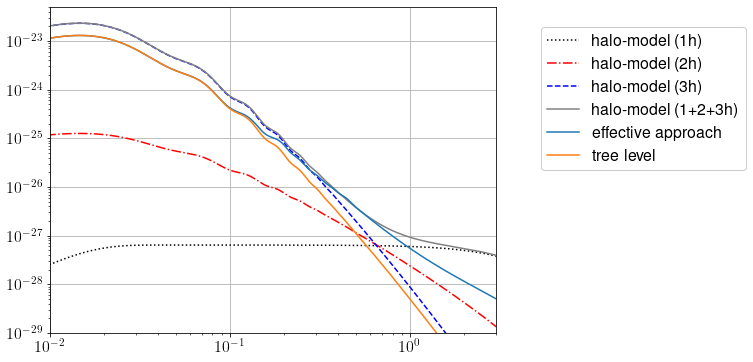

In [15]:
plt.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['1h'],label = 'halo-model (1h)',c='k',ls=':')
plt.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['2h'],label = 'halo-model (2h)',c='r',ls='-.')
plt.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['3h'],label = 'halo-model (3h)',c='b',ls='--')
plt.plot(bk_ttg_at_z_hm['k'],np.asarray(bk_ttg_at_z_hm['1h'])+np.asarray(bk_ttg_at_z_hm['2h'])+np.asarray(bk_ttg_at_z_hm['3h']),label = 'halo-model (1+2+3h)',c='grey',ls='-')

plt.plot(k1_a,np.asarray(Bk_TTG_HF),label='effective approach',alpha=1.)
plt.plot(k1_a,np.asarray(Bk_TTG_TL),label='tree level',alpha=1.)

plt.loglog()
# plt.xlabel(r"$k$ [h/Mpc]")
# plt.ylabel(r"$B(k,k,k)$ TTG [Mpc/h]^6")
plt.ylim(1e-29,5e-23)
plt.xlim(1e-2,3e0)
plt.grid()
plt.legend(loc=(1.1,0.5),frameon=True,framealpha=1)
# plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
# plt.savefig('bk_ttg_z1_wct_Mmin1e10_wob2.pdf')

Text(0.5, 1.0, 'M_min = 1.00e+10 Msun/h at z=2.00')

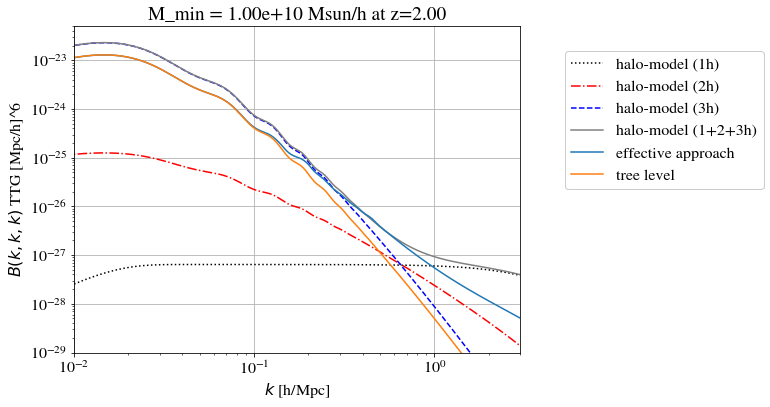

In [17]:
plt.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['1h'],label = 'halo-model (1h)',c='k',ls=':')
plt.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['2h'],label = 'halo-model (2h)',c='r',ls='-.')
plt.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['3h'],label = 'halo-model (3h)',c='b',ls='--')
plt.plot(bk_ttg_at_z_hm['k'],np.asarray(bk_ttg_at_z_hm['1h'])+np.asarray(bk_ttg_at_z_hm['2h'])+np.asarray(bk_ttg_at_z_hm['3h']),label = 'halo-model (1+2+3h)',c='grey',ls='-')

plt.plot(k1_a,np.asarray(Bk_TTG_HF),label='effective approach',alpha=1.)
plt.plot(k1_a,np.asarray(Bk_TTG_TL),label='tree level',alpha=1.)

plt.loglog()
plt.xlabel(r"$k$ [h/Mpc]")
plt.ylabel(r"$B(k,k,k)$ TTG [Mpc/h]^6")
plt.ylim(1e-29,5e-23)
plt.xlim(1e-2,3e0)
plt.grid()
plt.legend(loc=(1.1,0.5),frameon=True,framealpha=1)
plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
# plt.savefig('bk_ttg_z1_wct_Mmin1e10_wob2.pdf')

# Computing  TTG bispectrum B(k1,k2,k3) - squeezed

In [18]:
lambda2 = 1.
lambda3 = 0.01

In [20]:
zz = 2.
M_min = 1e10
M = Class()
# params = planck_2015
# M.set(params)
M.set({

'omega_b' : 0.0226,
'omega_cdm' : 0.11,
'h' : 0.71,
'tau_reio' : 0.088,
'n_s' : 0.963,
'k_pivot' : 0.002,
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'f_free' : 1.0 ,   
    
'z_min':1e-6,
'z_max':4.0,


'mass function':'T10',
'M_min':M_min,
'M_max':1e+17,
'hm_consistency':1,


'concentration parameter':'D08',


'gas profile':'nfw', # b16

'sigma_log10M_HOD':0.76,
'alpha_s_HOD':2.08,
'M_min_HOD':10100000000000.0,
'M1_prime_HOD':118000000000000.0,
'M0_HOD':0.0,
'M0 equal M_min (HOD)':'no',

'pk_nonlinear_for_vrms2':0,
'delta for electron density':'200m',
'delta for galaxies':'200m',
'delta for matter density':'200m',
'sz_verbose':0,

'ndim_masses':150,
'ndim_redshifts':150,

'output':'bk_ttg_at_z_hf,bk_ttg_at_z_1h,bk_ttg_at_z_2h,bk_ttg_at_z_3h',

'dlnk_for_pk_hm':0.01,
'z_for_pk_hm':zz,

'k_min_for_pk_hm':0.001,
'k_max_for_pk_hm':10.0,
    
'k_min_for_pk_class_sz':0.0001,
'k_max_for_pk_class_sz':100.0,
'k_per_decade_class_sz':20.0,
'P_k_max_h/Mpc' : 148.54426619132502,

'non linear':'halofit',
"bispectrum_lambda_2" : lambda2,
"bispectrum_lambda_3" : lambda3

})
M.compute()
bk_ttg_at_z_hm = M.bk_ttg_at_z_hm()




In [22]:
z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk_TTG_HF = []
Bk_TTG_TL = []

pk_halofit = []
for k1 in k1_a:
  k2 = lambda2*k1
  k3 = lambda3*k1
  Bk_TTG_HF.append(M.get_ttg_bispectrum_at_z_effective_approach(k1,k2,k3,z))
  Bk_TTG_TL.append(M.get_ttg_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))



The diff between Tree-level and hm is due to $b_2*g$ terms

Text(0.5, 1.0, 'M_min = 1.00e+10 Msun/h at z=2.00')

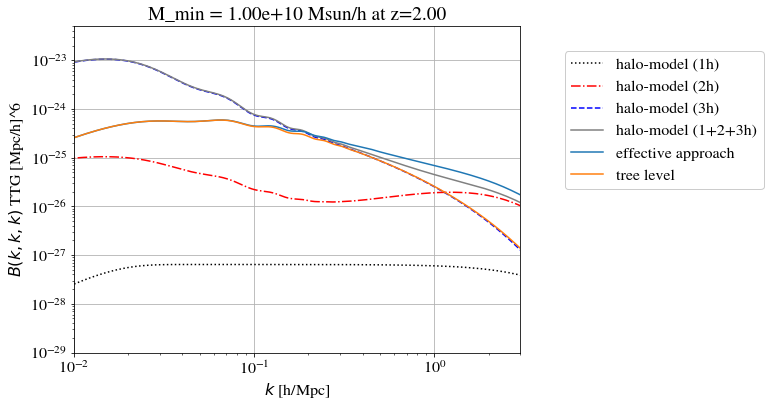

In [23]:
plt.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['1h'],label = 'halo-model (1h)',c='k',ls=':')
plt.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['2h'],label = 'halo-model (2h)',c='r',ls='-.')
plt.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['3h'],label = 'halo-model (3h)',c='b',ls='--')
plt.plot(bk_ttg_at_z_hm['k'],np.asarray(bk_ttg_at_z_hm['1h'])+np.asarray(bk_ttg_at_z_hm['2h'])+np.asarray(bk_ttg_at_z_hm['3h']),label = 'halo-model (1+2+3h)',c='grey',ls='-')

plt.plot(k1_a,np.asarray(Bk_TTG_HF),label='effective approach',alpha=1.)
plt.plot(k1_a,np.asarray(Bk_TTG_TL),label='tree level',alpha=1.)

plt.loglog()
plt.xlabel(r"$k$ [h/Mpc]")
plt.ylabel(r"$B(k,k,k)$ TTG [Mpc/h]^6")
plt.ylim(1e-29,5e-23)
plt.xlim(1e-2,3e0)
plt.grid()
plt.legend(loc=(1.1,0.5),frameon=True,framealpha=1)
plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
# plt.savefig('bk_ttg_z1_wct_Mmin1e10_wob2.pdf')

# Computing  TTG bispectrum B(k1,k2,k3) - flattened

In [24]:
lambda2 = 0.5
lambda3 = 0.5

In [25]:
zz = 2.
M_min = 1e10
M = Class()
# params = planck_2015
# M.set(params)
M.set({

'omega_b' : 0.0226,
'omega_cdm' : 0.11,
'h' : 0.71,
'tau_reio' : 0.088,
'n_s' : 0.963,
'k_pivot' : 0.002,
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'f_free' : 1.0 ,   
    
'z_min':1e-6,
'z_max':4.0,


'mass function':'T10',
'M_min':M_min,
'M_max':1e+17,
'hm_consistency':1,


'concentration parameter':'D08',


'gas profile':'nfw', # b16

'sigma_log10M_HOD':0.76,
'alpha_s_HOD':2.08,
'M_min_HOD':10100000000000.0,
'M1_prime_HOD':118000000000000.0,
'M0_HOD':0.0,
'M0 equal M_min (HOD)':'no',

'pk_nonlinear_for_vrms2':0,
'delta for electron density':'200m',
'delta for galaxies':'200m',
'delta for matter density':'200m',
'sz_verbose':0,

'ndim_masses':150,
'ndim_redshifts':150,

'output':'bk_ttg_at_z_hf,bk_ttg_at_z_1h,bk_ttg_at_z_2h,bk_ttg_at_z_3h',

'dlnk_for_pk_hm':0.01,
'z_for_pk_hm':zz,

'k_min_for_pk_hm':0.001,
'k_max_for_pk_hm':10.0,
    
'k_min_for_pk_class_sz':0.0001,
'k_max_for_pk_class_sz':100.0,
'k_per_decade_class_sz':20.0,
'P_k_max_h/Mpc' : 148.54426619132502,

'non linear':'halofit',
"bispectrum_lambda_2" : lambda2,
"bispectrum_lambda_3" : lambda3

})
M.compute()
bk_ttg_at_z_hm = M.bk_ttg_at_z_hm()




In [26]:
z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk_TTG_HF = []
Bk_TTG_TL = []

pk_halofit = []
for k1 in k1_a:
  k2 = lambda2*k1
  k3 = lambda3*k1
  Bk_TTG_HF.append(M.get_ttg_bispectrum_at_z_effective_approach(k1,k2,k3,z))
  Bk_TTG_TL.append(M.get_ttg_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))



The diff between Tree-level and hm is due to $b_2*g$ terms

Text(0.5, 1.0, 'M_min = 1.00e+10 Msun/h at z=2.00')

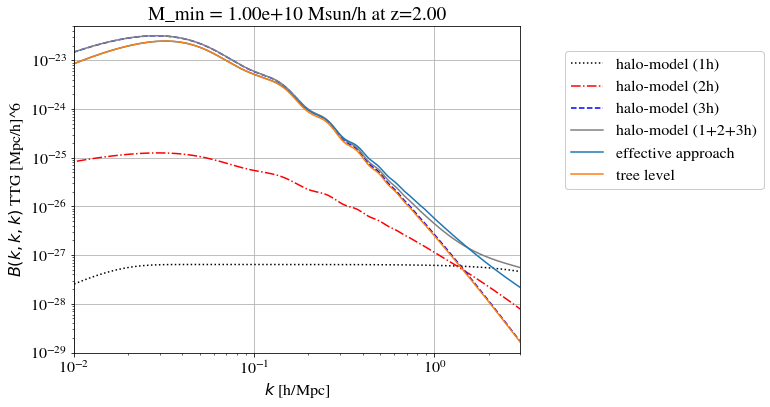

In [27]:
plt.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['1h'],label = 'halo-model (1h)',c='k',ls=':')
plt.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['2h'],label = 'halo-model (2h)',c='r',ls='-.')
plt.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['3h'],label = 'halo-model (3h)',c='b',ls='--')
plt.plot(bk_ttg_at_z_hm['k'],np.asarray(bk_ttg_at_z_hm['1h'])+np.asarray(bk_ttg_at_z_hm['2h'])+np.asarray(bk_ttg_at_z_hm['3h']),label = 'halo-model (1+2+3h)',c='grey',ls='-')

plt.plot(k1_a,np.asarray(Bk_TTG_HF),label='effective approach',alpha=1.)
plt.plot(k1_a,np.asarray(Bk_TTG_TL),label='tree level',alpha=1.)

plt.loglog()
plt.xlabel(r"$k$ [h/Mpc]")
plt.ylabel(r"$B(k,k,k)$ TTG [Mpc/h]^6")
plt.ylim(1e-29,5e-23)
plt.xlim(1e-2,3e0)
plt.grid()
plt.legend(loc=(1.1,0.5),frameon=True,framealpha=1)
plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
# plt.savefig('bk_ttg_z1_wct_Mmin1e10_wob2.pdf')

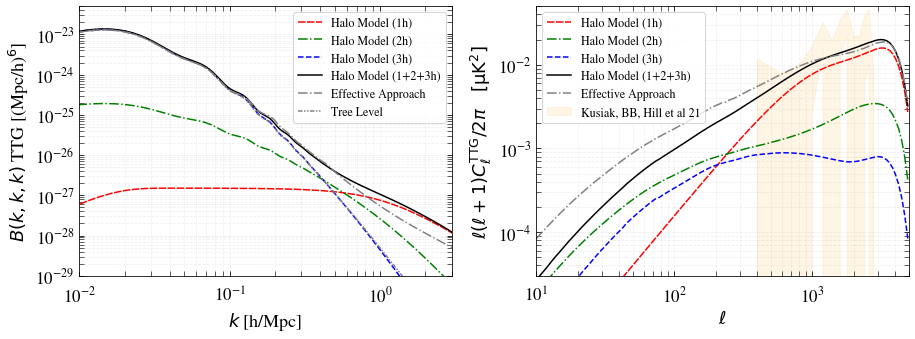

In [7]:
kSZ_kSZ_gal_1h_fft = []
kSZ_kSZ_gal_2h_fft = []
kSZ_kSZ_gal_3h_fft = []
kSZ_kSZ_gal_hf = []
multipoles = []
R = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/ksz2g_b16_agn_example.txt')
kSZ_kSZ_gal_1h_fft.append(R[:,54])
kSZ_kSZ_gal_2h_fft.append(R[:,55])
kSZ_kSZ_gal_3h_fft.append(R[:,56])
kSZ_kSZ_gal_hf.append(R[:,46])
multipoles.append(R[:,0])

label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(13,5))
ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{TTG}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)
id_p = 0
fac = (2.726e6)**2*multipoles[id_p]*(multipoles[id_p]+1.)/2./np.pi
ax.plot(multipoles[id_p],kSZ_kSZ_gal_1h_fft[id_p]*fac,
        c='r',ls=(0, (5, 1)),alpha = 1.,
        # label = val_label[id_p] + ' (1h)',
        label = 'Halo Model (1h)')
ax.plot(multipoles[id_p],kSZ_kSZ_gal_2h_fft[id_p]*fac,color='g',
        ls='-.',alpha = 1.,
        # label = val_label[id_p] + ' (1h)',
        label = 'Halo Model (2h)')
ax.plot(multipoles[id_p],np.abs(kSZ_kSZ_gal_3h_fft[id_p])*fac,color='b',
        ls='--',alpha = 1.,
        # label = val_label[id_p] + ' (1h)',
        label = 'Halo Model (3h)')
ax.plot(multipoles[id_p],np.abs(kSZ_kSZ_gal_1h_fft[id_p]*fac+kSZ_kSZ_gal_2h_fft[id_p]*fac+kSZ_kSZ_gal_3h_fft[id_p]*fac),
        color='k',
        ls='-',alpha = 1.,
        # label = val_label[id_p] + ' (3h)',
        label = 'Halo Model (1+2+3h)')#,
bgeff = 1
ax.plot(multipoles[id_p],kSZ_kSZ_gal_hf[id_p]*fac*bgeff,
        c='grey',ls='-.',
        label = 'Effective Approach')


Ola_eff = np.loadtxt('/Users/boris/Work/ksz_bispectra/black_unwise_green.txt')
cell_ola_eff = Ola_eff[1,:]
ell_ola_eff = Ola_eff[0,:]
Ola_measurements = np.loadtxt('/Users/boris/Work/ksz_bispectra/pink_unwise_green.txt')
err_cell_ola_measurements = Ola_measurements[2,:]
cell_ola_measurements = Ola_measurements[1,:]
ell_ola_measurements = Ola_measurements[0,:]

#ax.plot(ell_ola_eff,cell_ola_eff*1.2/5.,label='ola eff')

ax.fill_between(ell_ola_measurements,
                cell_ola_measurements*1.2/5.-err_cell_ola_measurements*1.2/5.,
                cell_ola_measurements*1.2/5.+err_cell_ola_measurements*1.2/5.,
            label='Kusiak, BB, Hill et al 21',
            color='orange',
            alpha=0.1)






ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(3e-5,5e-2)
ax.set_xlim(10,5e3)
ax.legend(loc=2,ncol = 1,frameon=True,fontsize=12)


ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
# ax.set_xlabel(r'$\ell$',size=title_size)
# ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)
ax.set_xlabel(r"$k$ [h/Mpc]",size=title_size)
ax.set_ylabel(r"$B(k,k,k)$ TTG [(Mpc/h)$^6$]",size=title_size)
ax.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['1h'],label = 'Halo Model (1h)',c='r',ls=(0, (5, 1)))
ax.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['2h'],label = 'Halo Model (2h)',c='g',ls='-.')
ax.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['3h'],label = 'Halo Model (3h)',c='b',ls='--')
ax.plot(bk_ttg_at_z_hm['k'],np.asarray(bk_ttg_at_z_hm['1h'])+np.asarray(bk_ttg_at_z_hm['2h'])+np.asarray(bk_ttg_at_z_hm['3h']),
        label = 'Halo Model (1+2+3h)',
        c='k',ls='-')

ax.plot(k1_a,np.asarray(Bk_TTG_HF),label='Effective Approach',alpha=1.,c='grey',ls='-.')
ax.plot(k1_a,np.asarray(Bk_TTG_TL),label='Tree Level',alpha=1.,c='grey',ls= (0, (3, 1, 1, 1, 1, 1)))





ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc=1,ncol = 1,frameon=True,fontsize=12)
ax.set_ylim(1e-29,5e-23)
ax.set_xlim(1e-2,3e0)

fig.tight_layout()
#plt.savefig("/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/kSZ2g_b16_agn.pdf")

In [ ]:
#fiducial ksz params
'omega_b' : 0.022383,
'omega_cdm' : 0.12011,
'h' : 0.6732,
'tau_reio' : 0.0543,
'ln10^{10}A_s' : 3.0448,
'n_s' : 0.96605,
'k_pivot' : 0.05,
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'f_free' : 1.0,
'pressure profile' : 'B12',
'k_min_for_pk_class_sz' : 0.001,
'k_max_for_pk_class_sz' : 60.0,
'k_per_decade_class_sz' : 50,
'P_k_max_h/Mpc' : 100.0,
'non linear' : 'halofit',
'z_min' : 0.01,
'M_min' : 1e10,
'm_min_counter_terms' : 1e10,
'M_max' : 1e+17,
'mass function' : 'T10',
'galaxy_sample' : 'unwise',
'galaxy_sample_id' : 'green',
'concentration parameter' : 'D08',
'use_hod' : 'yes',
'use_analytical_truncated_nfw' : 'yes',
'x_out_truncated_nfw_profile_satellite_galaxies' : 1,
'M0 equal M_min (HOD)' : 'no',
'gas profile' : 'nfw',
'gas profile mode' : 'agn',
'sigma_log10M_HOD' : 0.76,
'alpha_s_HOD' : 2.08,
'M_min_HOD' : 10100000000000.0,
'M1_prime_HOD' : 118000000000000.0,
'M0_HOD' : 0.0,
'x_out_truncated_nfw_profile' : 1.0,
'pk_nonlinear_for_vrms2' : 1,
'hm_consistency' : 1,
'sz_verbose' : 0, # for full output when not using python wrapper set to >100, this doesnt work with python wrapper
#'root' : 'sz_auxiliary_files/run_scripts/tmp/class-sz_tmp_',
#'write sz results to files' : 'yes',
'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.001,
'redshift_epsabs' : 1e-50,
'redshift_epsrel' : 0.001,
'mass_epsabs' : 1e-30,
'mass_epsrel' : 0.01,
'dell' : 300,
'ell_max' : 5000.0,
'ell_min' : 100.0,

'non linear' : 'halofit',
'nonlinear_verbose' : 0,
'ndim_masses' : 80,
'ndim_redshifts' : 80,
#'l_max_scalars' : 5000,
'output' : 'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_hf',
# 'output' : 'kSZ_kSZ_gal_1h,kSZ_kSZ_gal_2h,kSZ_kSZ_gal_3h',
'z_max' : 4.0,
#'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',

'n_ell_density_profile' : 50,
'n_m_density_profile' : 50,
'n_z_density_profile' : 50,
'k_per_decade_for_pk' : 50,
'z_max_pk' : 4.0,
    
    
'n_z_psi_b1g' : 100,
'n_l_psi_b1g' : 400,

'n_z_psi_b2g' : 100,
'n_l_psi_b2g' : 400,

'n_z_psi_b2t' : 100,
'n_l_psi_b2t' : 400,

'n_z_psi_b1t' : 100,
'n_l_psi_b1t' : 100,

'n_z_psi_b1gt' : 100,
'n_l_psi_b1gt' : 100,

'N_samp_fftw' : 2000,
'l_min_samp_fftw' : 1e-9,
'l_max_samp_fftw' : 1e9,
    
'N_kSZ2_gal_multipole_grid' :  70,
'N_kSZ2_gal_theta_grid' :  70,
'ell_min_kSZ2_gal_multipole_grid' : 2.,
'ell_max_kSZ2_gal_multipole_grid' : 2e5,